In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,PctLarge,PctOld,⋯,JanMin,TOctSep,Jan20,PcumOctSep,logSprsCPA.p1,SprsFires,PctSprs,SprsAcre,SprsDays,OutDays
-123.9778,41.15724,462.4003,0.46000,1,1,24.51245,51675.95,0.2191781,0.06666667,⋯,-1.310873,10.921748,0,2914.449,8.112028,7,0.8750000,8.257143,3.0,6.0
-123.6292,39.83341,636.2545,0.70000,1,1,78.60288,47511.05,0.3593750,0.50000000,⋯,-2.068149,10.979370,0,2751.259,9.361249,1,1.0000000,3597.000000,34.0,72.0
-123.7100,41.00384,758.2146,0.92000,1,1,56.26146,51141.66,0.4605263,0.71428571,⋯,-2.187790,11.975916,0,2702.836,8.456540,8,0.6666667,0.112500,0.0,0.5
-123.7726,41.36003,924.6661,15.23333,1,1,189.66301,52250.75,0.3257576,0.20833333,⋯,-3.029533,8.998663,0,2946.935,9.933758,2,0.3333333,0.300000,1.0,0.5
-123.6073,41.10505,766.6403,0.70000,1,1,78.18508,50122.04,0.3162281,0.20000000,⋯,-3.342976,8.919163,0,2822.343,8.805613,8,0.8000000,606.425000,0.5,1.0
-123.6228,41.19412,729.4384,9.30000,1,1,109.59647,51100.97,0.3793103,0.11111111,⋯,-2.963782,10.673803,0,2762.928,8.071219,9,0.6923077,11.266667,1.0,4.0


In [3]:
names(data)

[1] "lon"           "lat"           "etopo1"        "beetleAcres"  
 [5] "host"          "forest"        "mStdAge"       "density"      
 [9] "PctLarge"      "PctOld"        "vcc"           "mfri"         
[13] "prs"           "pms"           "pls"           "GAP1"         
[17] "GAP2"          "GAP3"          "vpd"           "cwd"          
[21] "maxAugT"       "summerP0"      "Tmean"         "mi"           
[25] "Tvar"          "wd"            "AugTmean"      "OctTmin"      
[29] "AugMaxT"       "AugTmax"       "Acs"           "MarMin"       
[33] "ddAugJun"      "ddAugJul"      "JanTmin"       "PPT"          
[37] "summerP2"      "TMarAug"       "Mar20"         "fallTmean"    
[41] "MarTmin"       "maxT"          "Tmin"          "winterMin"    
[45] "summerTmean"   "Pmean"         "summerP1"      "minT"         
[49] "JanMin"        "TOctSep"       "Jan20"         "PcumOctSep"   
[53] "logSprsCPA.p1" "SprsFires"     "PctSprs"       "SprsAcre"     
[57] "SprsDays"      "OutDays"

In [4]:
# remove 'logSprsCPA.p1' and 'SprsDays' due to small sample sizes
drops <- c('logSprsCPA.p1', 'SprsDays')
data <- data[,!(names(data) %in% drops)]

In [11]:
# remove 'host', 'forest'
drops <- c('host', 'forest')
data <- data[,!(names(data) %in% drops)]

In [14]:
# remove the smooth terms that have fewer unique covariate combinations than specified 
# maximum degrees of freedom
nonsm <- c('GAP1', 'GAP2', 'GAP3', 'vcc', 'maxAugT')
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', nonsm))) {
    cat(sprintf('s(%s) + ', field))   
  }else if(field %in% nonsm){
    cat(sprintf('%s + ', field)) 
  }
}

s(lon) + s(lat) + s(etopo1) + s(mStdAge) + s(density) + s(PctLarge) + s(PctOld) + vcc + s(mfri) + s(prs) + s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + s(cwd) + maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + s(AugTmean) + s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + s(MarMin) + s(ddAugJun) + s(ddAugJul) + s(JanTmin) + s(PPT) + s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + s(summerP1) + s(minT) + s(JanMin) + s(TOctSep) + s(Jan20) + s(PcumOctSep) + s(SprsFires) + s(PctSprs) + s(SprsAcre) + s(OutDays) + 

In [15]:
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + s(density) + s(PctLarge) + 
    s(PctOld) + vcc + s(mfri) + s(prs) + s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + 
    s(cwd) + maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + s(AugTmean) + 
    s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + s(MarMin) + s(ddAugJun) + s(ddAugJul) + 
    s(JanTmin) + s(PPT) + s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + s(summerP1) + s(minT) + 
    s(JanMin) + s(TOctSep) + s(Jan20) + s(PcumOctSep) + s(SprsFires) + s(PctSprs) + 
    s(SprsAcre) + s(OutDays), data=data, select=TRUE, method="REML")
proc.time() - ptm

   user  system elapsed 
914.294  31.951 955.575 

In [16]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + 
    s(density) + s(PctLarge) + s(PctOld) + vcc + s(mfri) + s(prs) + 
    s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + s(cwd) + 
    maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + 
    s(AugTmean) + s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + 
    s(MarMin) + s(ddAugJun) + s(ddAugJul) + s(JanTmin) + s(PPT) + 
    s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + 
    s(summerP1) + s(minT) + s(JanMin) + s(TOctSep) + s(Jan20) + 
    s(PcumOctSep) + s(SprsFires) + s(PctSprs) + s(SprsAcre) + 
    s(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.31113    1.71340   0.182   0.8560  
vcc         -0.01736    0.06073  -0.286   0.7750  
GAP1        -0.23981    0.18975  -1.264   0.2067  
GAP2         0.43569    0.21814   1.997 

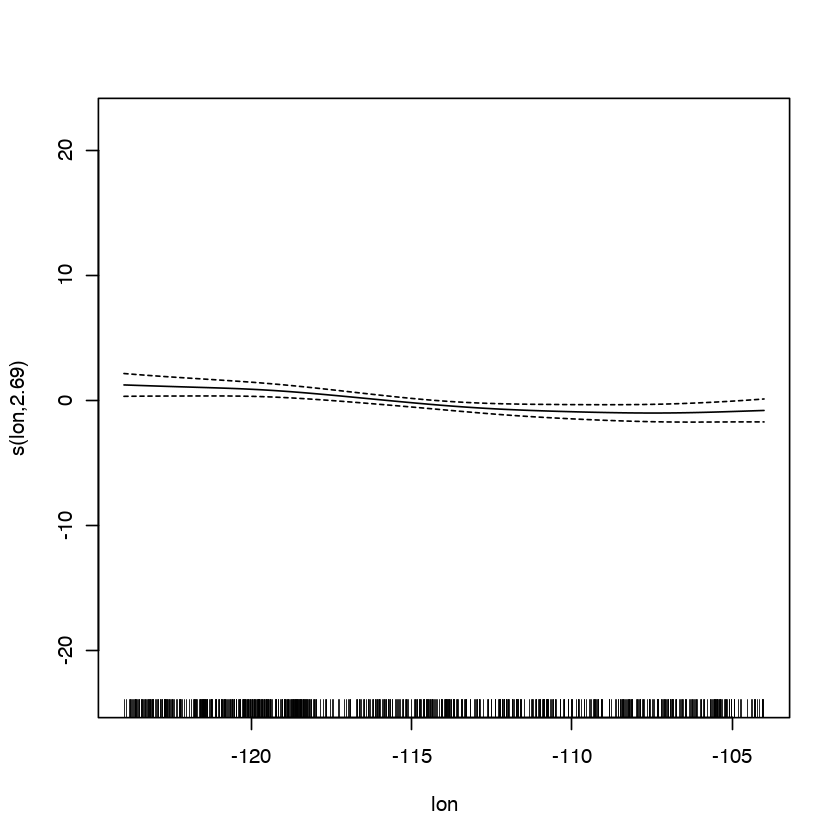

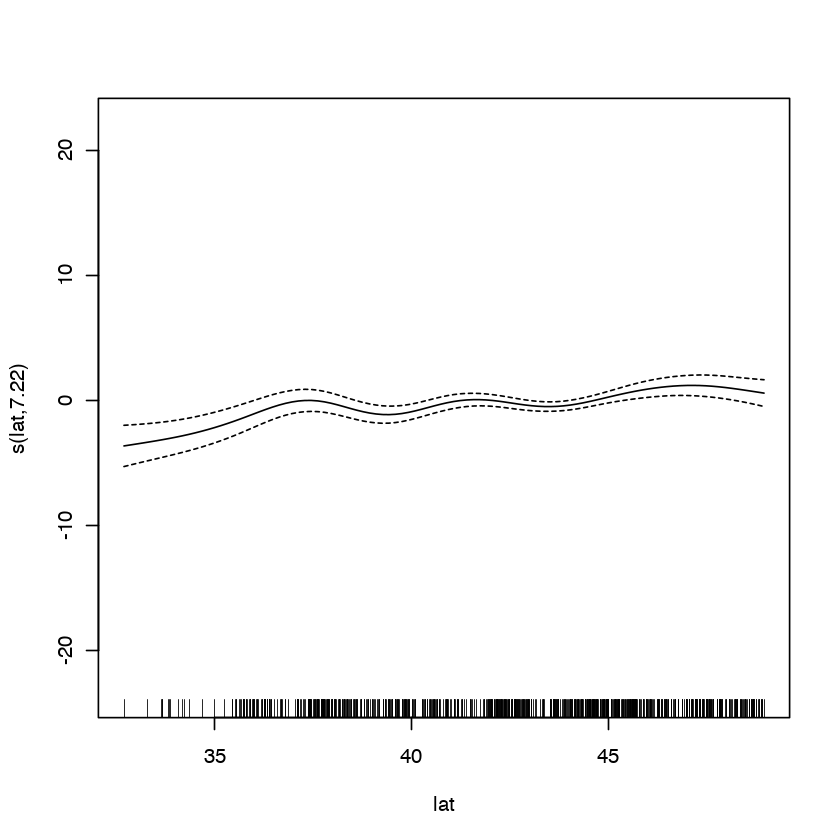

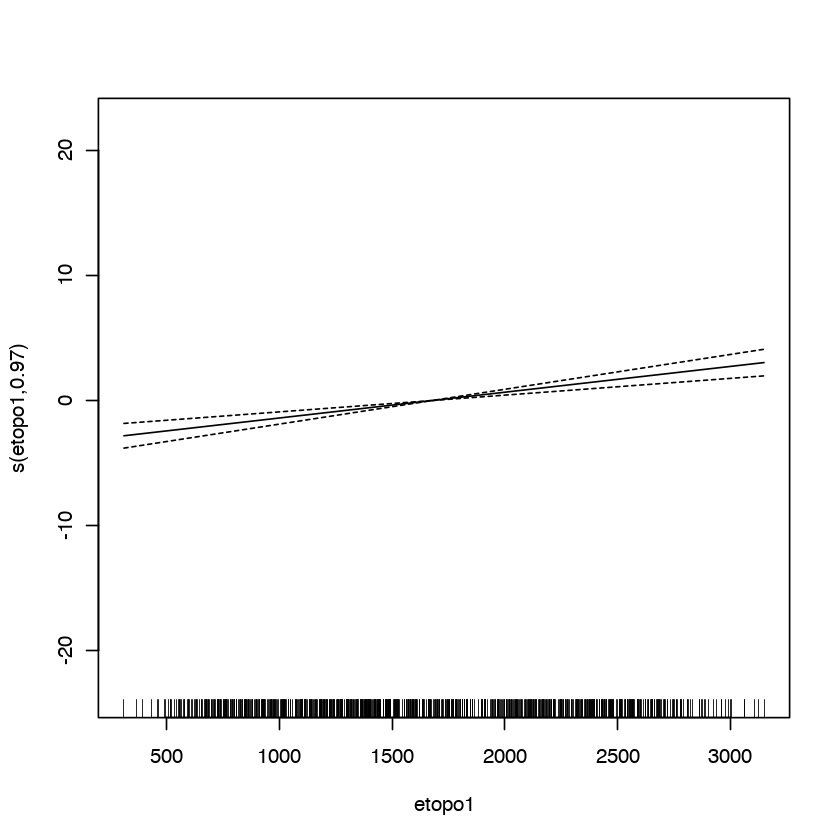

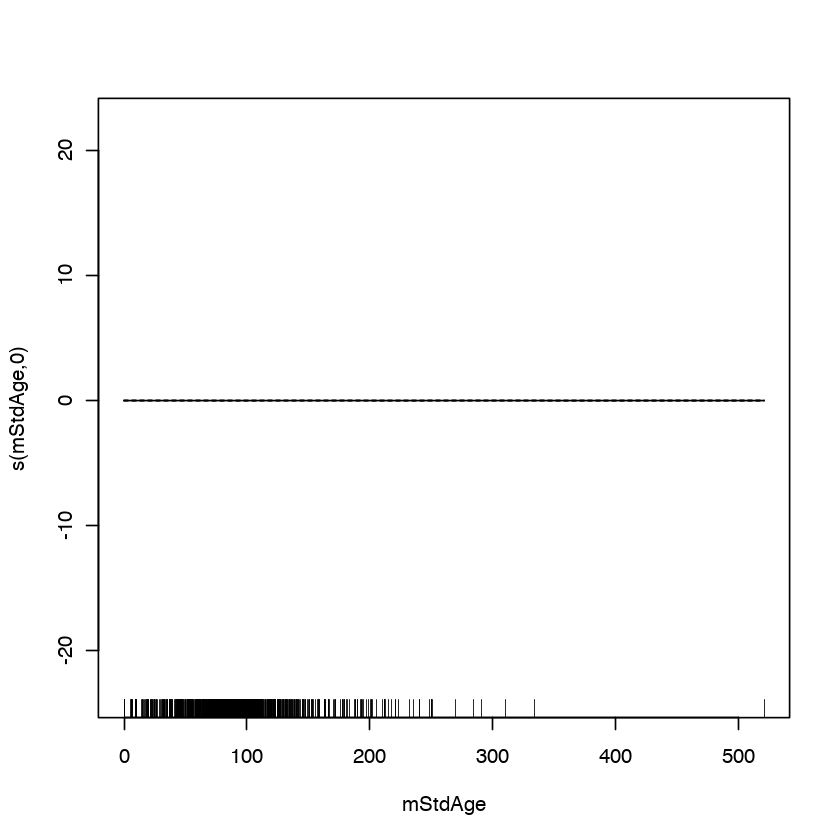

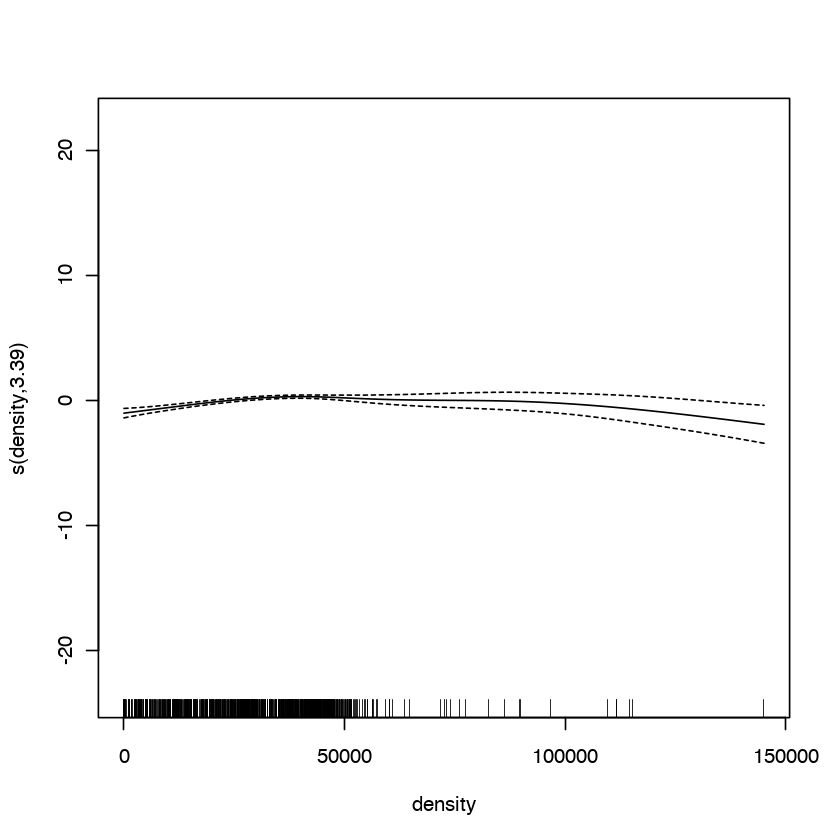

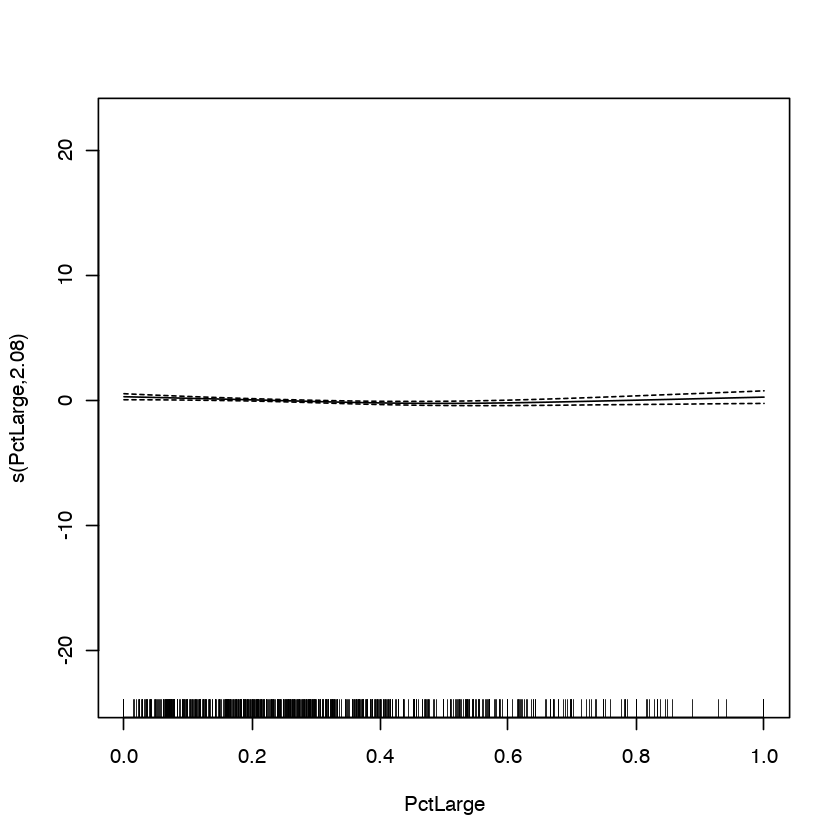

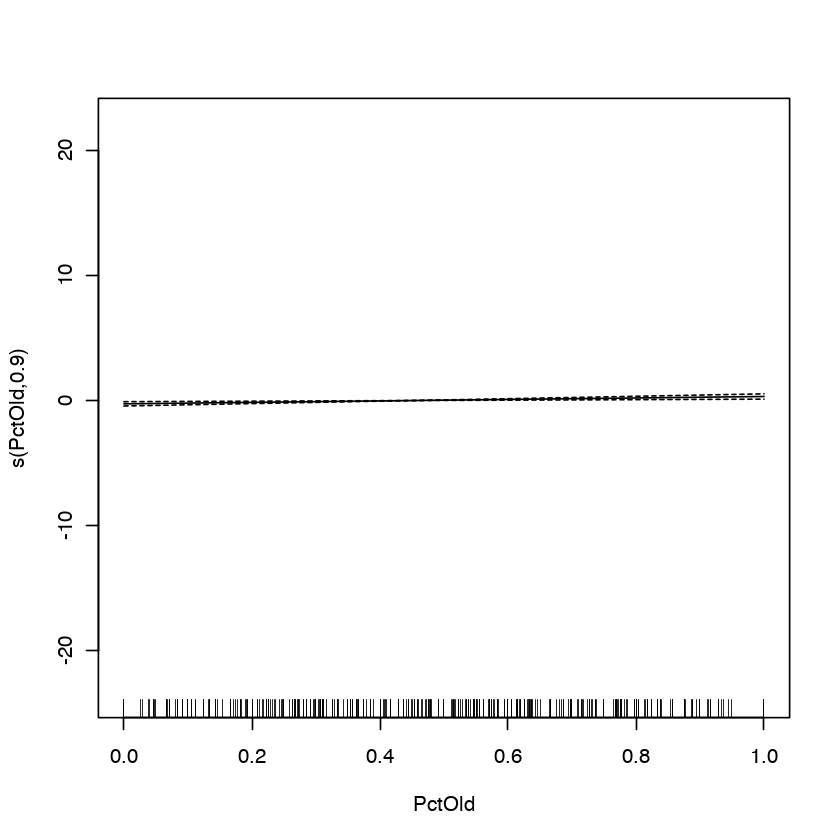

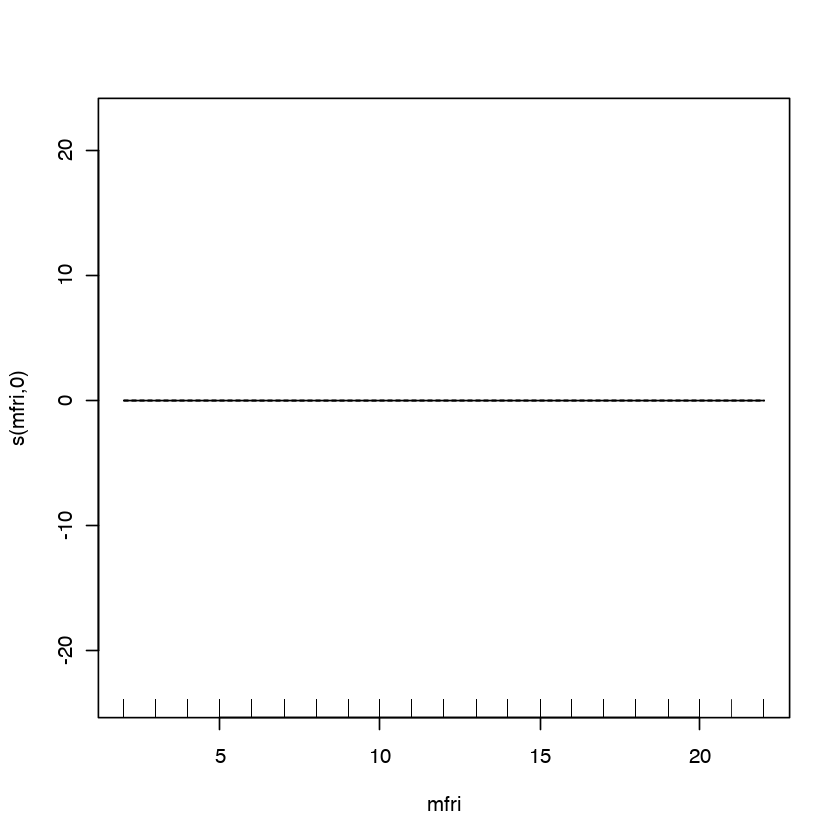

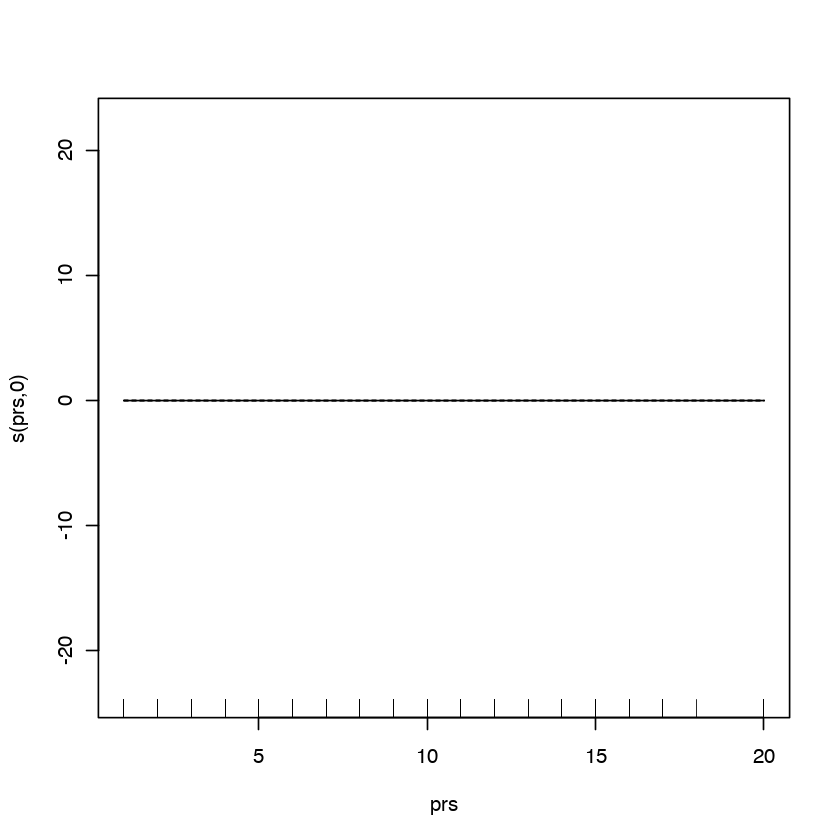

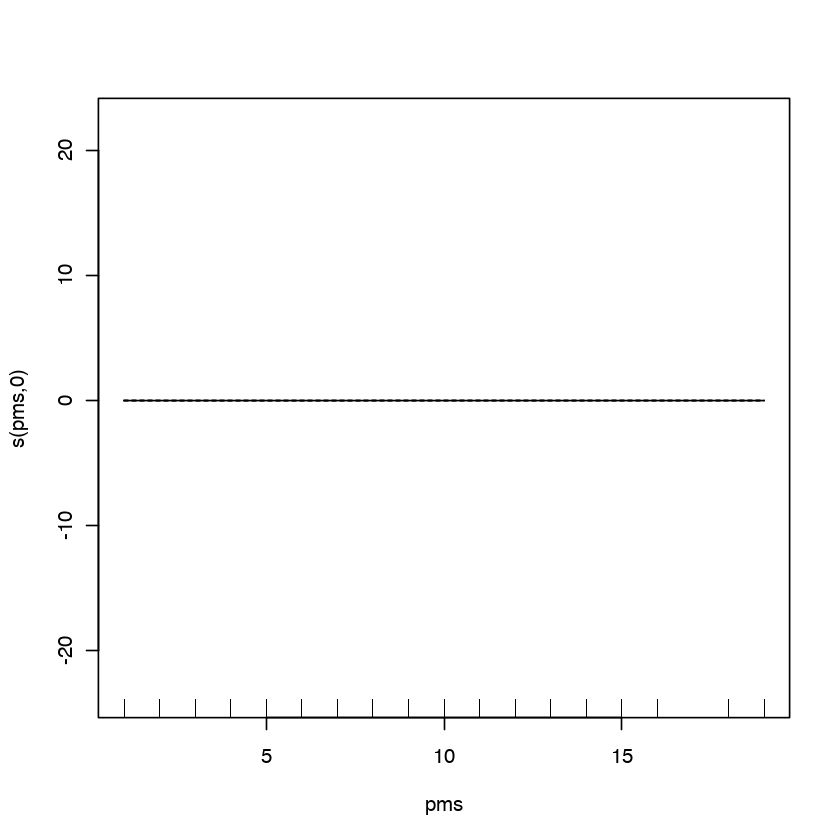

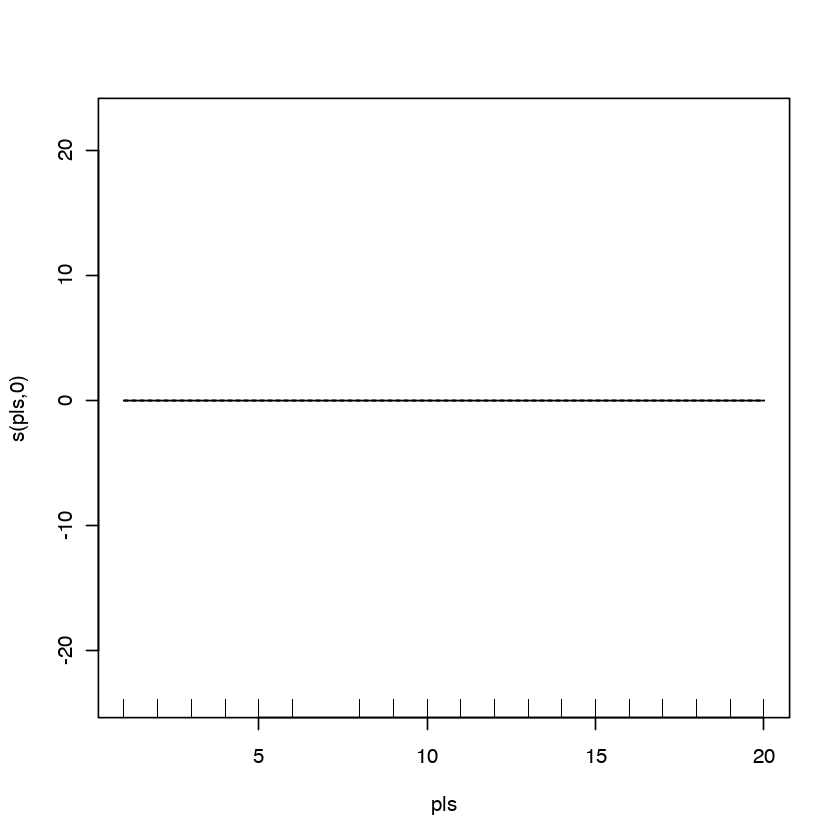

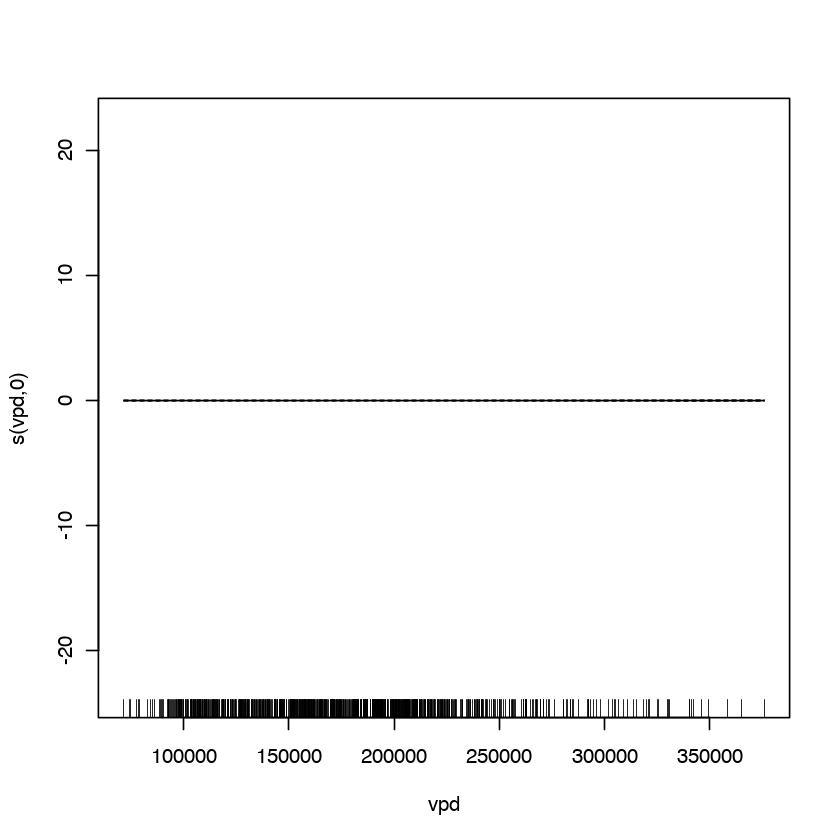

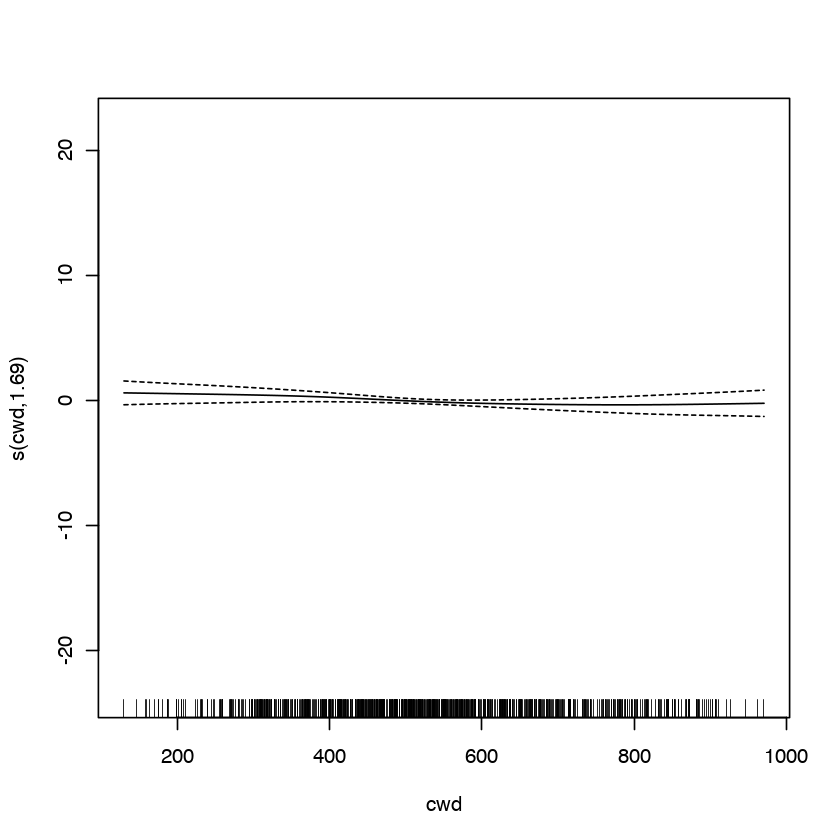

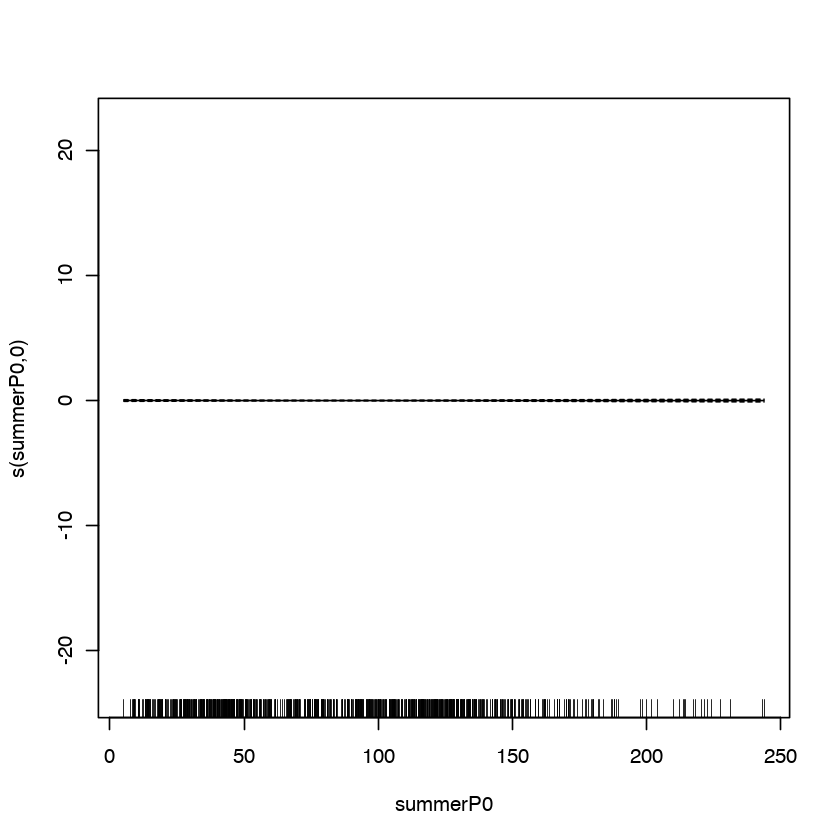

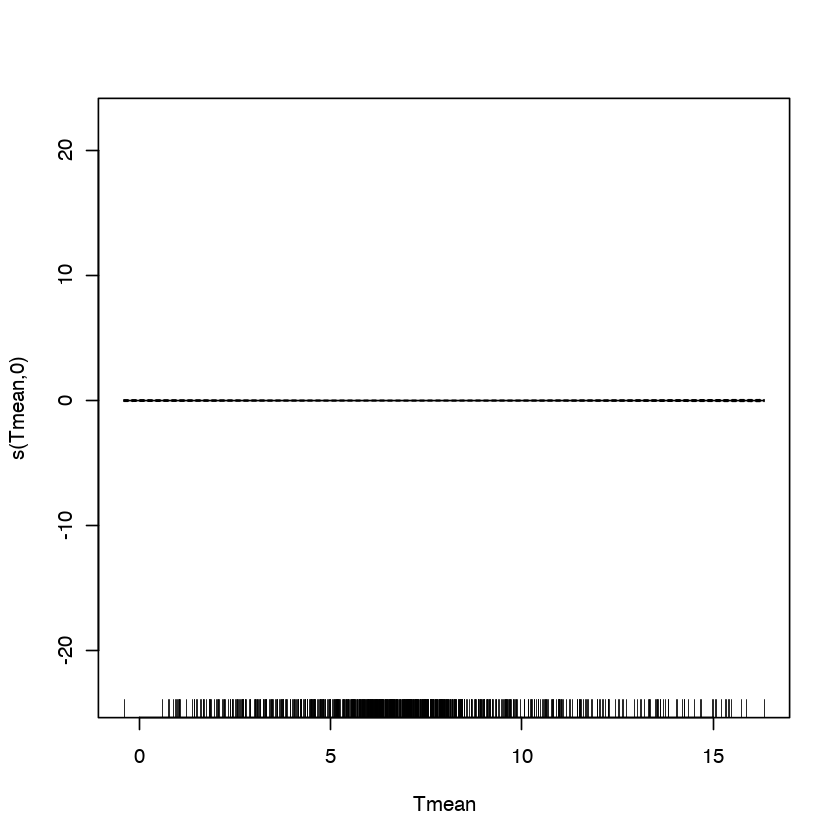

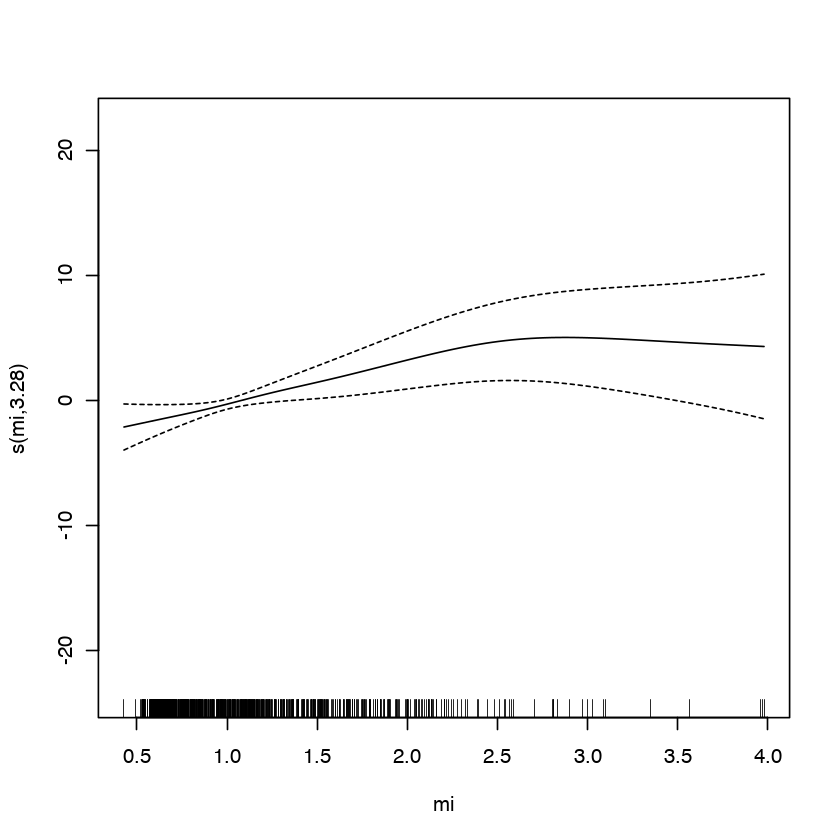

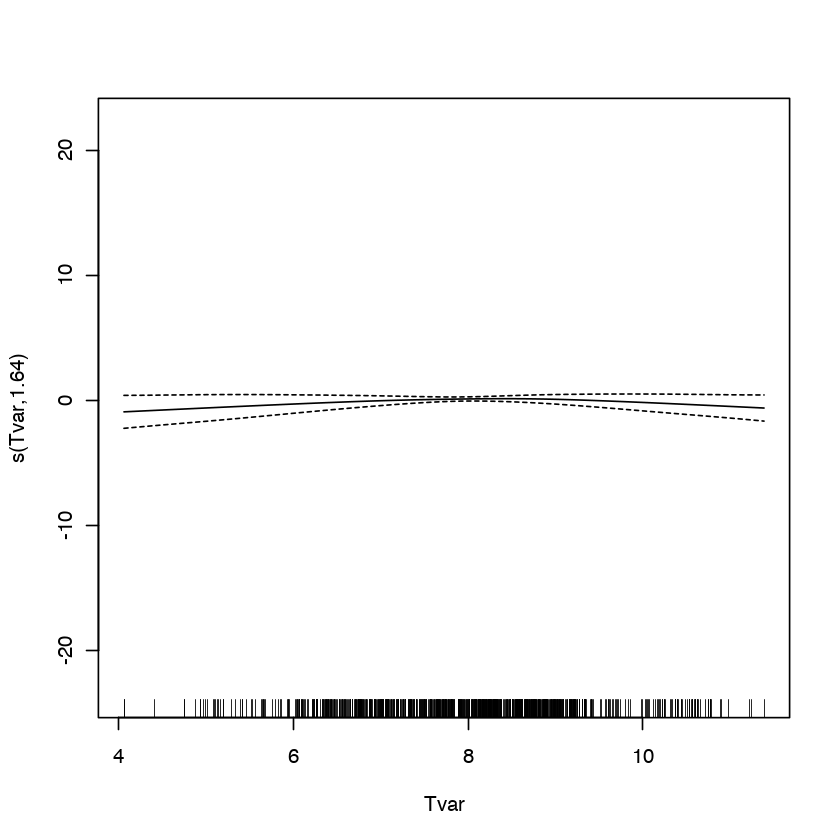

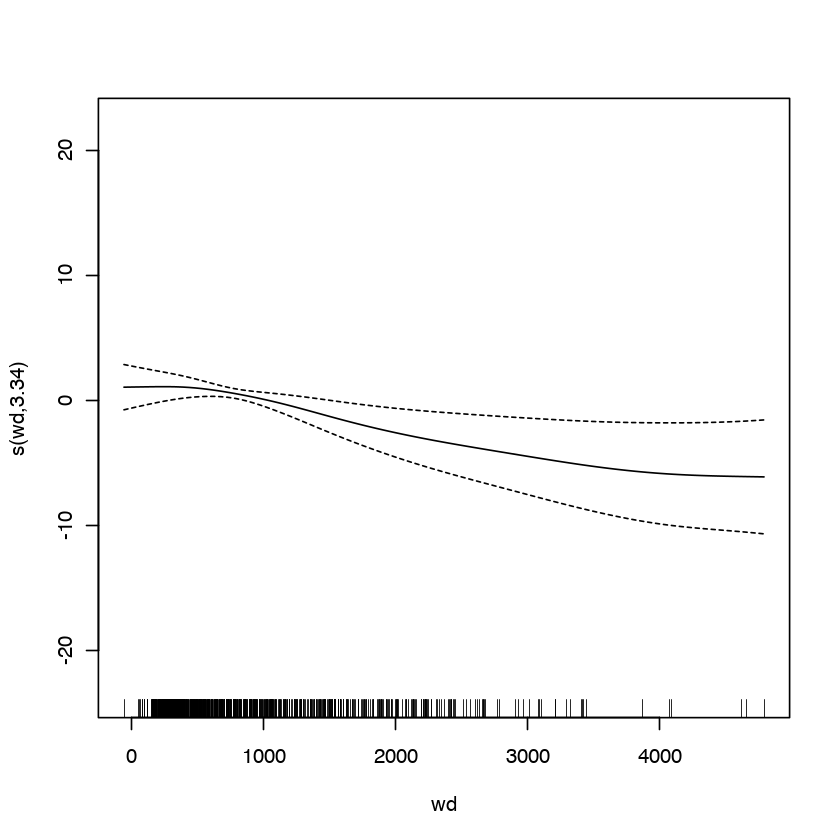

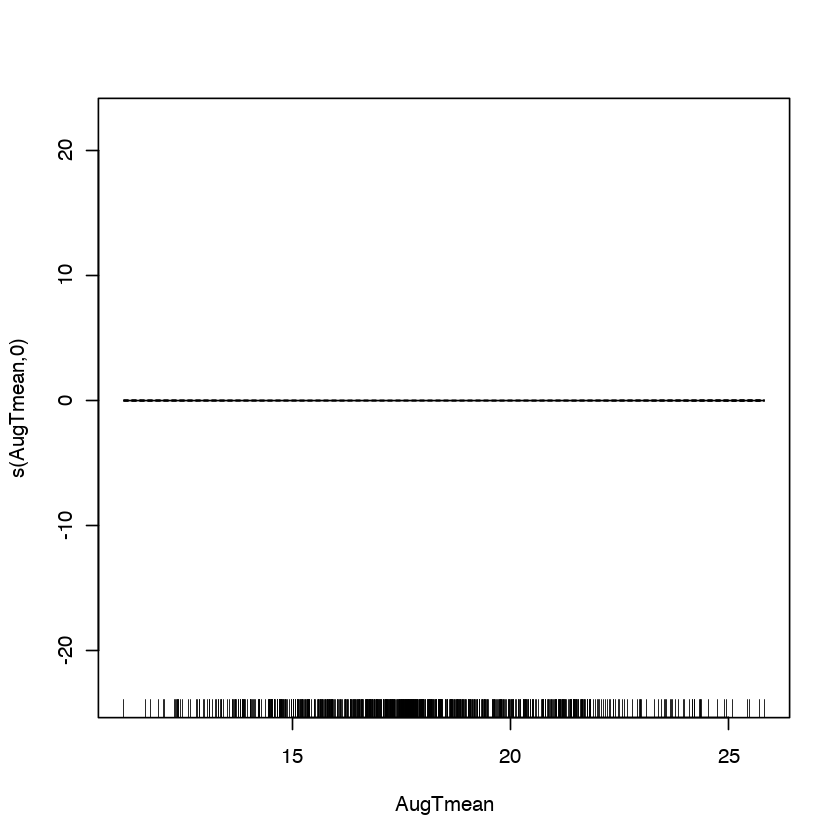

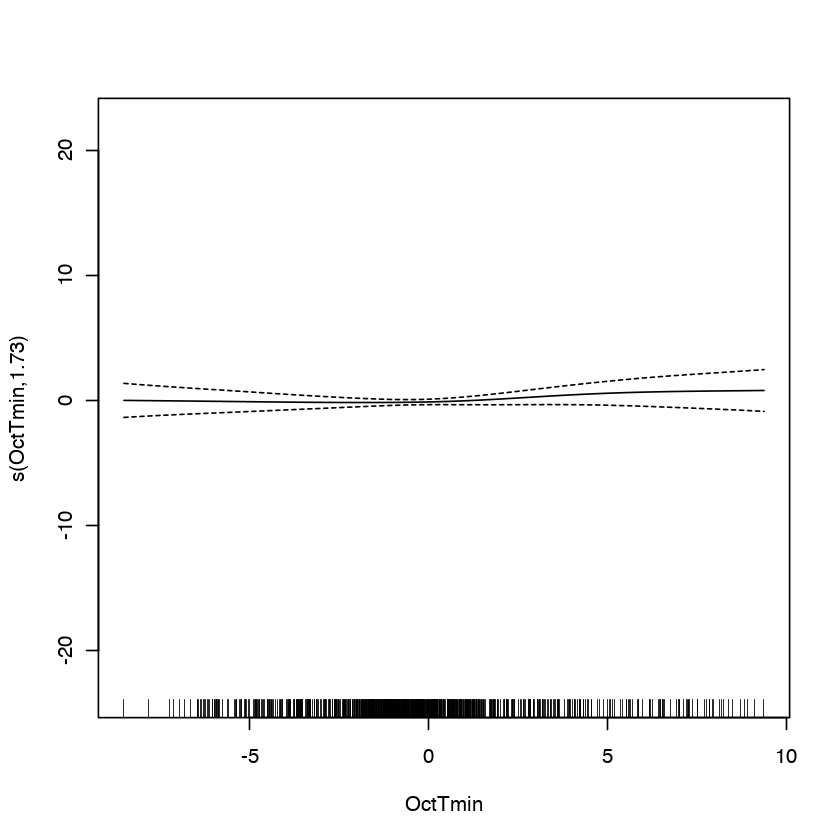

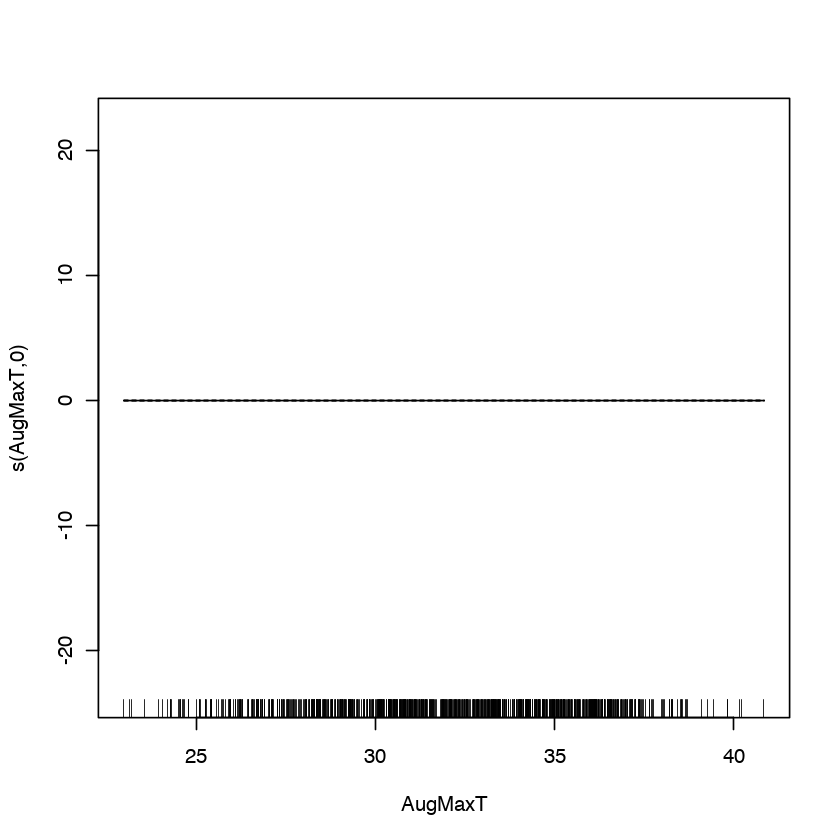

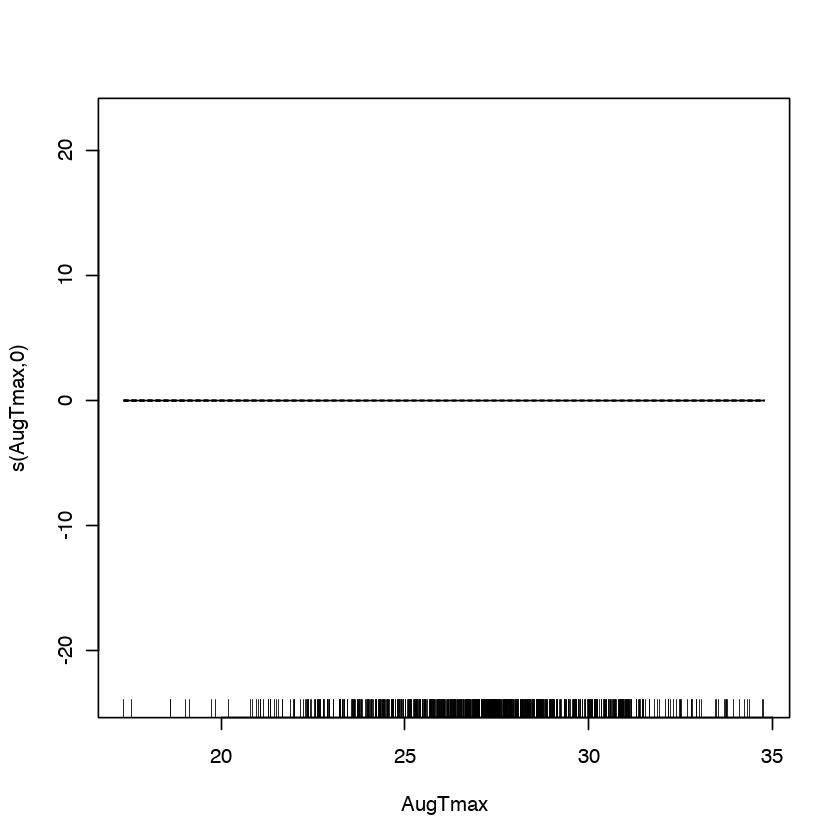

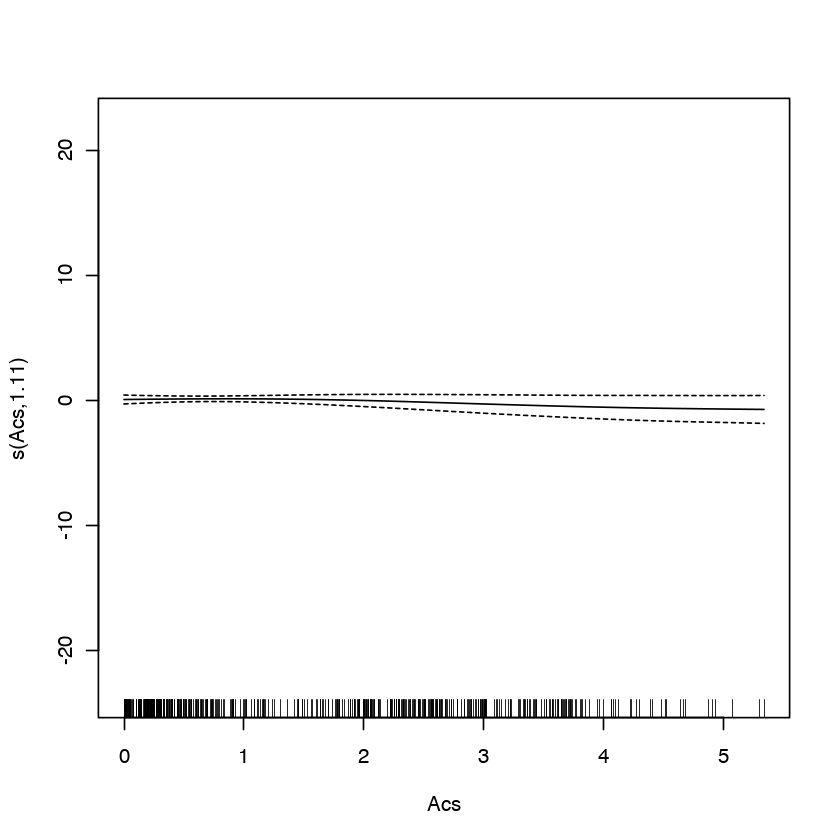

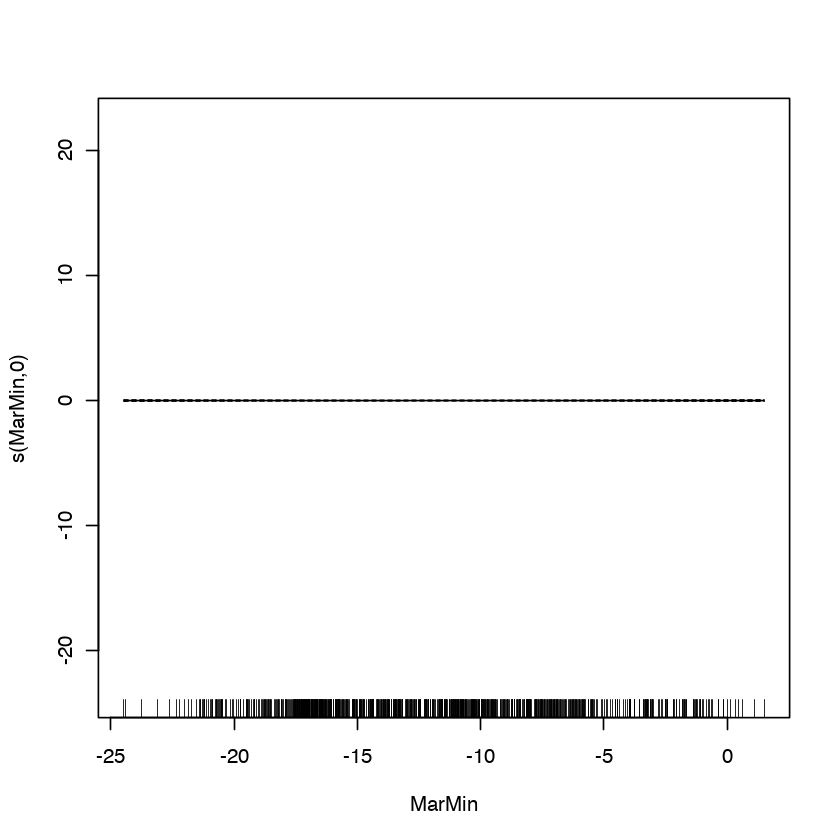

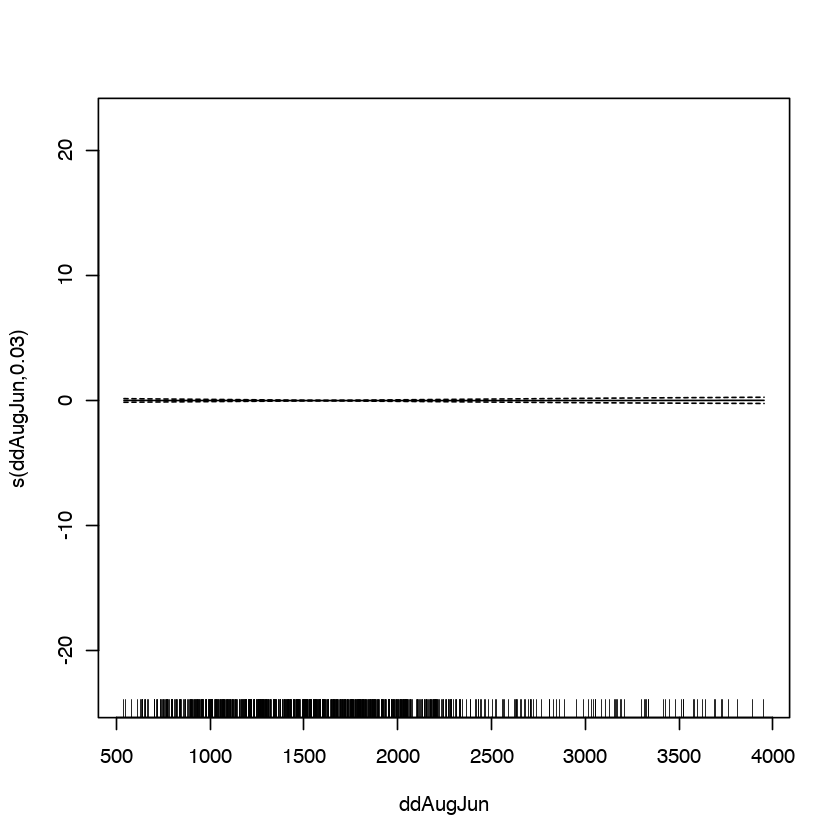

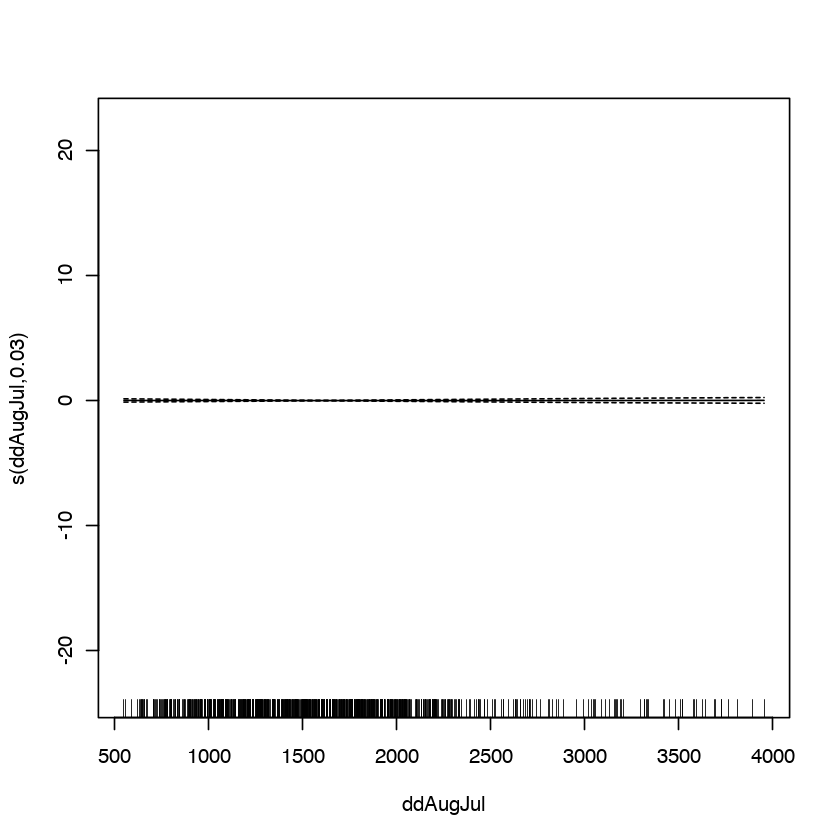

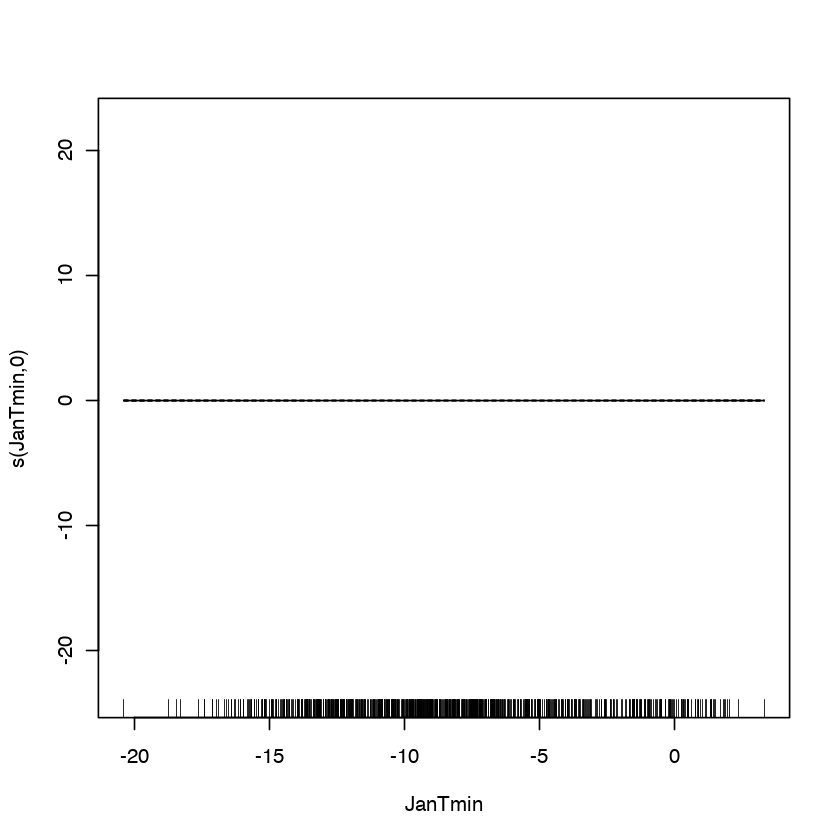

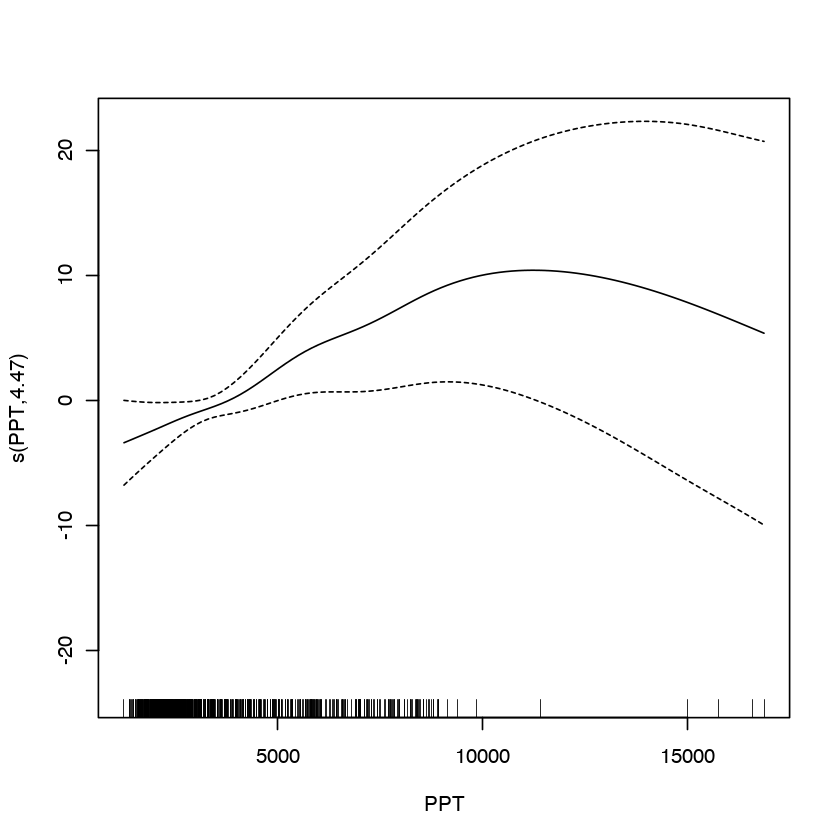

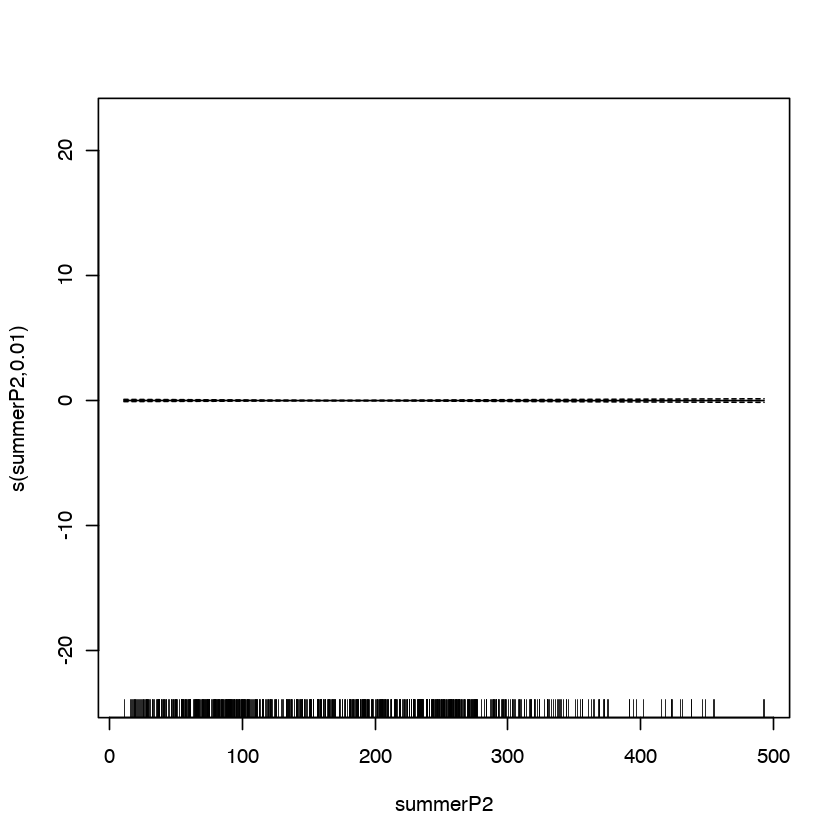

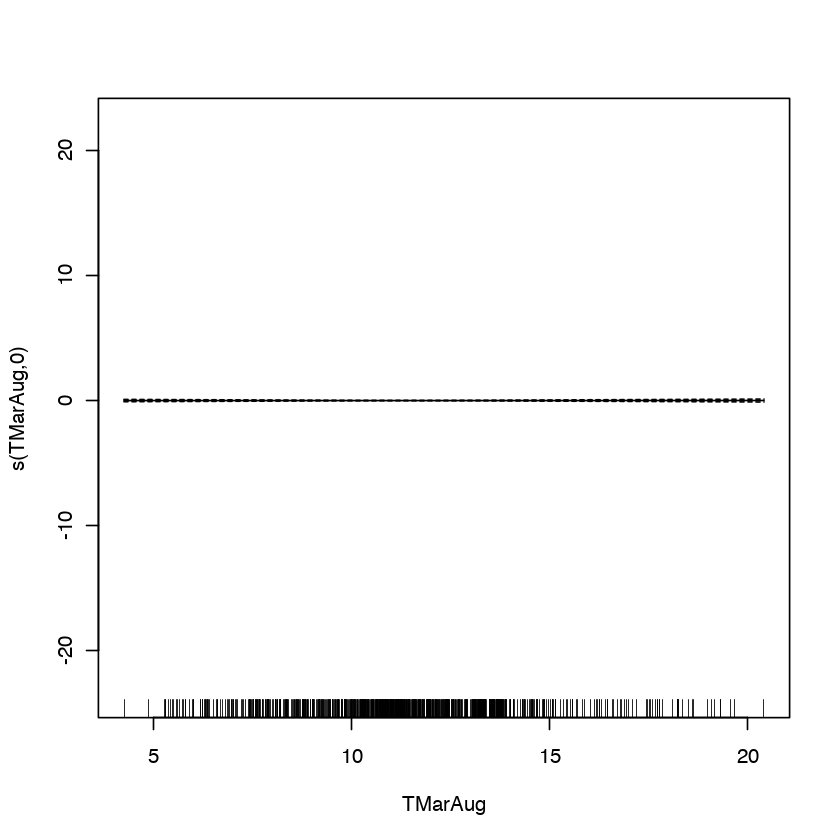

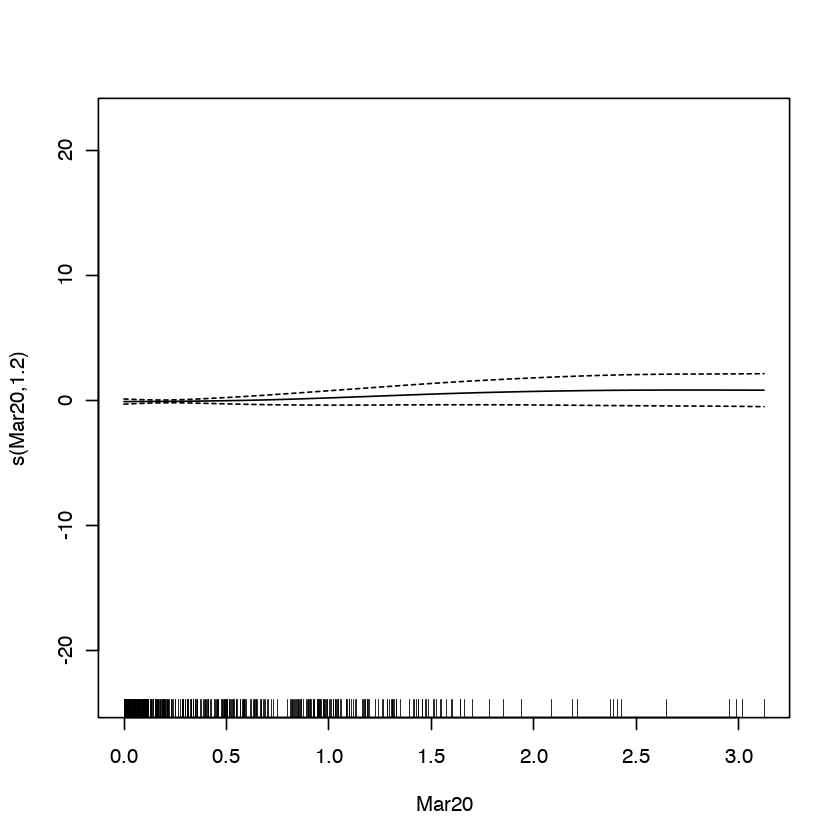

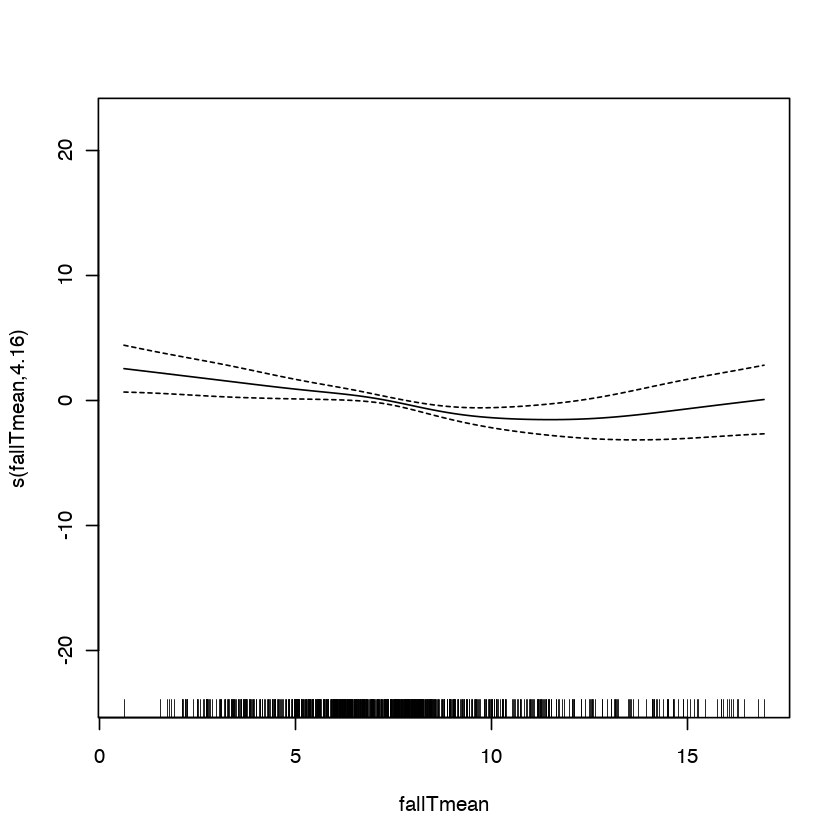

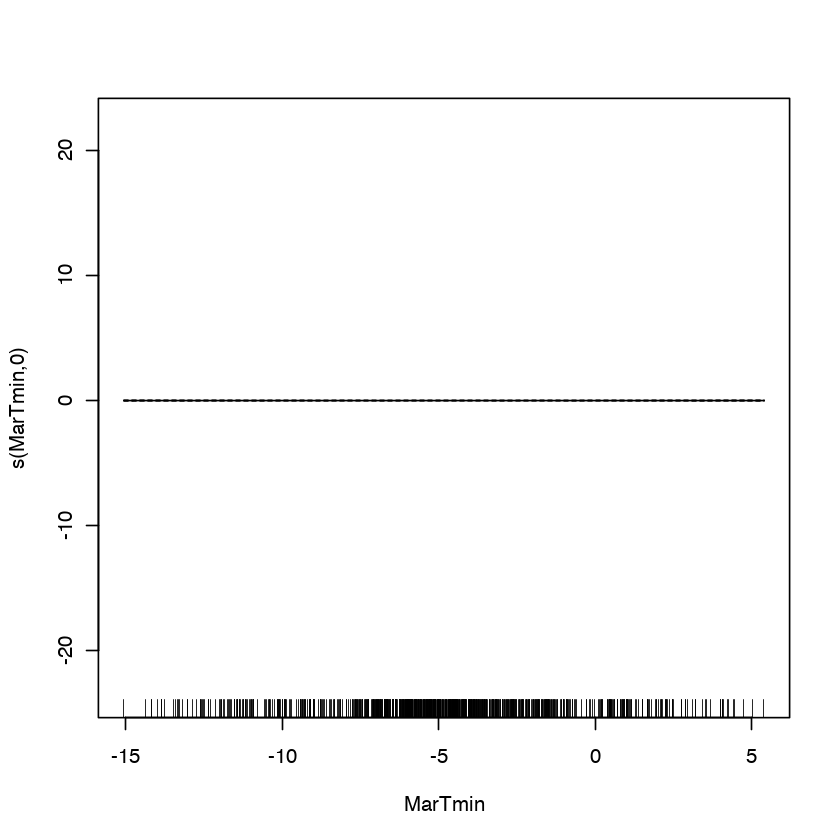

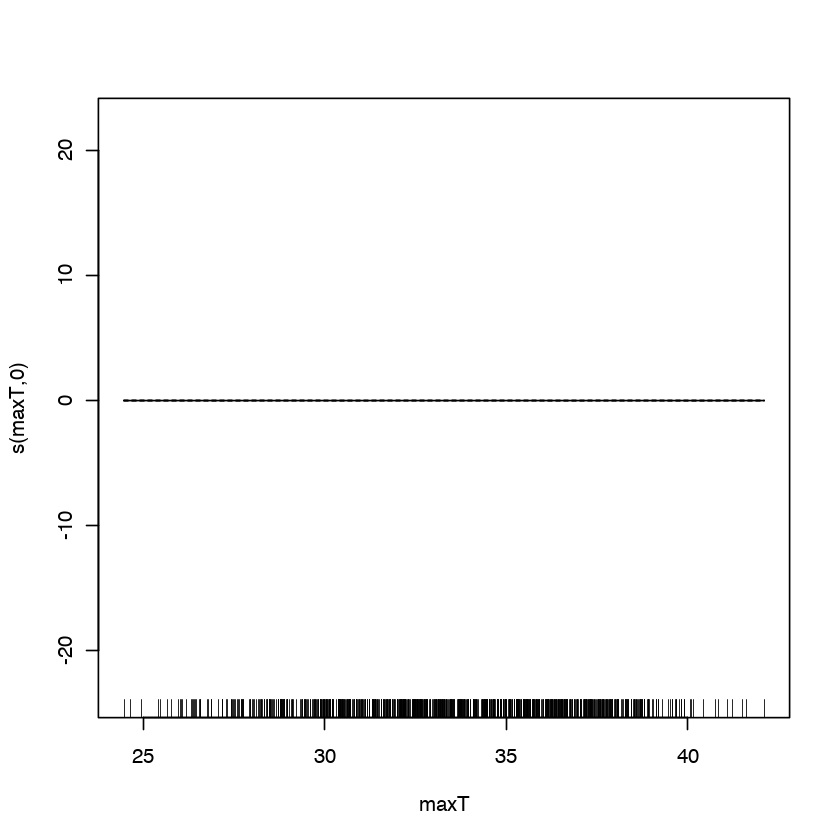

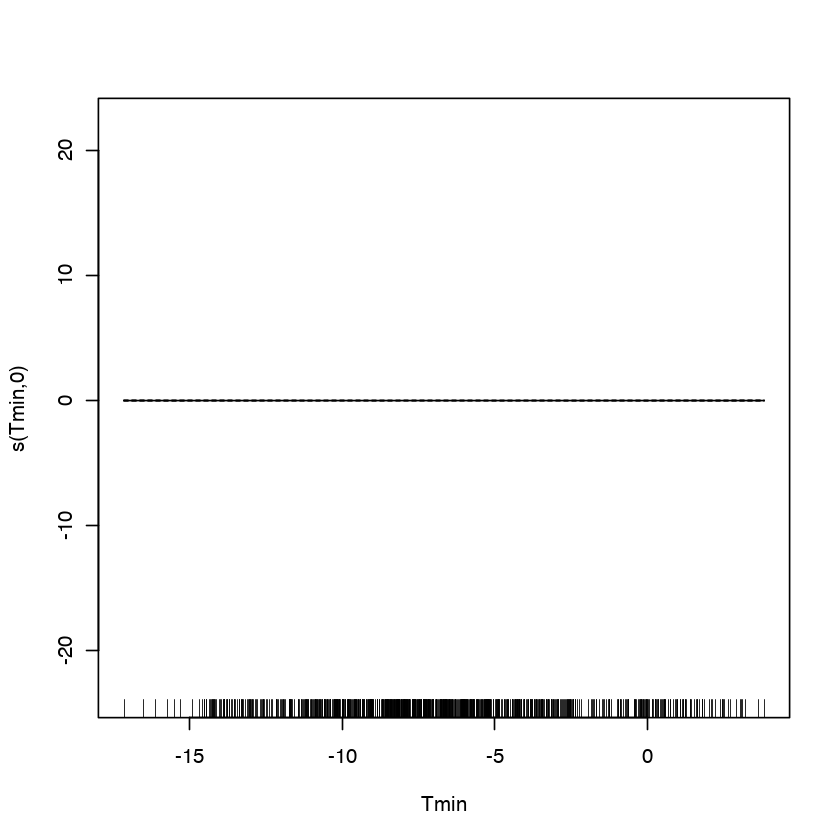

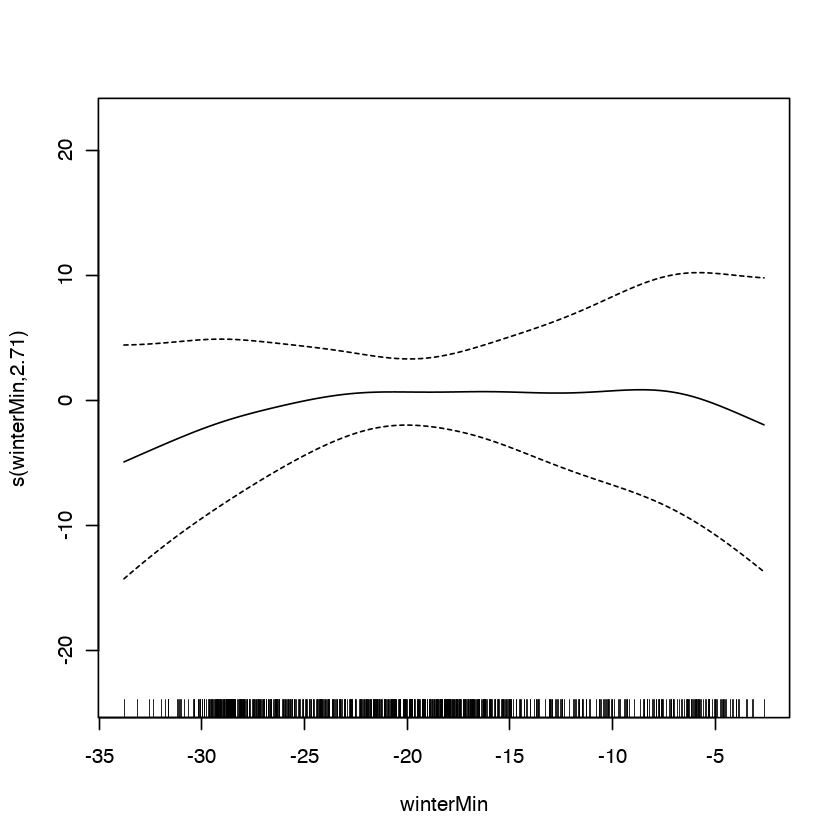

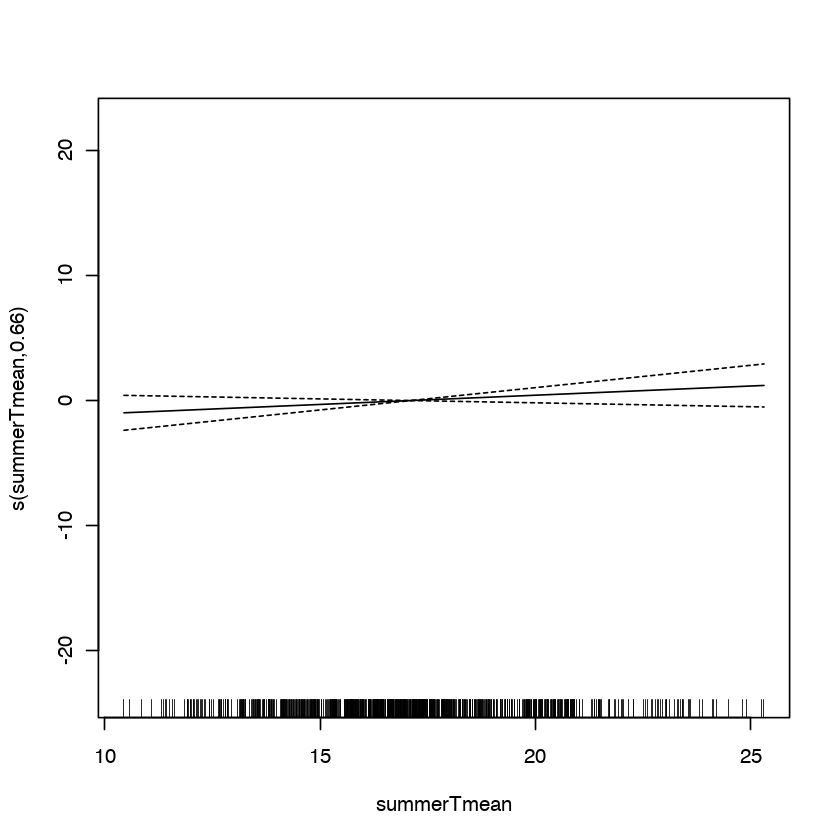

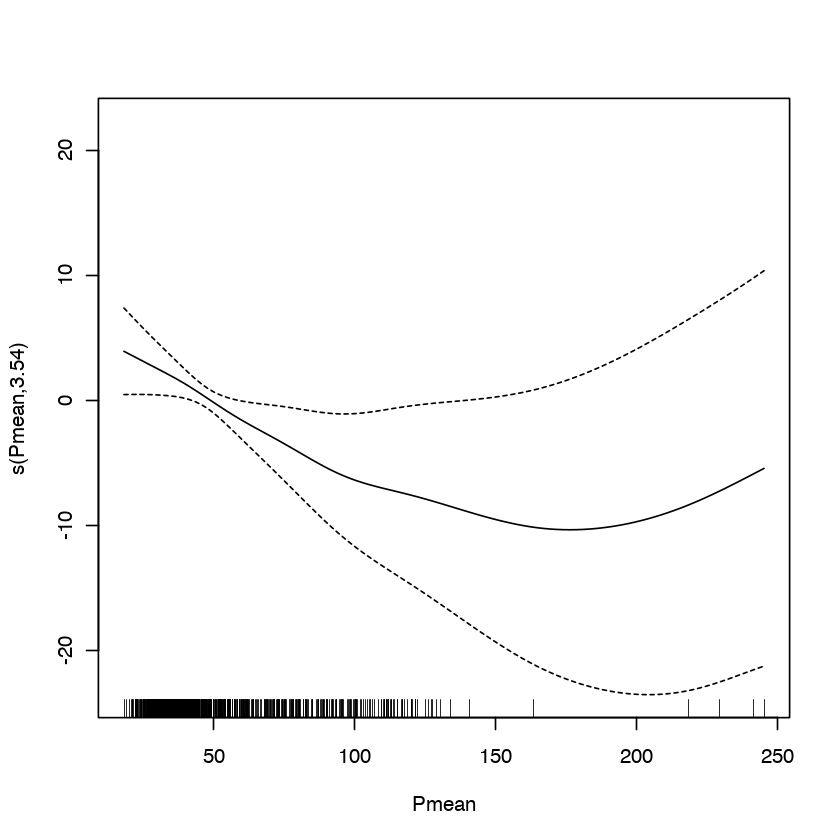

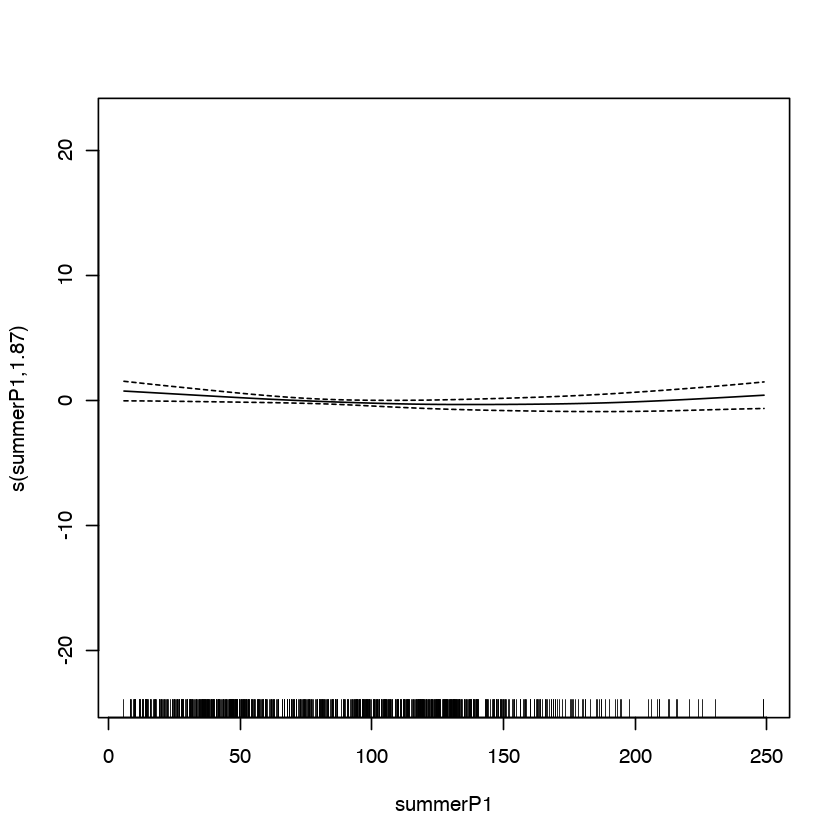

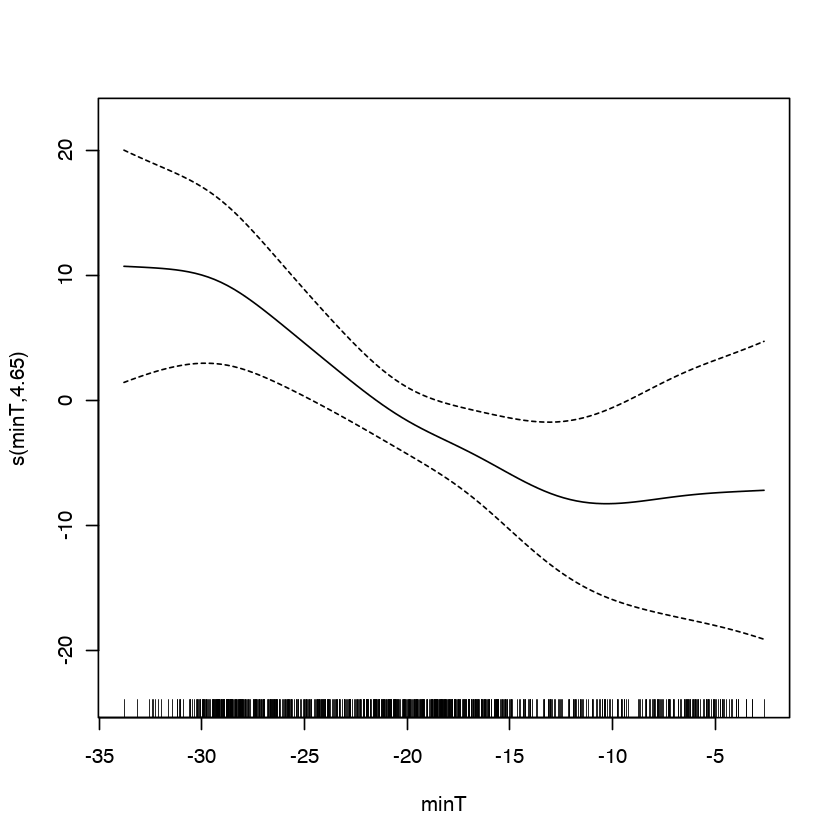

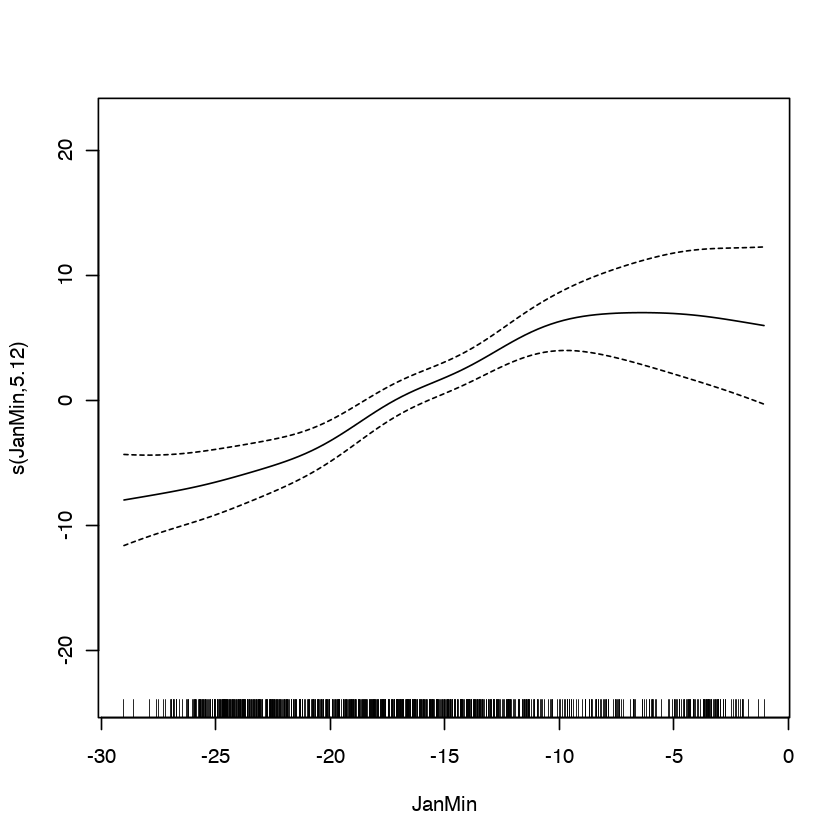

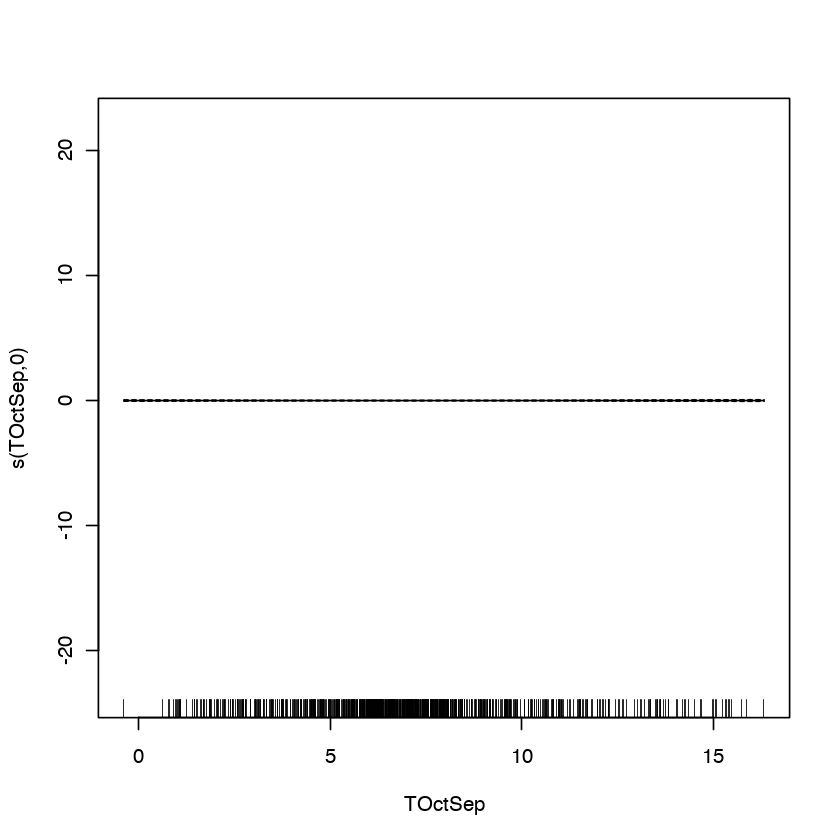

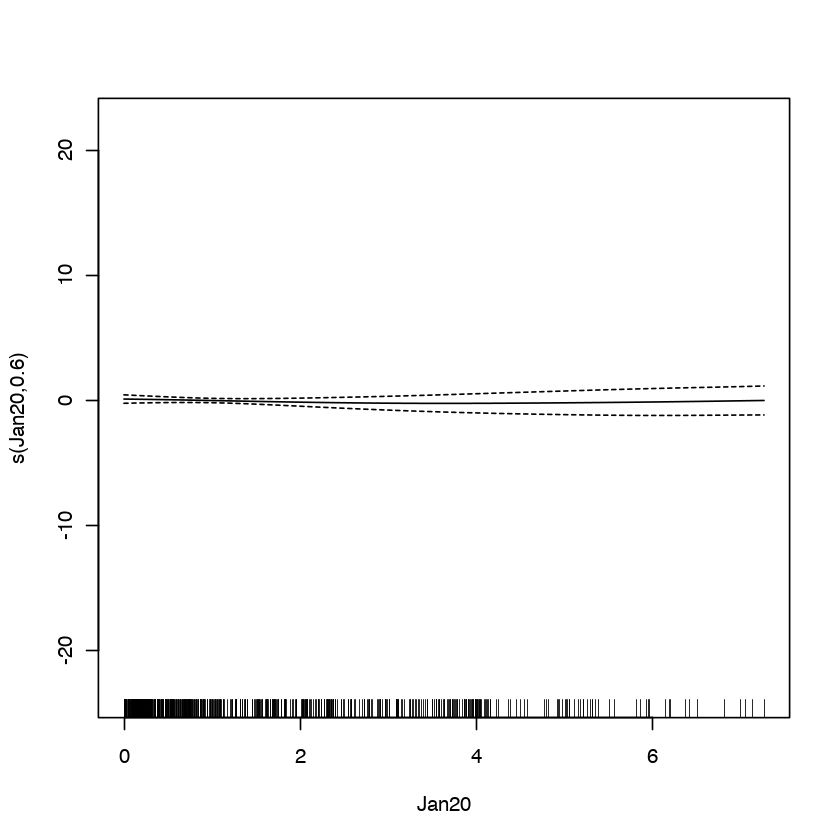

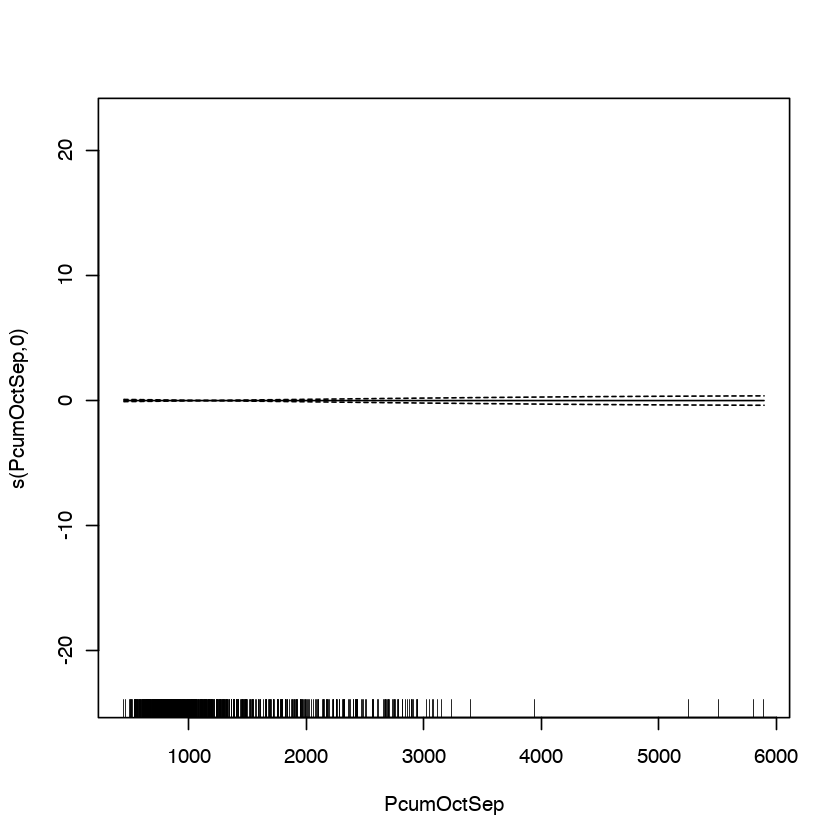

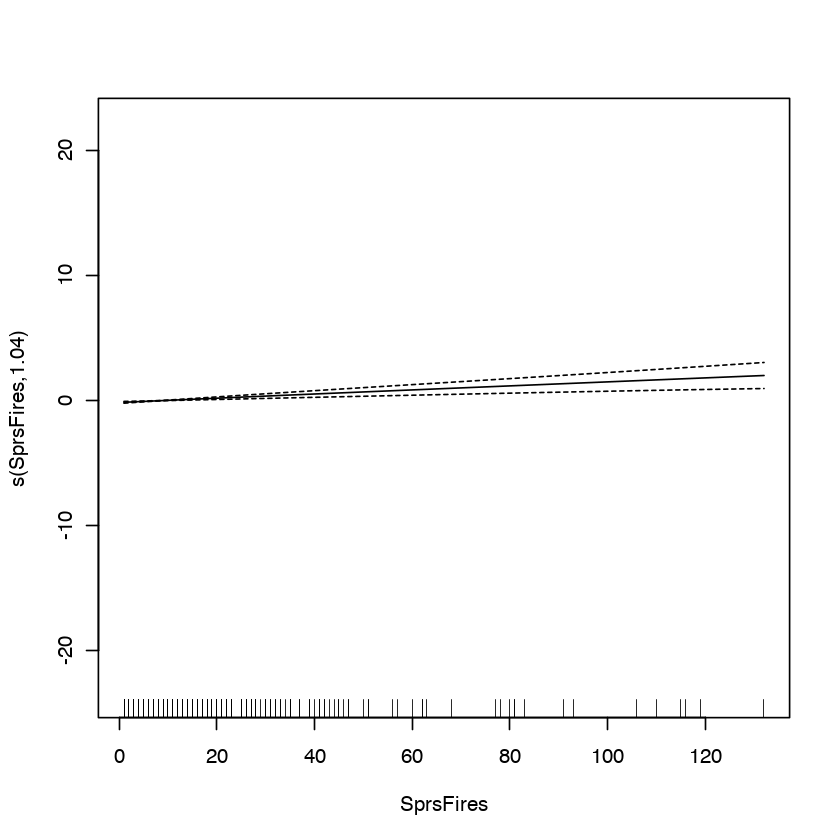

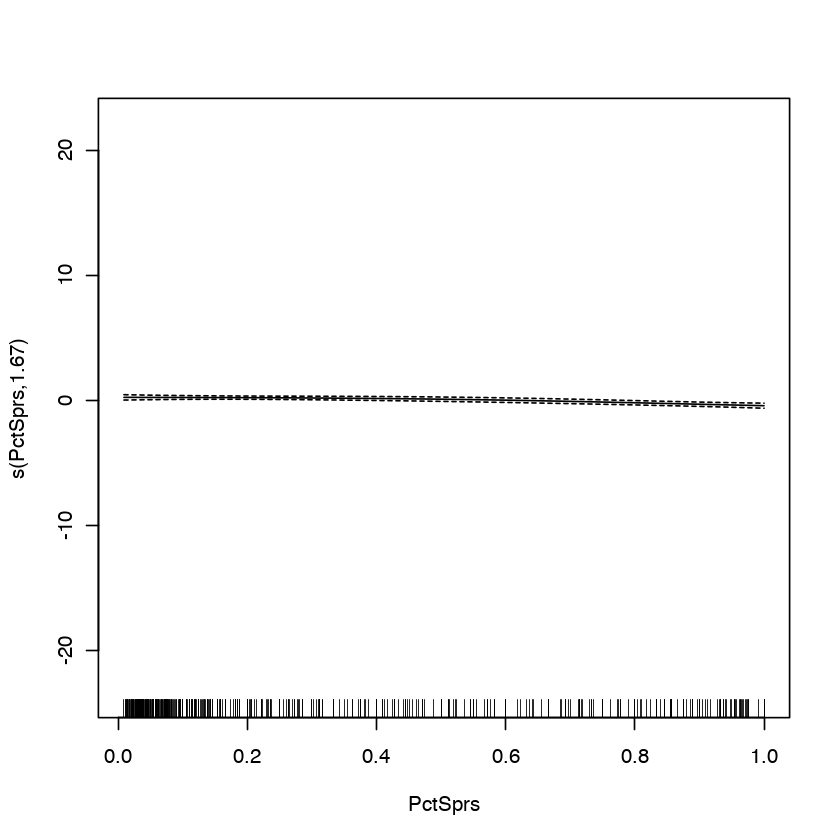

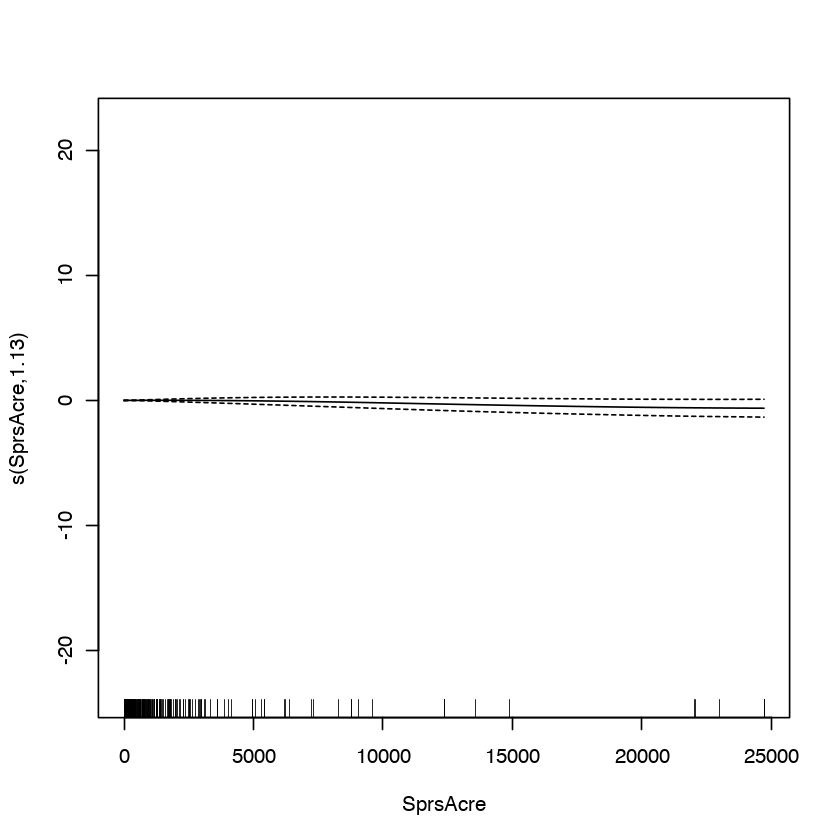

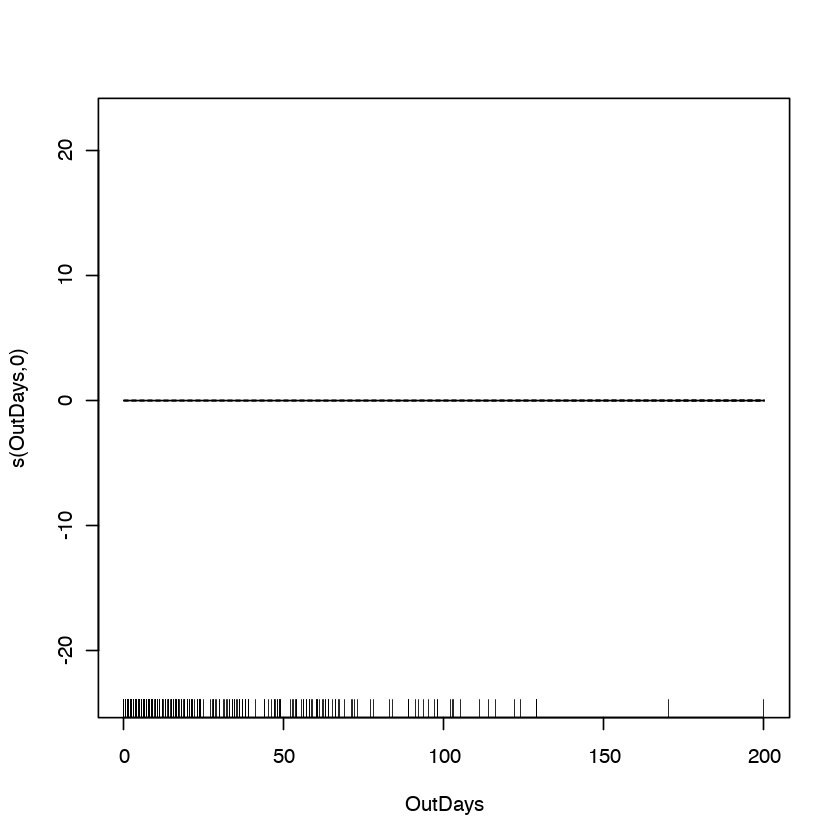

In [18]:
plot(mod)

In [19]:
concurvity(mod)

,para,s(lon),s(lat),s(etopo1),s(mStdAge),s(density),s(PctLarge),s(PctOld),s(mfri),s(prs),⋯,s(summerP1),s(minT),s(JanMin),s(TOctSep),s(Jan20),s(PcumOctSep),s(SprsFires),s(PctSprs),s(SprsAcre),s(OutDays)
worst,0.9999691,0.9987250,0.9991762,0.9889584,0.9976586,0.8114313,0.7323551,0.6689856,0.9062959,0.9351181,⋯,1.0000000,0.9999852,0.9998375,1.0000000,0.9984381,1.000000,0.8657665,0.8757910,0.6944840,0.7312493
observed,0.9999691,0.9980355,0.9790629,0.9873795,0.7053821,0.7331148,0.6501735,0.6626534,0.8573609,0.9120676,⋯,0.9999999,0.9999653,0.9996321,1.0000000,0.9967065,0.999999,0.8321940,0.8243632,0.6481428,0.6962403
estimate,0.9999691,0.9958352,0.9955379,0.9725549,0.7571378,0.7202361,0.6678803,0.6493470,0.8648095,0.9101594,⋯,0.9999957,0.9999387,0.9991219,0.9999999,0.9894200,0.999996,0.7887925,0.8415913,0.6446005,0.5667167


In [20]:
concurvity(mod,full=FALSE)

,para,s(lon),s(lat),s(etopo1),s(mStdAge),s(density),s(PctLarge),s(PctOld),s(mfri),s(prs),⋯,s(summerP1),s(minT),s(JanMin),s(TOctSep),s(Jan20),s(PcumOctSep),s(SprsFires),s(PctSprs),s(SprsAcre),s(OutDays)
para,1.000000e+00,3.405423e-25,2.181475e-24,1.116910e-25,2.806816e-23,4.068104e-24,1.764914e-23,5.420023e-21,5.797258e-19,1.025222e-20,⋯,3.956602e-26,3.162468e-26,7.169484e-26,4.883789e-24,1.151281e-23,5.889747e-25,3.716238e-16,2.943238e-21,1.525171e-24,6.763242e-25
s(lon),3.374736e-25,1.000000e+00,4.138856e-01,4.440723e-01,8.278051e-02,2.578510e-01,2.722350e-01,7.952874e-02,2.599238e-01,2.695822e-01,⋯,7.320839e-01,7.208304e-01,7.585195e-01,4.444954e-01,7.218448e-01,6.868468e-01,8.524403e-02,6.438351e-02,4.067421e-02,1.032327e-01
s(lat),2.176182e-24,4.138856e-01,1.000000e+00,3.205650e-01,6.393749e-02,7.616882e-02,4.239541e-02,5.355775e-02,1.758261e-01,1.398622e-01,⋯,4.363884e-01,3.388774e-01,3.030700e-01,2.616069e-01,2.500652e-01,1.997862e-01,6.882971e-02,1.160395e-01,5.046906e-02,4.014499e-02
s(etopo1),1.124460e-25,4.440723e-01,3.205650e-01,1.000000e+00,7.522810e-02,1.393540e-01,8.272271e-02,1.148070e-01,2.459036e-01,1.946701e-01,⋯,2.293282e-01,4.617303e-01,5.326496e-01,4.520497e-01,2.451140e-01,2.520596e-01,7.120664e-02,1.832196e-01,3.599468e-02,4.426539e-02
s(mStdAge),2.806677e-23,8.278051e-02,6.393749e-02,7.522810e-02,1.000000e+00,5.943699e-02,1.049989e-01,1.974644e-01,1.597763e-01,5.377130e-02,⋯,1.583283e-01,9.039377e-02,9.100341e-02,5.780930e-02,7.357609e-02,6.179993e-01,3.286250e-02,6.392208e-02,3.165692e-02,7.835327e-02
s(density),4.064669e-24,2.578510e-01,7.616882e-02,1.393540e-01,5.943699e-02,1.000000e+00,6.058694e-02,5.567545e-02,1.081152e-01,8.755598e-02,⋯,8.092980e-02,1.562084e-01,1.618902e-01,1.515377e-01,9.434238e-02,3.089395e-01,1.247680e-01,8.853824e-02,6.162249e-02,4.678982e-02
s(PctLarge),1.765733e-23,2.722350e-01,4.239541e-02,8.272271e-02,1.049989e-01,6.058694e-02,1.000000e+00,1.025321e-01,4.655975e-02,6.704608e-02,⋯,1.750323e-01,2.121243e-01,2.109203e-01,7.535845e-02,2.024496e-01,1.128952e-01,3.327386e-02,4.350100e-02,3.137213e-02,2.808559e-02
s(PctOld),5.420520e-21,7.952874e-02,5.355775e-02,1.148070e-01,1.974644e-01,5.567545e-02,1.025321e-01,1.000000e+00,7.108884e-02,4.472362e-02,⋯,5.780904e-02,7.623775e-02,7.637784e-02,9.196330e-02,4.532579e-02,5.628646e-02,2.518484e-02,7.256715e-02,2.548411e-02,4.581871e-02
s(mfri),5.797277e-19,2.599238e-01,1.758261e-01,2.459036e-01,1.597763e-01,1.081152e-01,4.655975e-02,7.108884e-02,1.000000e+00,5.771403e-01,⋯,2.332311e-01,2.577177e-01,2.550299e-01,3.223894e-01,2.214306e-01,2.780240e-01,3.464163e-02,9.368688e-02,3.443825e-02,5.039368e-02
s(prs),1.025292e-20,2.695822e-01,1.398622e-01,1.946701e-01,5.377130e-02,8.755598e-02,6.704608e-02,4.472362e-02,5.771403e-01,1.000000e+00,⋯,1.749905e-01,2.447440e-01,2.374695e-01,2.323495e-01,2.263541e-01,1.705346e-01,5.262445e-02,9.010238e-02,4.761277e-02,4.029209e-02


In [22]:
ptm <- proc.time()
mod2 <- bam(
    log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + s(density) + s(PctLarge) + 
    s(PctOld) + vcc + s(mfri) + s(prs) + s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + 
    s(cwd) + maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + s(AugTmean) + 
    s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + s(MarMin) + s(ddAugJun) + s(ddAugJul) + 
    s(JanTmin) + s(PPT) + s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + s(summerP1) + s(minT) + 
    s(JanMin) + s(TOctSep) + s(Jan20) + s(PcumOctSep) + s(SprsFires) + s(PctSprs) + 
    s(SprsAcre) + s(OutDays), data=data, select=TRUE, method="REML")
proc.time() - ptm

    user   system  elapsed 
 896.247   47.840 1025.930 

In [23]:
summary(mod2)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ s(lon) + s(lat) + s(etopo1) + s(mStdAge) + 
    s(density) + s(PctLarge) + s(PctOld) + vcc + s(mfri) + s(prs) + 
    s(pms) + s(pls) + GAP1 + GAP2 + GAP3 + s(vpd) + s(cwd) + 
    maxAugT + s(summerP0) + s(Tmean) + s(mi) + s(Tvar) + s(wd) + 
    s(AugTmean) + s(OctTmin) + s(AugMaxT) + s(AugTmax) + s(Acs) + 
    s(MarMin) + s(ddAugJun) + s(ddAugJul) + s(JanTmin) + s(PPT) + 
    s(summerP2) + s(TMarAug) + s(Mar20) + s(fallTmean) + s(MarTmin) + 
    s(maxT) + s(Tmin) + s(winterMin) + s(summerTmean) + s(Pmean) + 
    s(summerP1) + s(minT) + s(JanMin) + s(TOctSep) + s(Jan20) + 
    s(PcumOctSep) + s(SprsFires) + s(PctSprs) + s(SprsAcre) + 
    s(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.29643    1.71684   0.173   0.8630  
vcc         -0.01735    0.06073  -0.286   0.7753  
GAP1        -0.23979    0.18976  -1.264   0.2067  
GAP2         0.43545    0.21814   1.996 

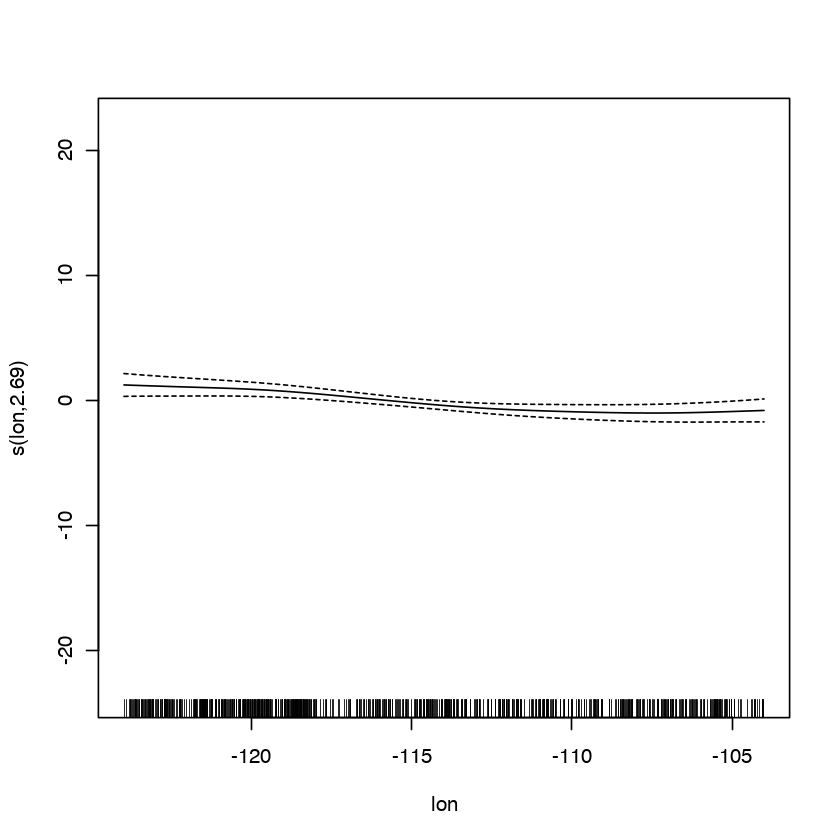

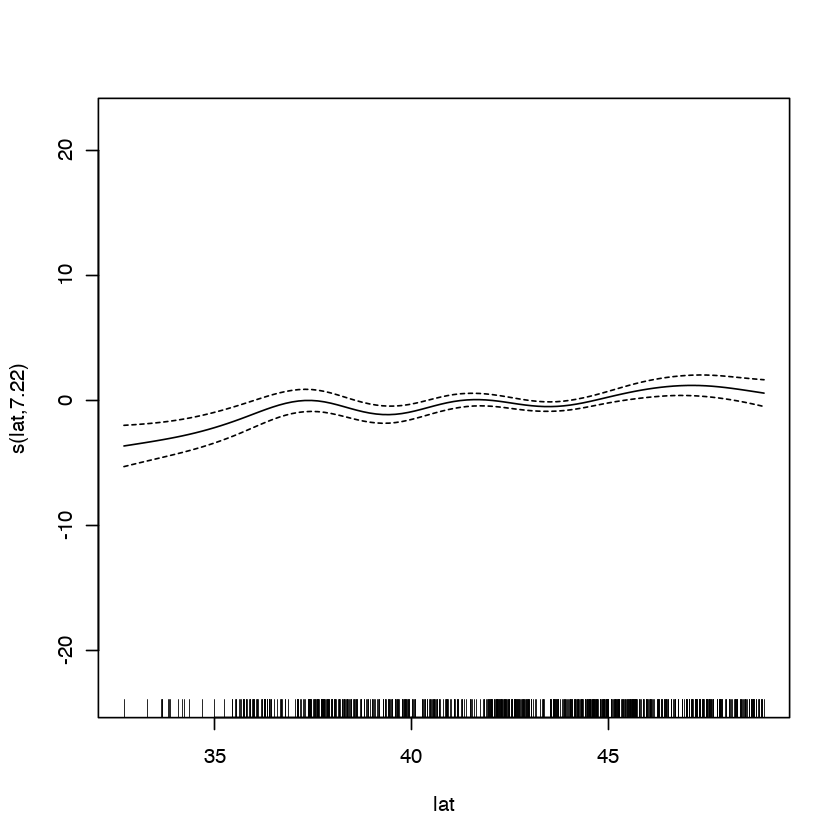

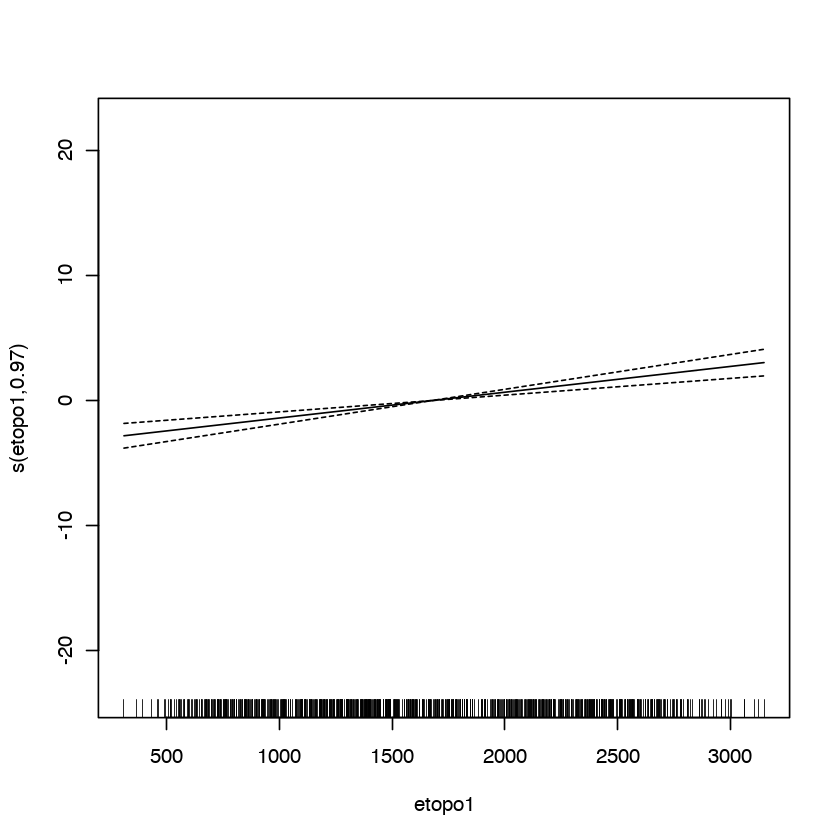

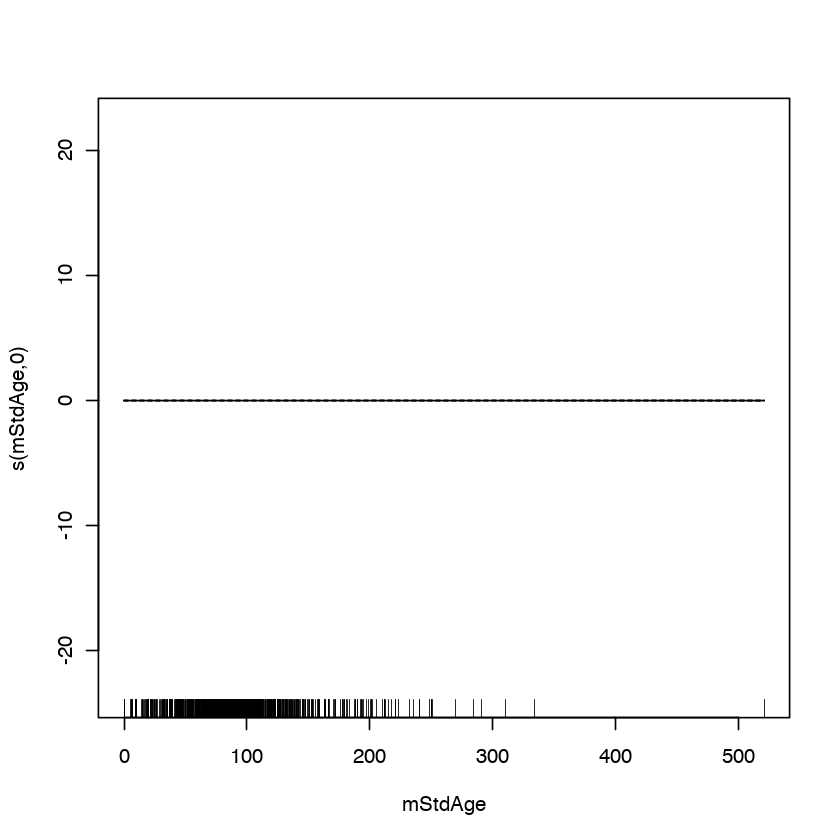

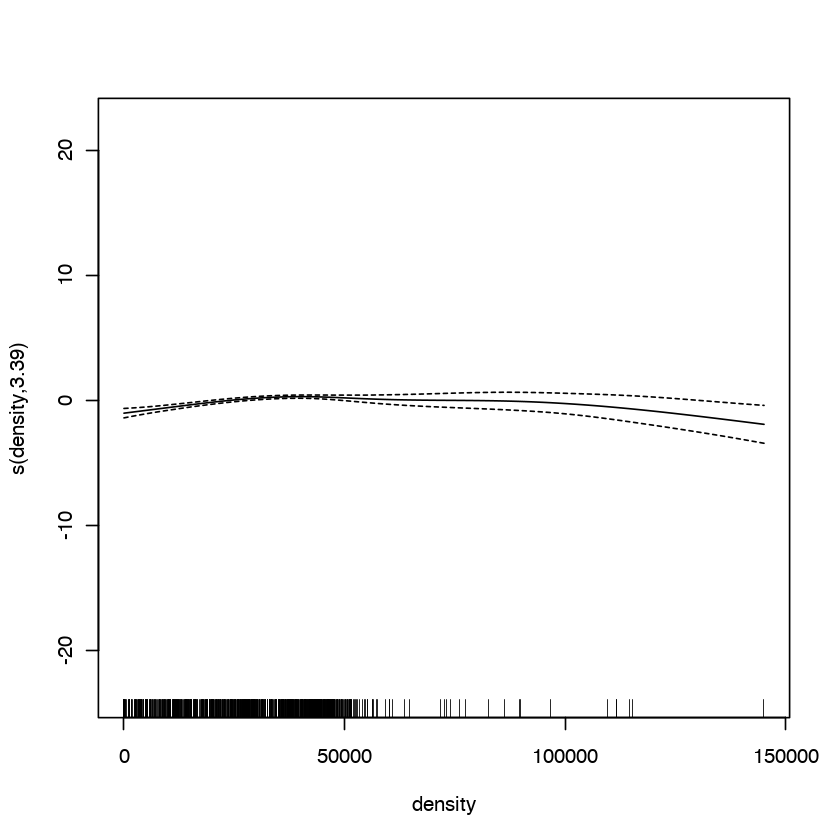

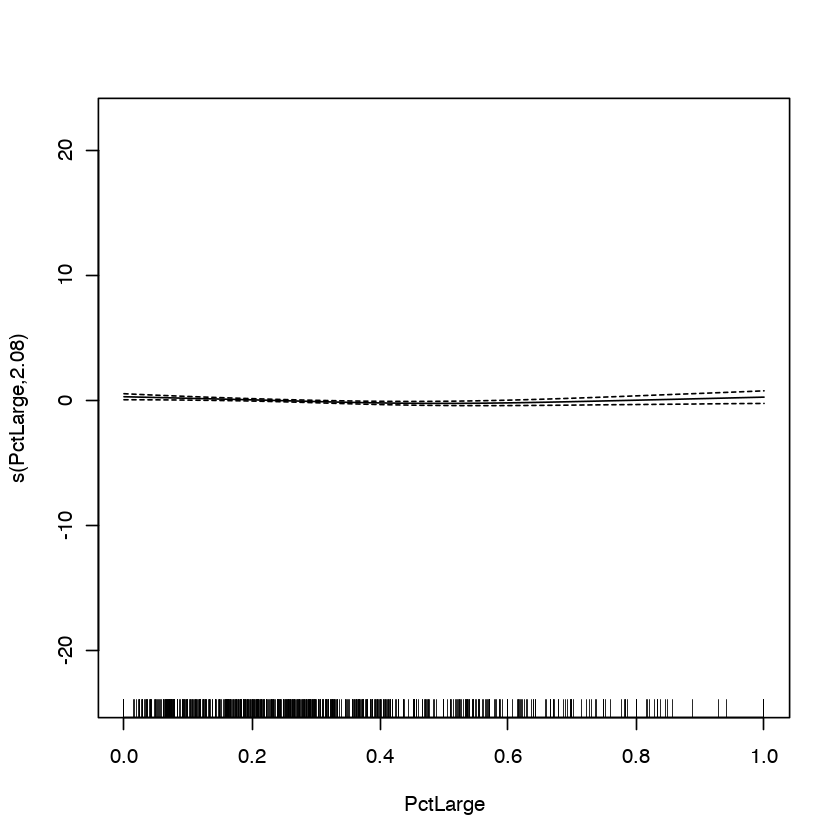

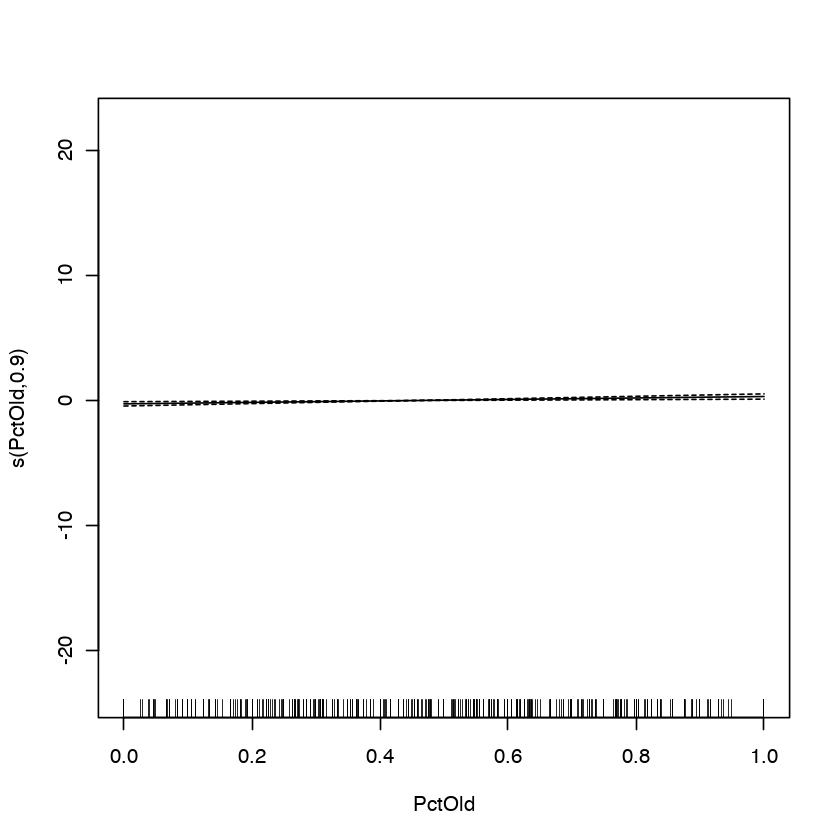

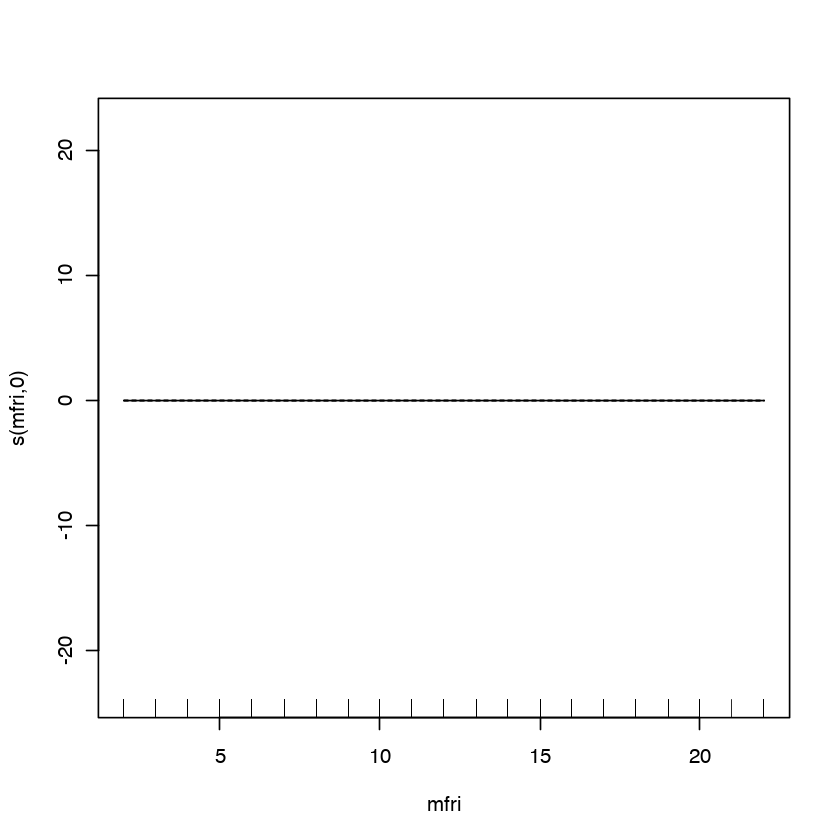

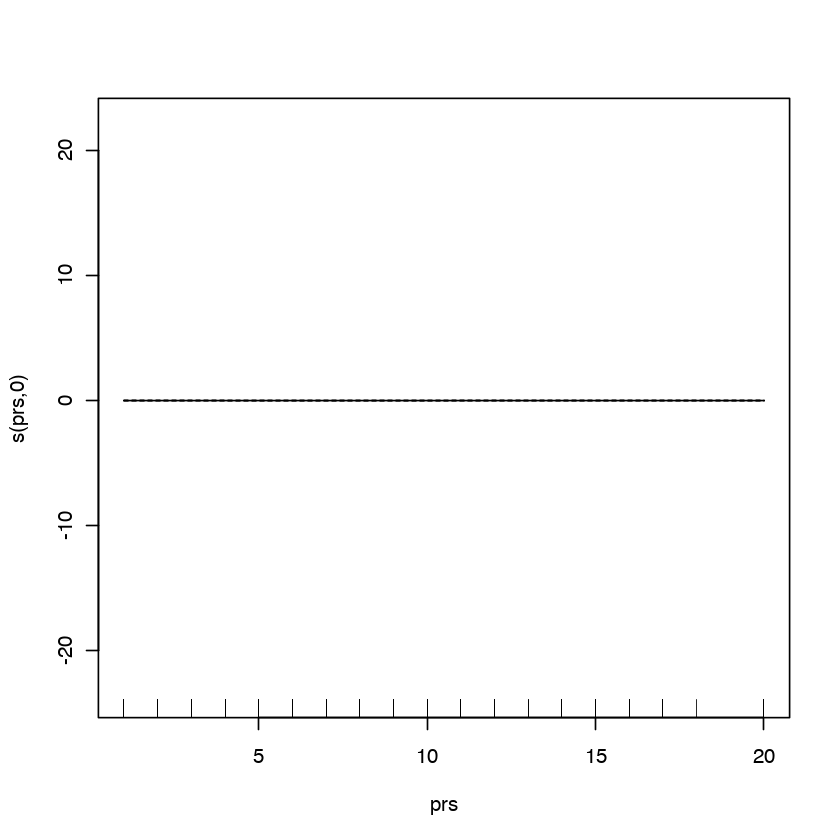

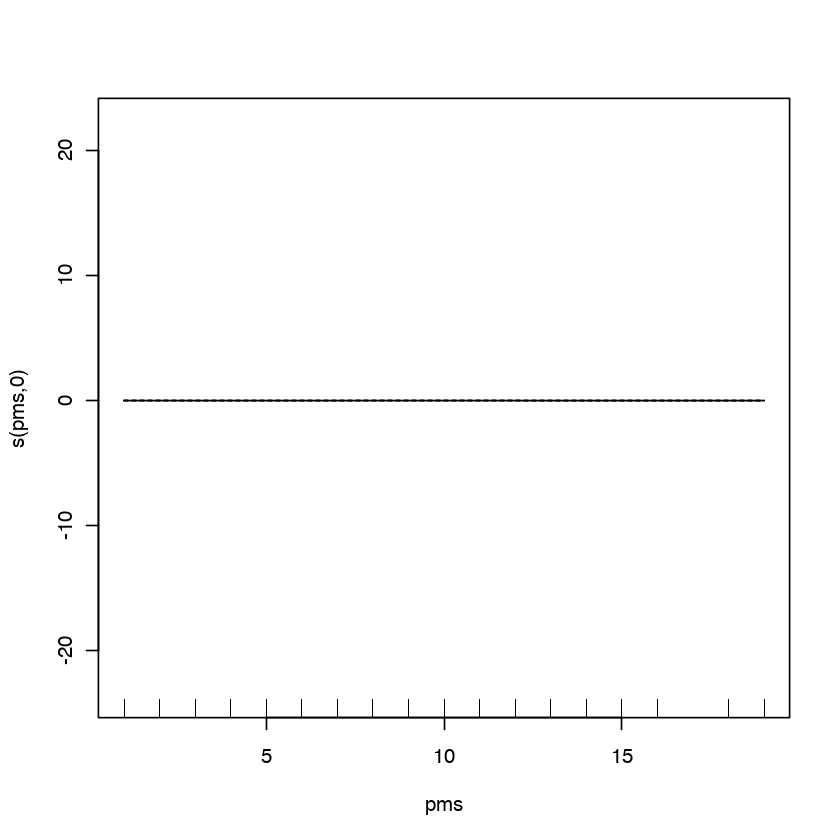

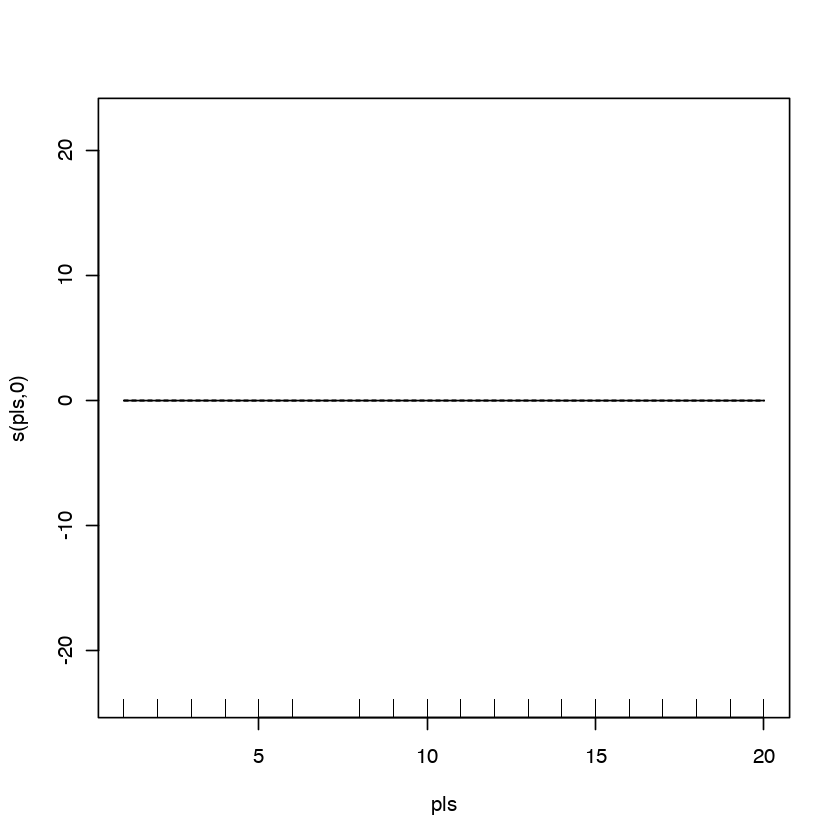

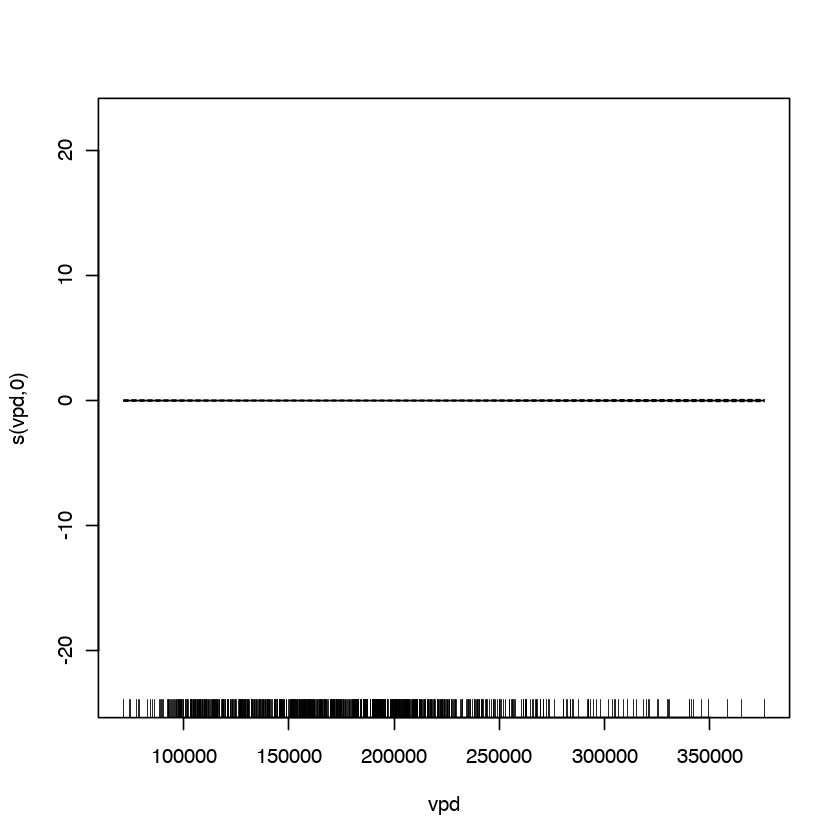

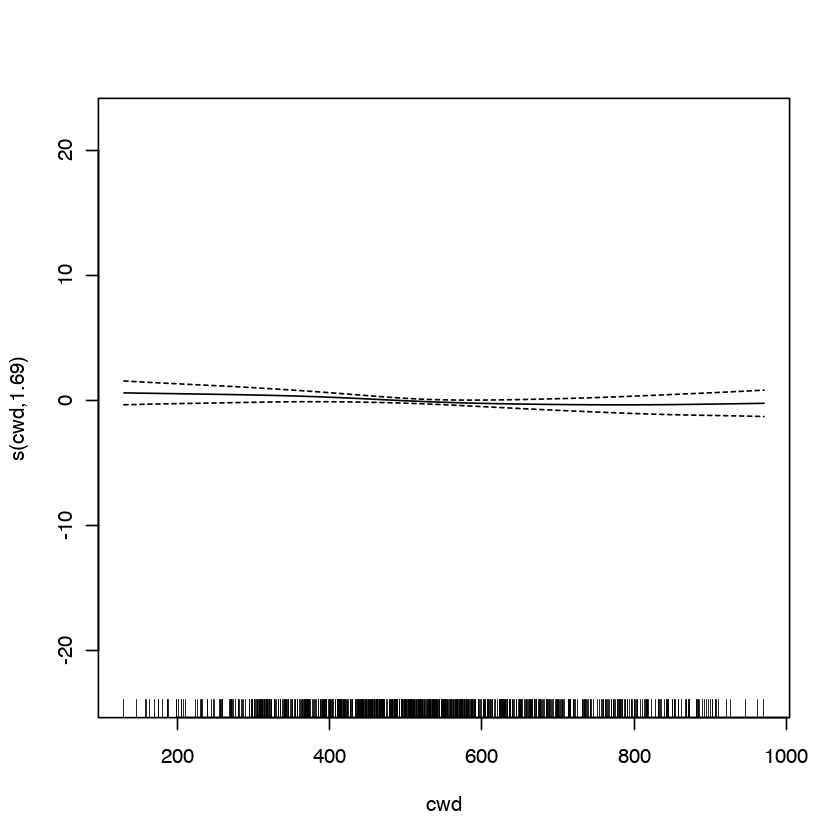

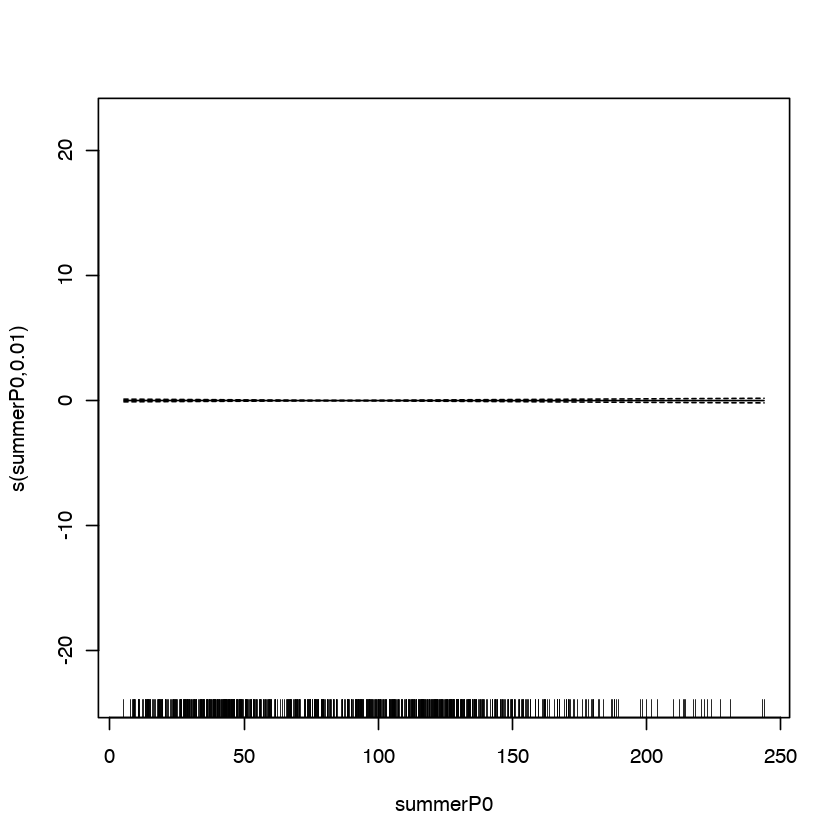

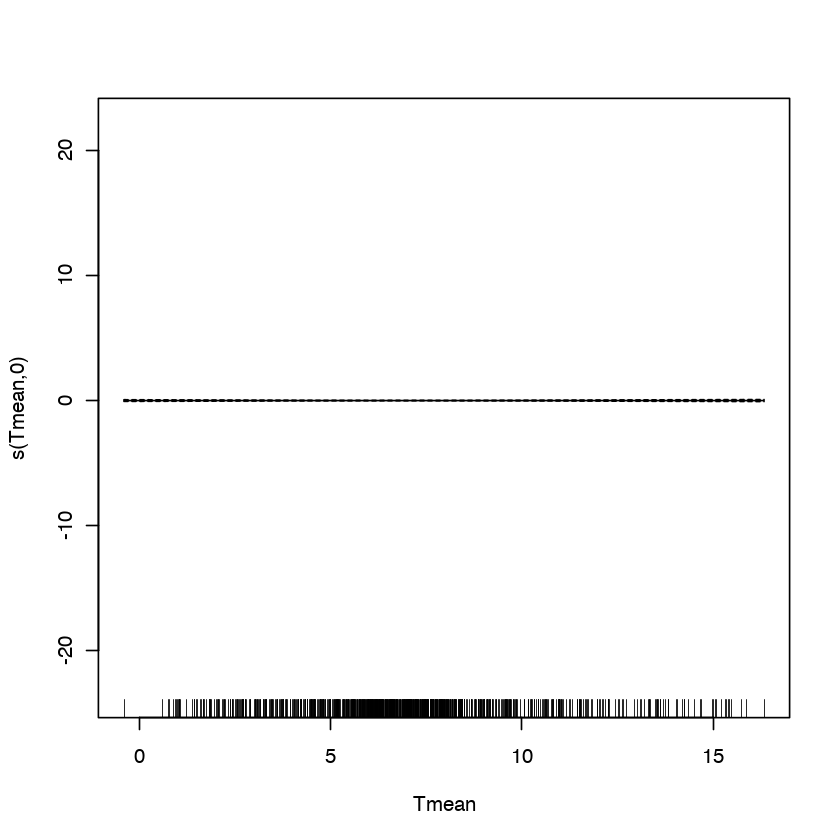

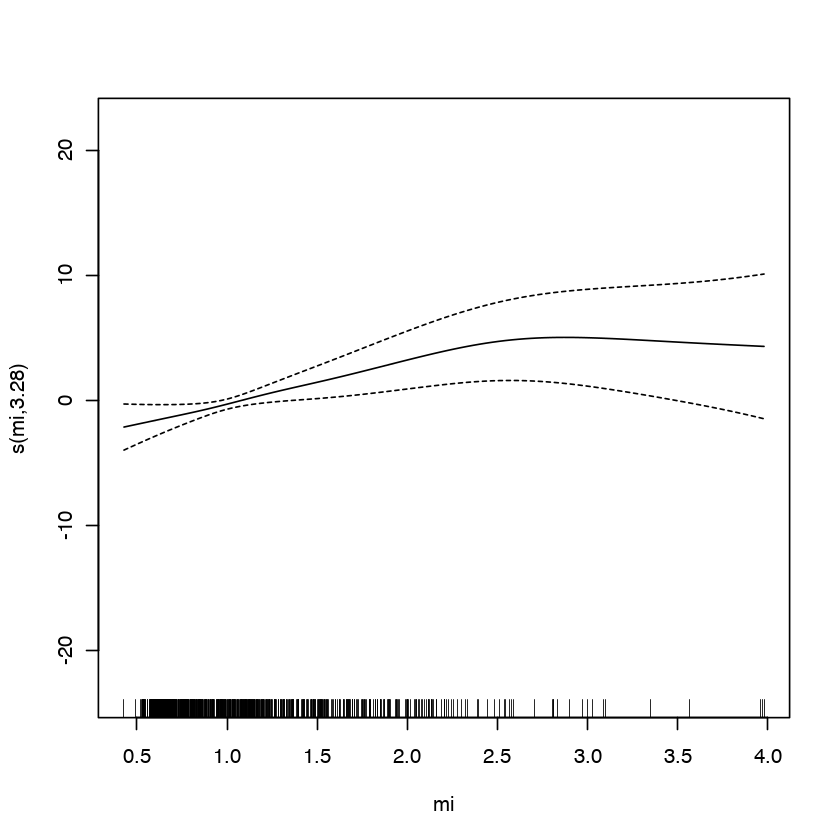

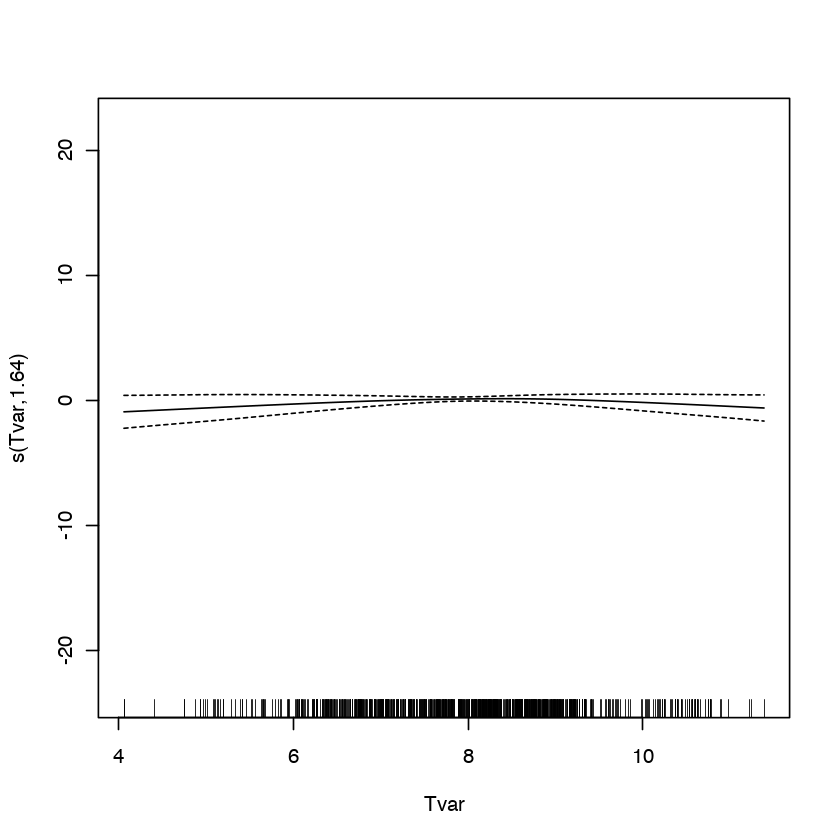

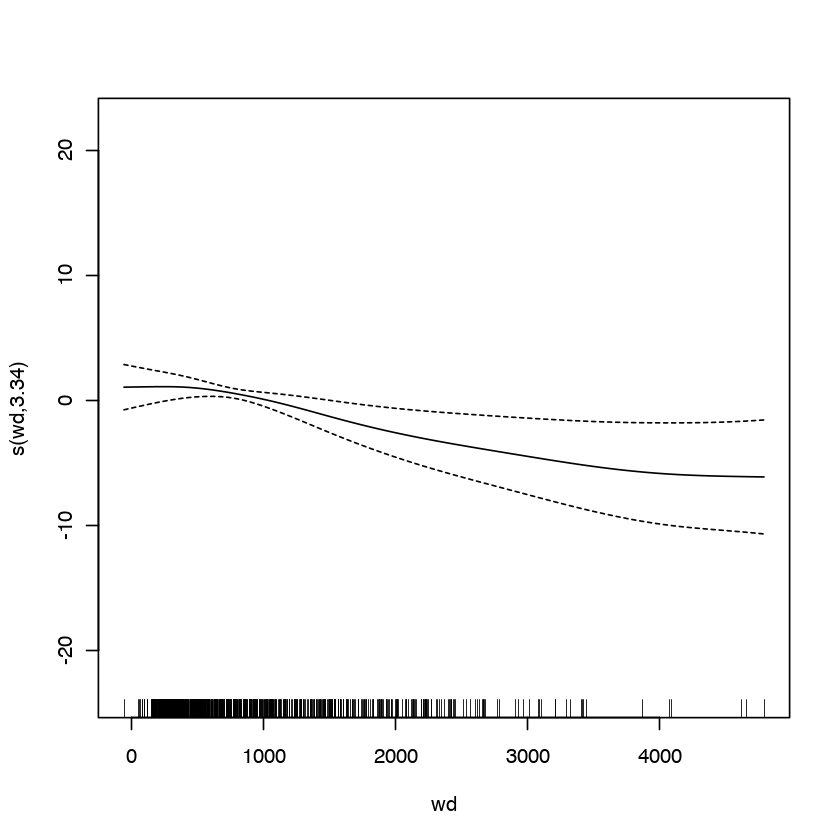

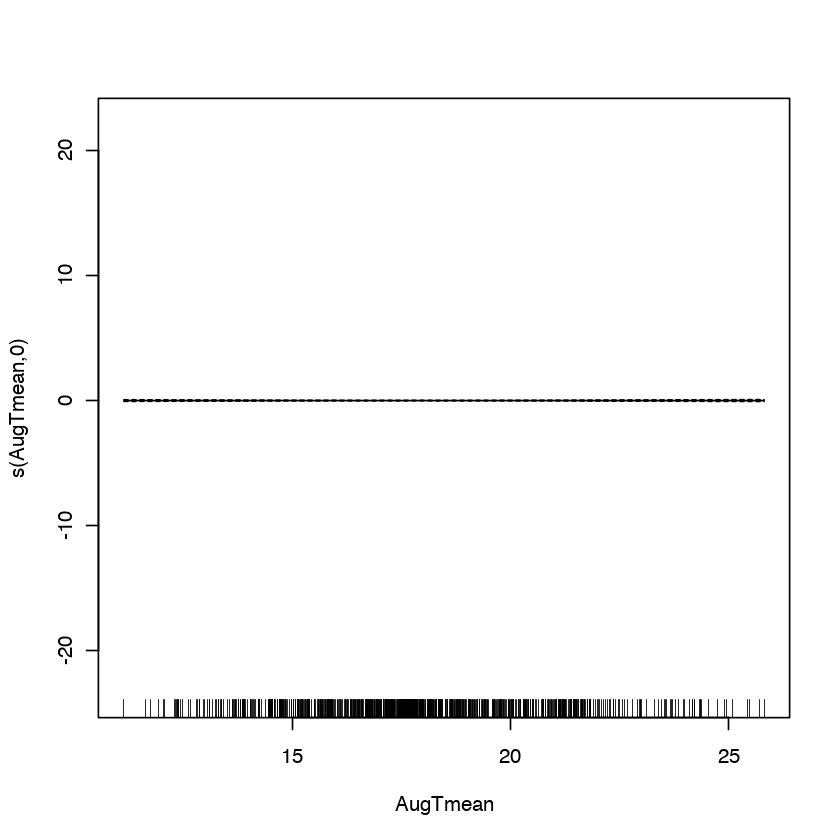

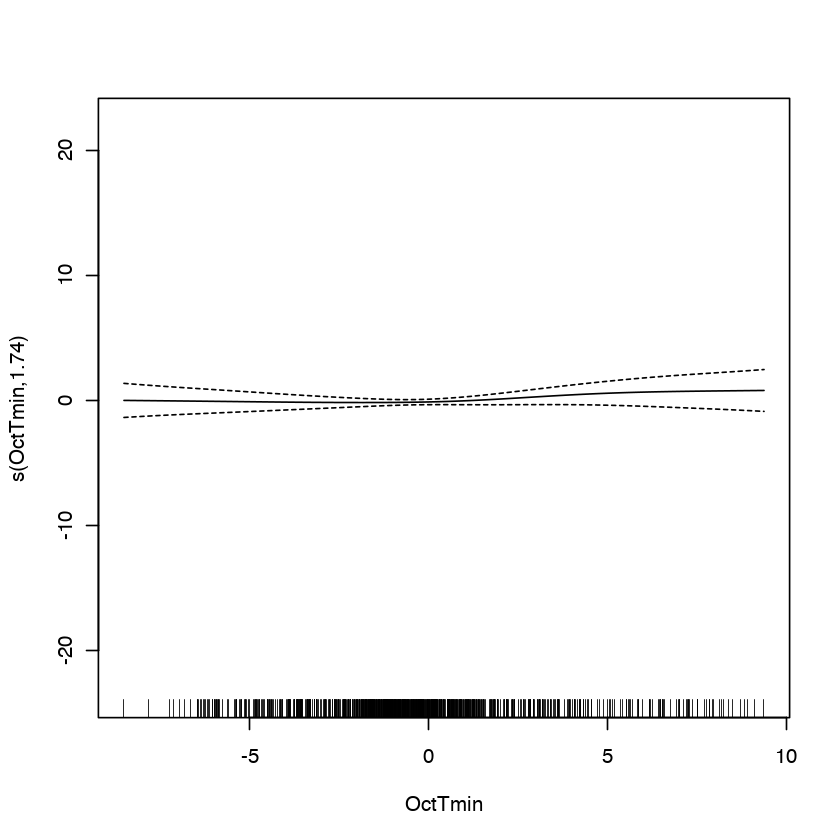

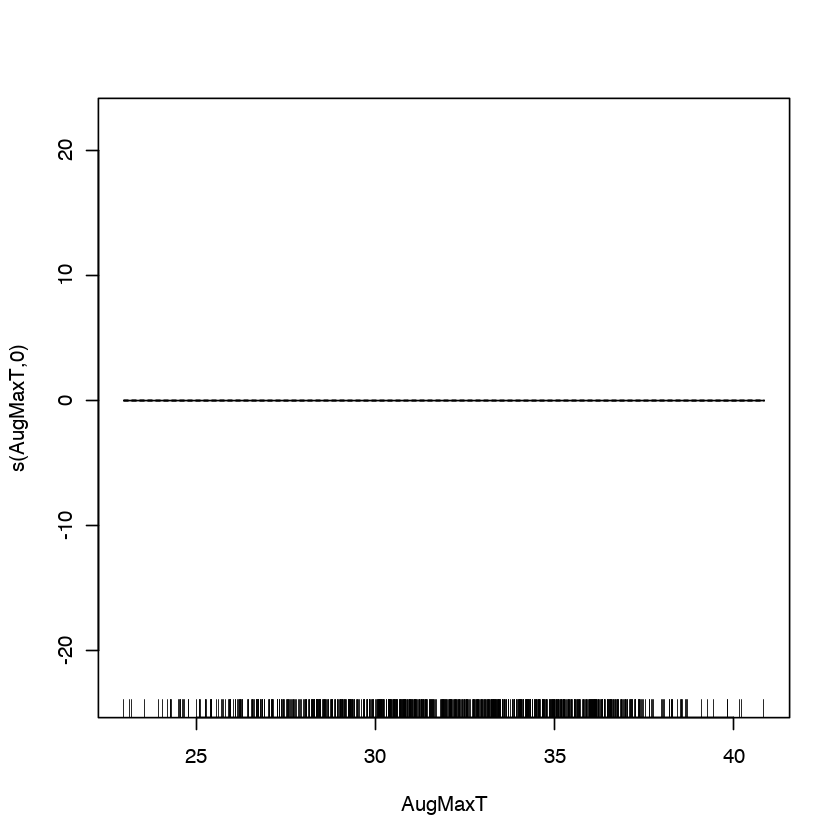

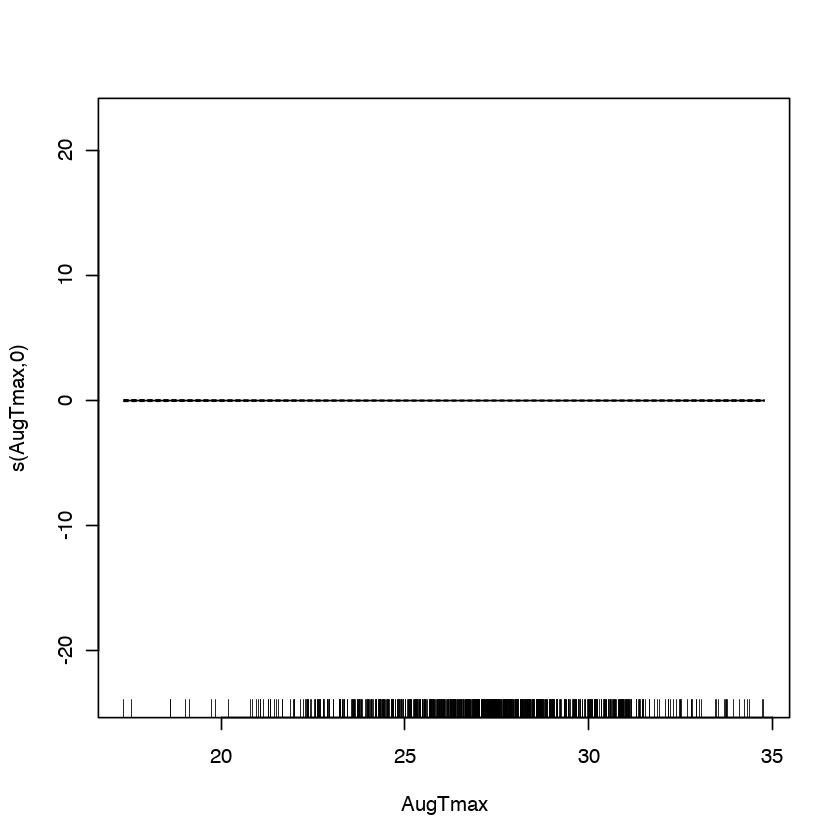

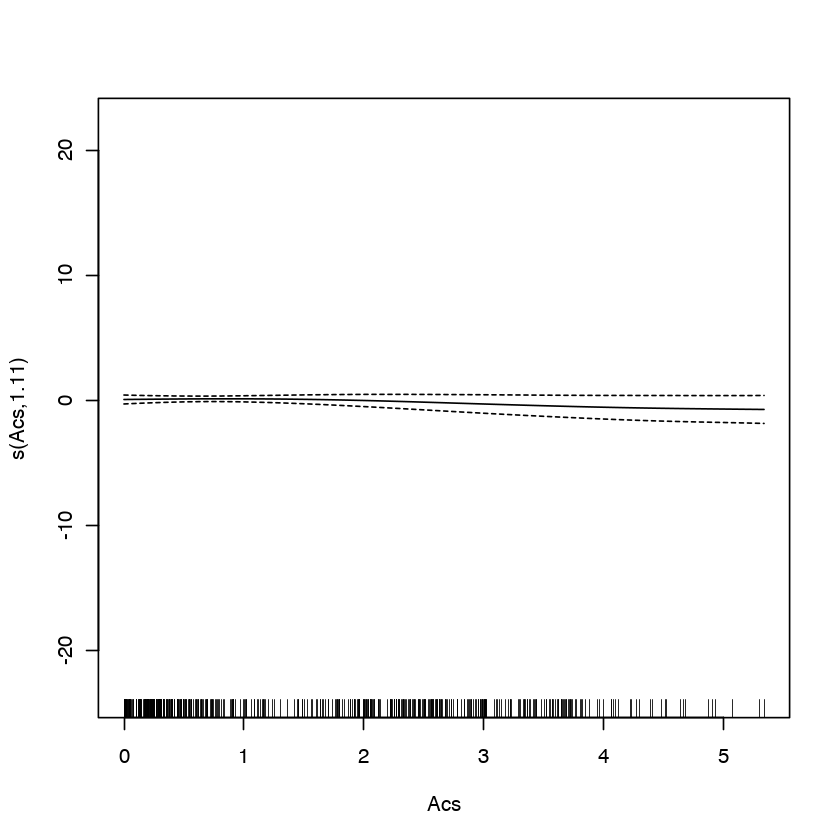

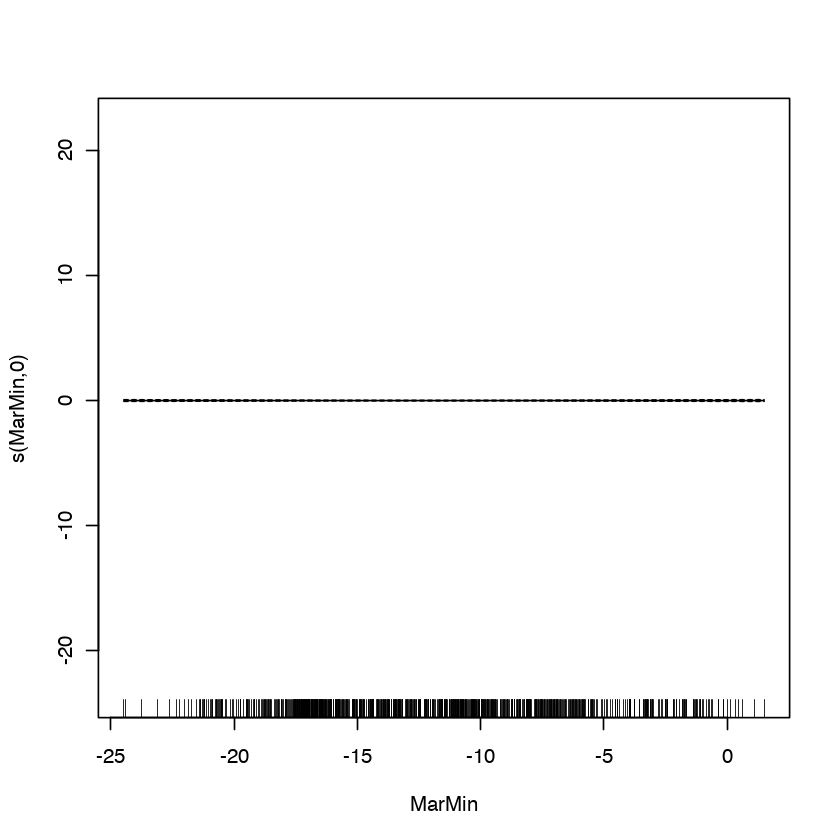

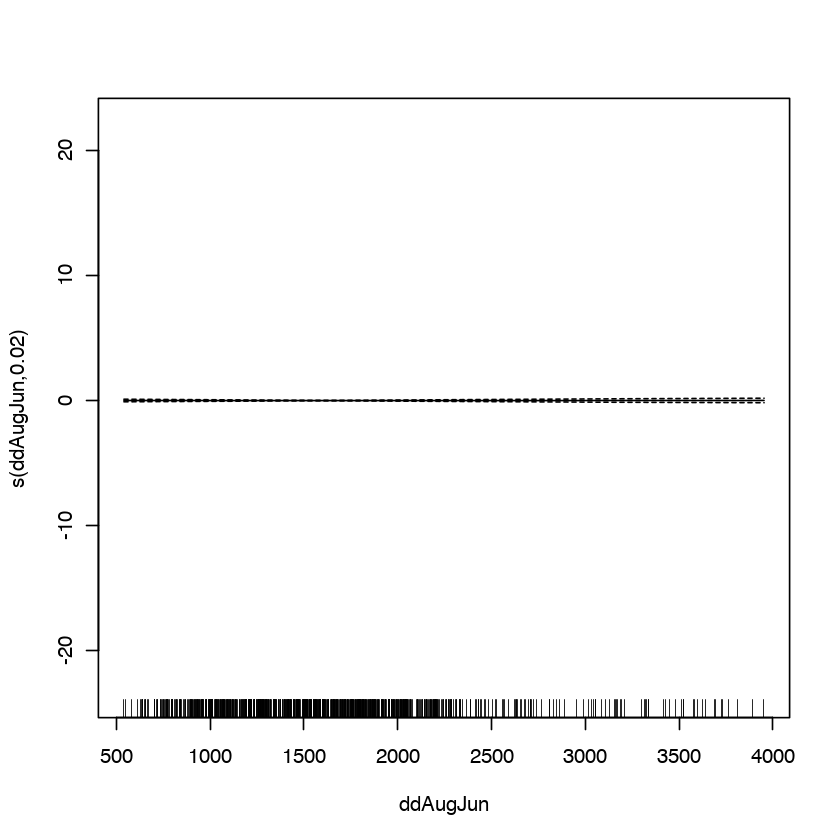

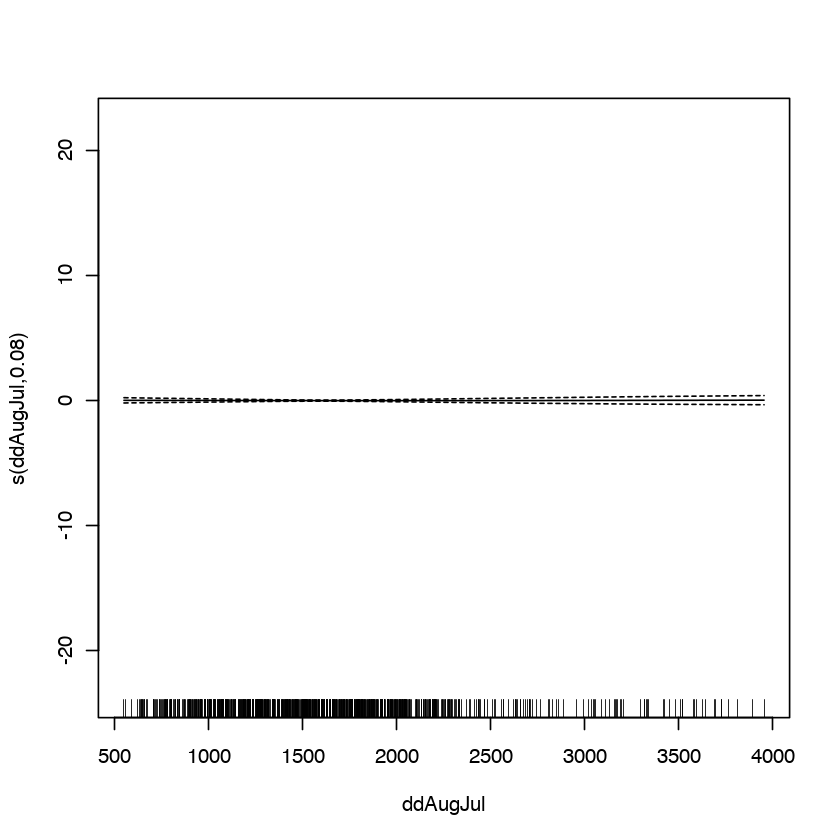

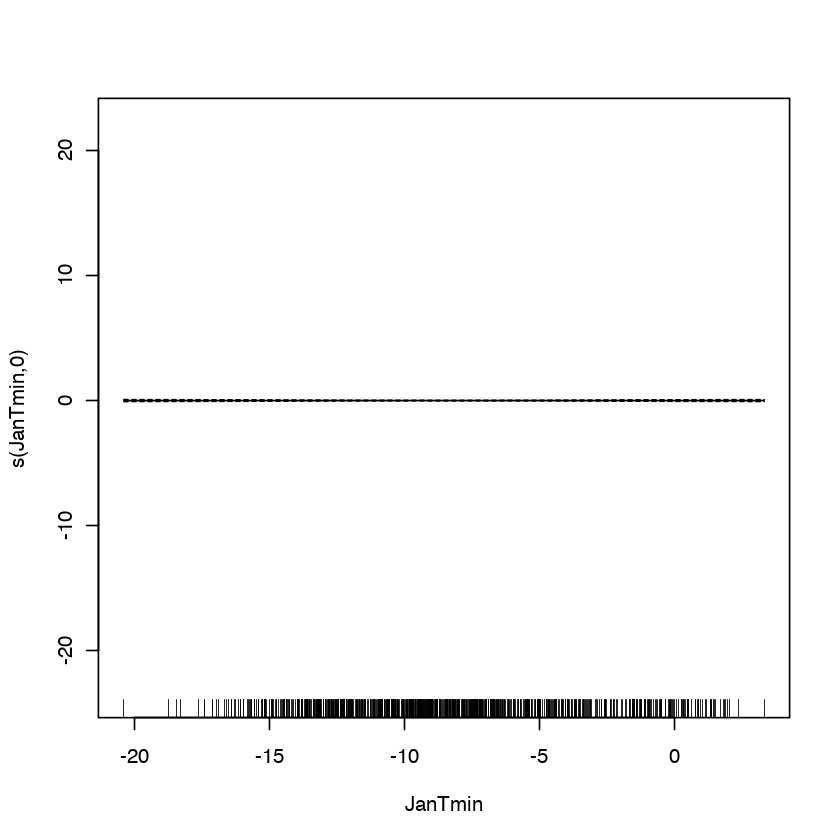

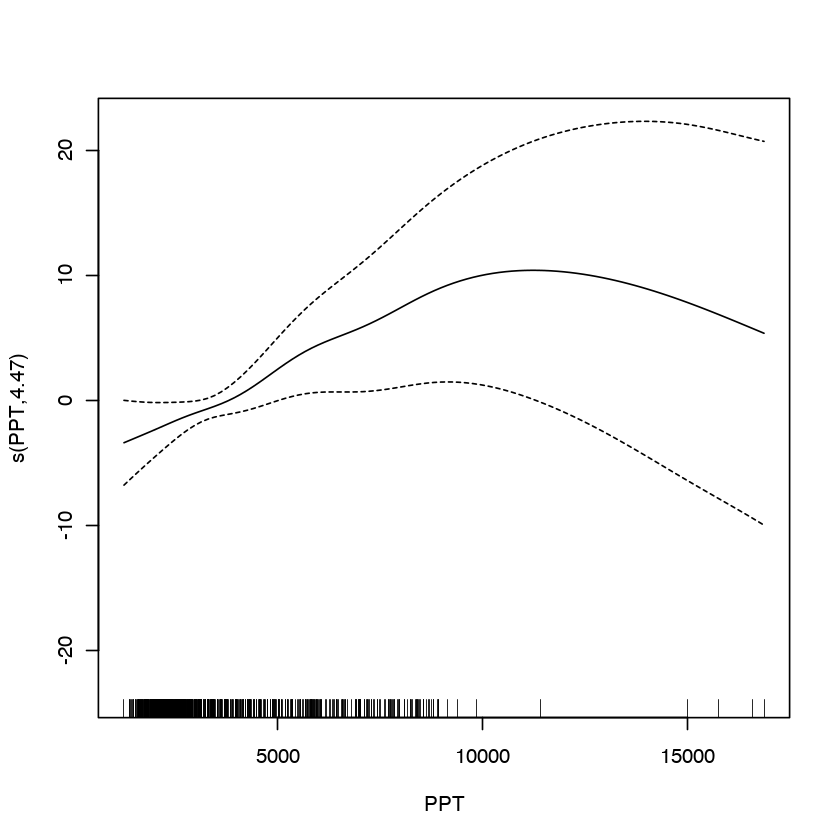

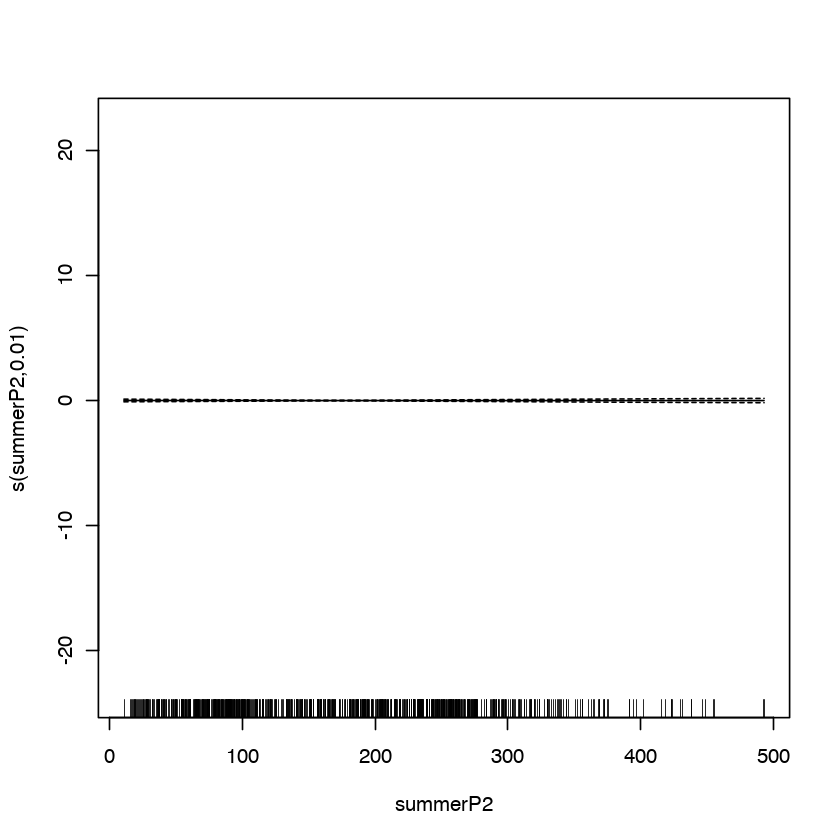

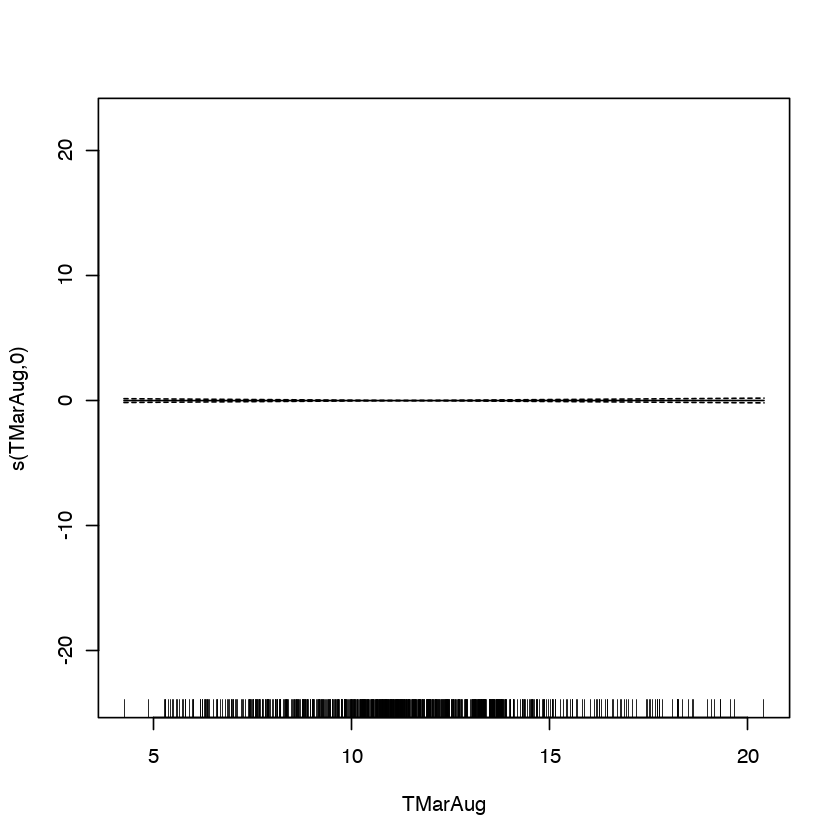

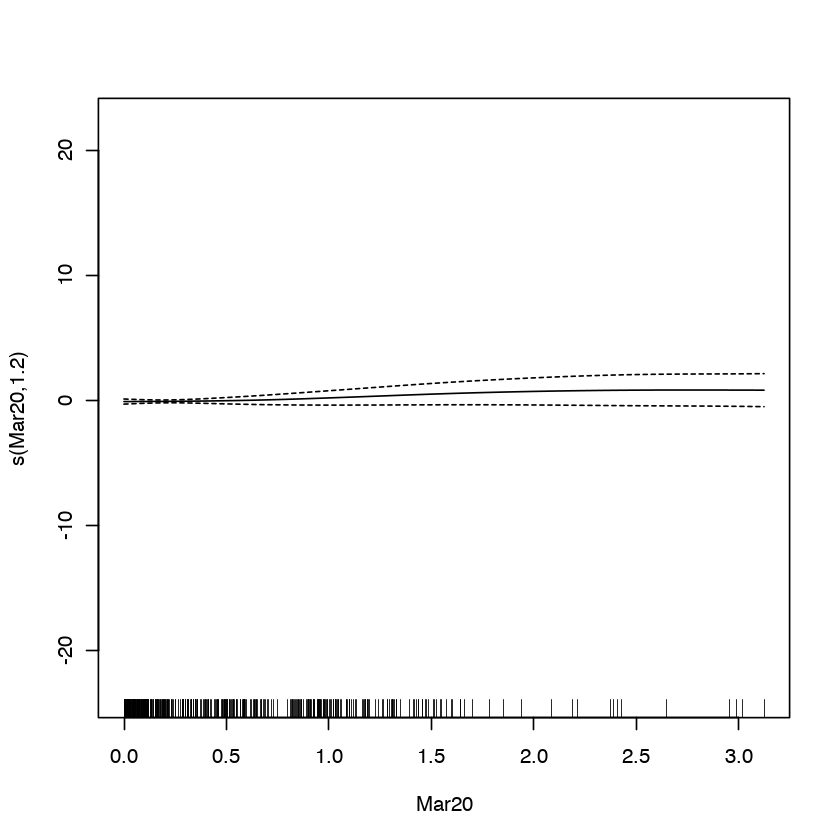

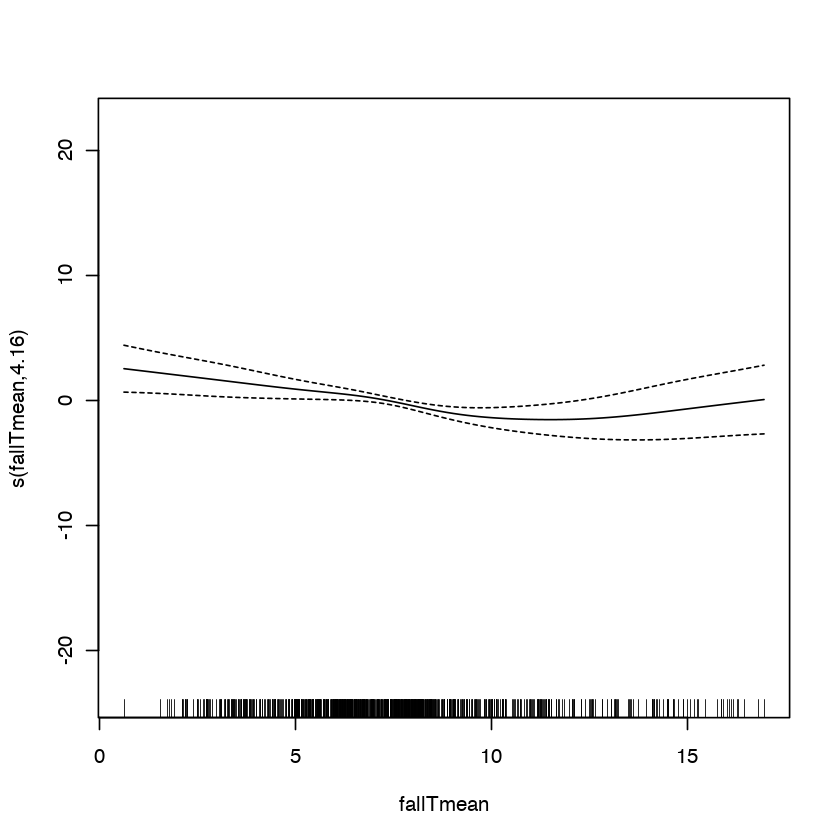

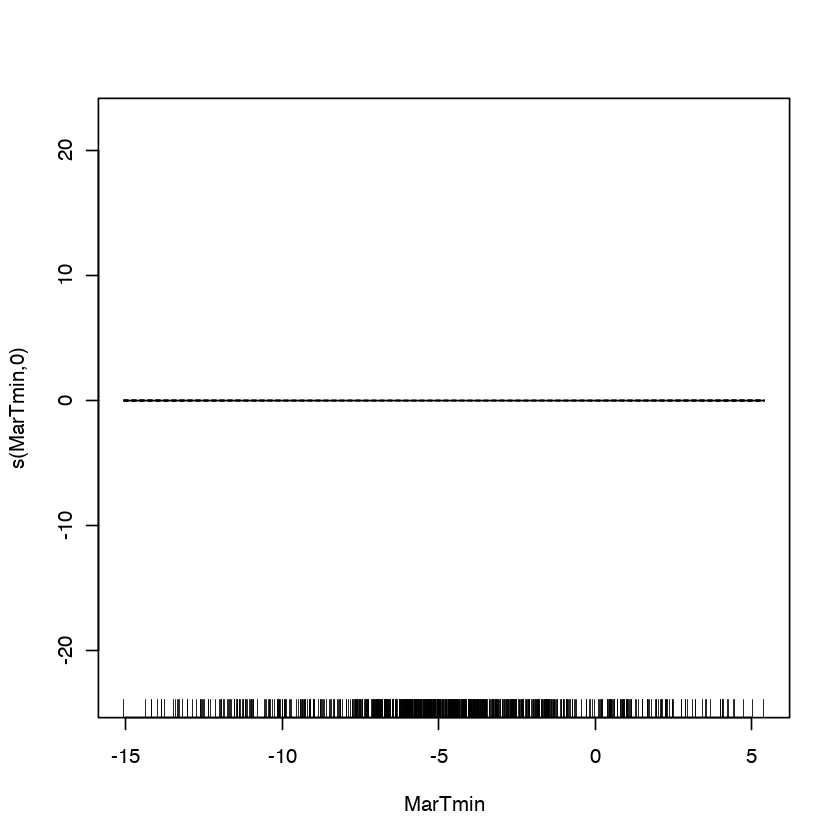

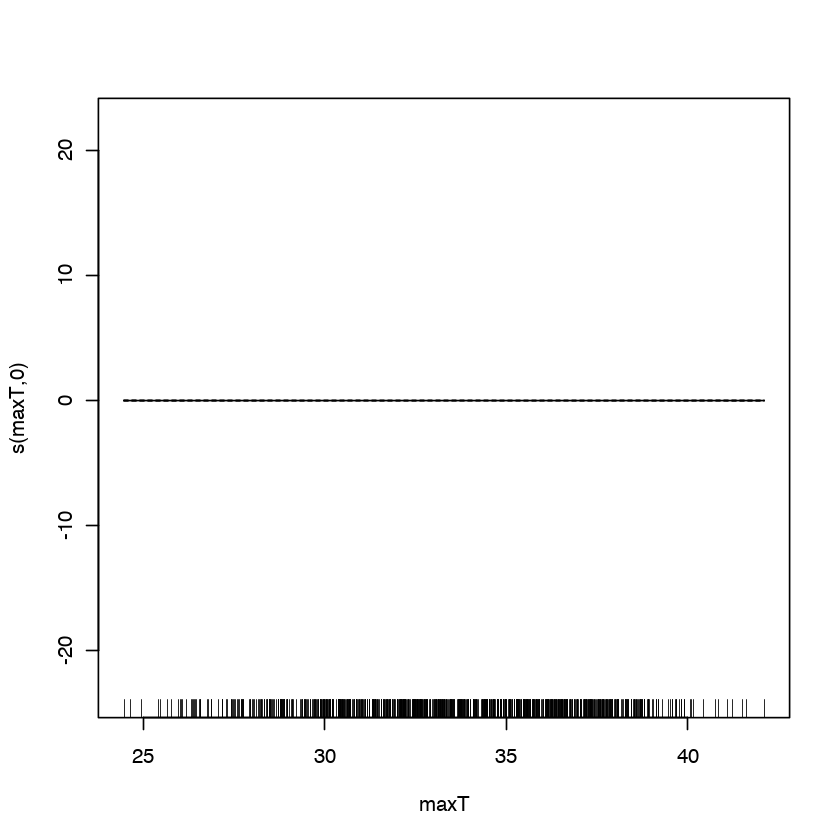

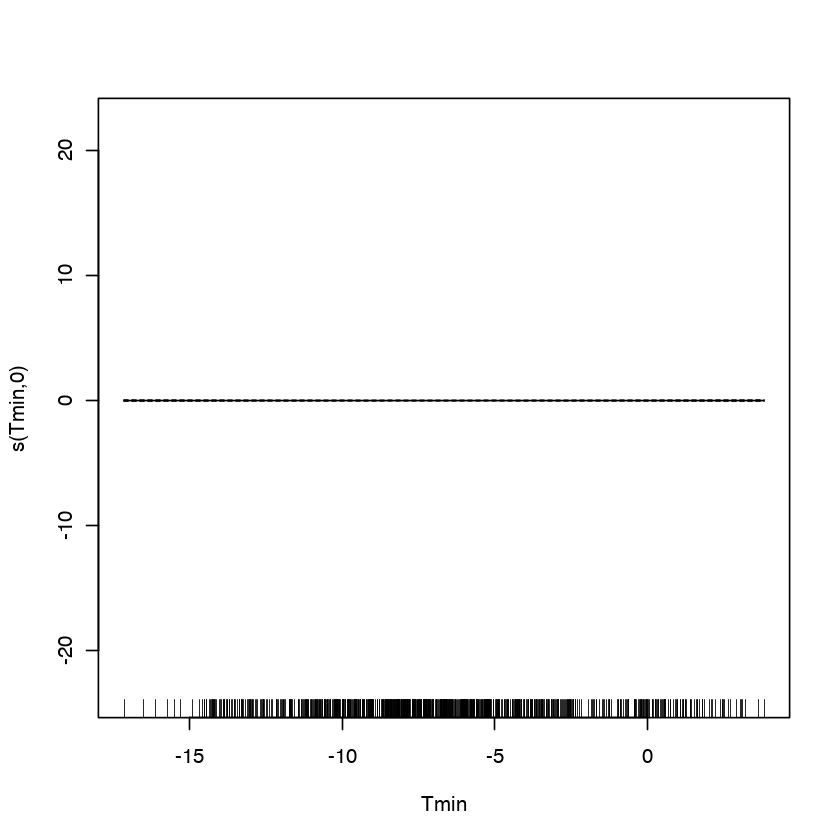

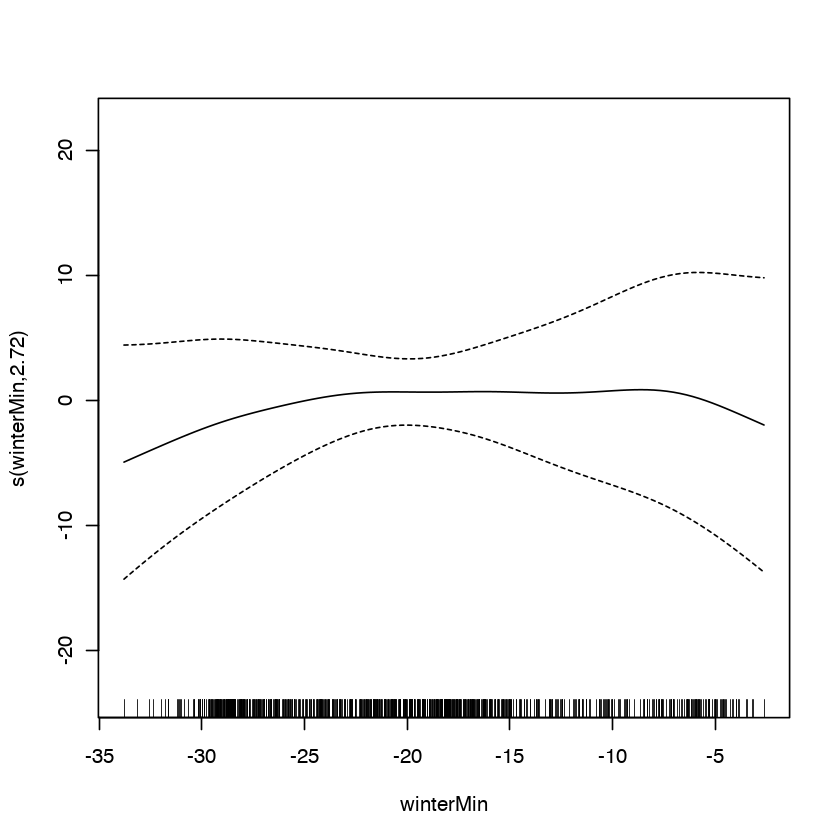

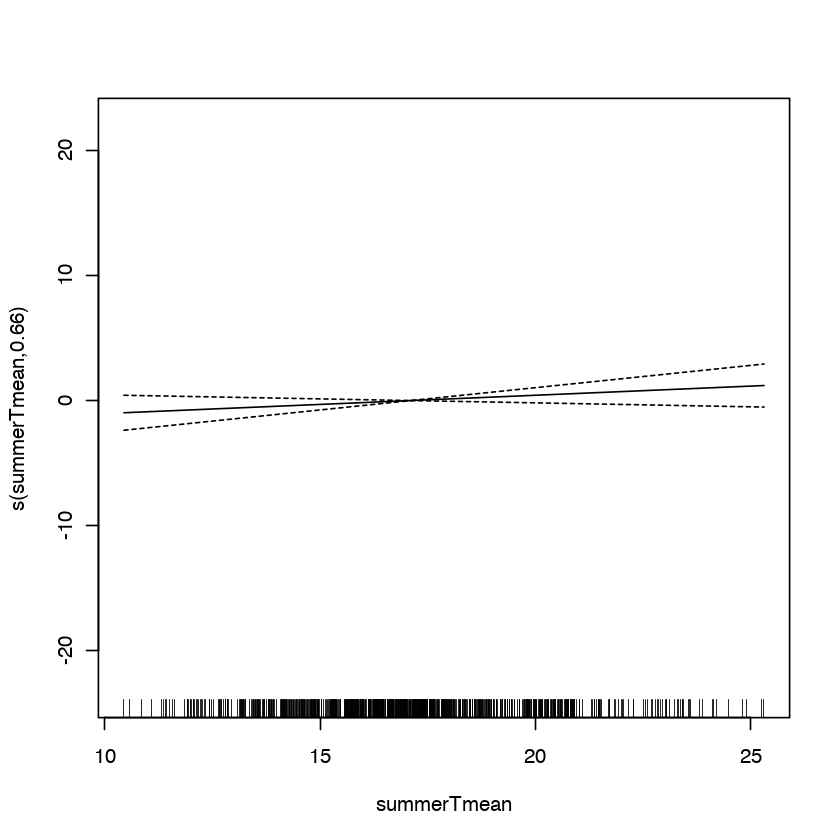

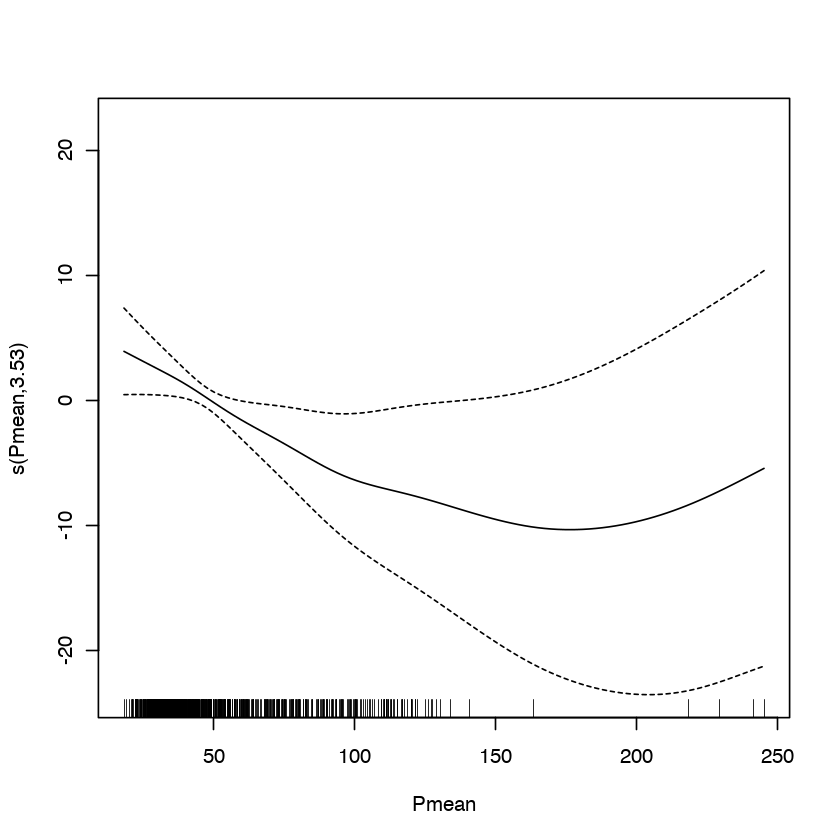

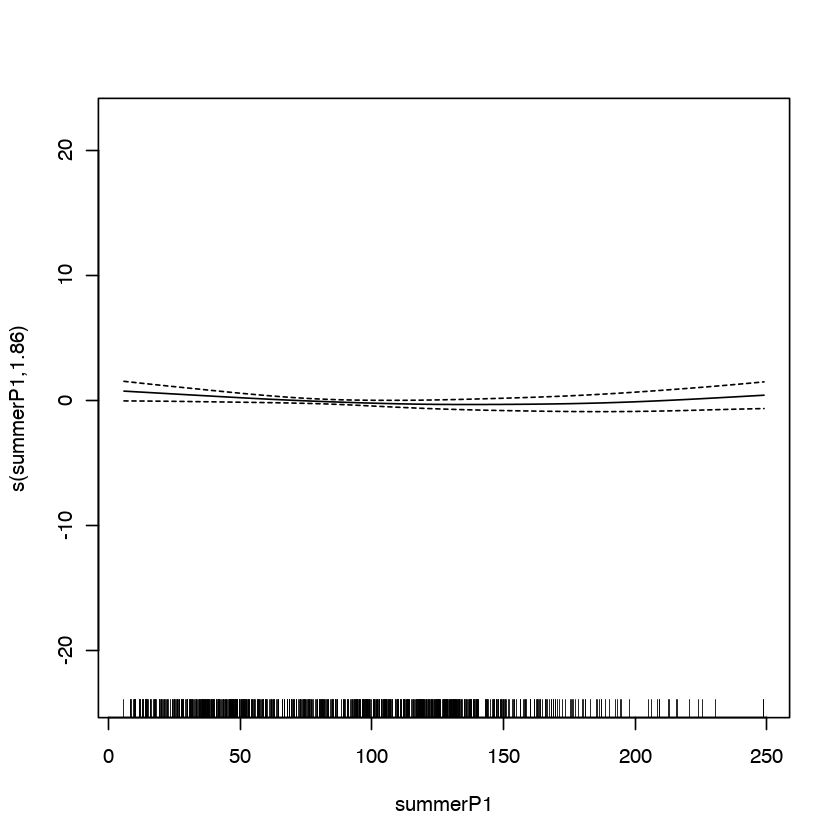

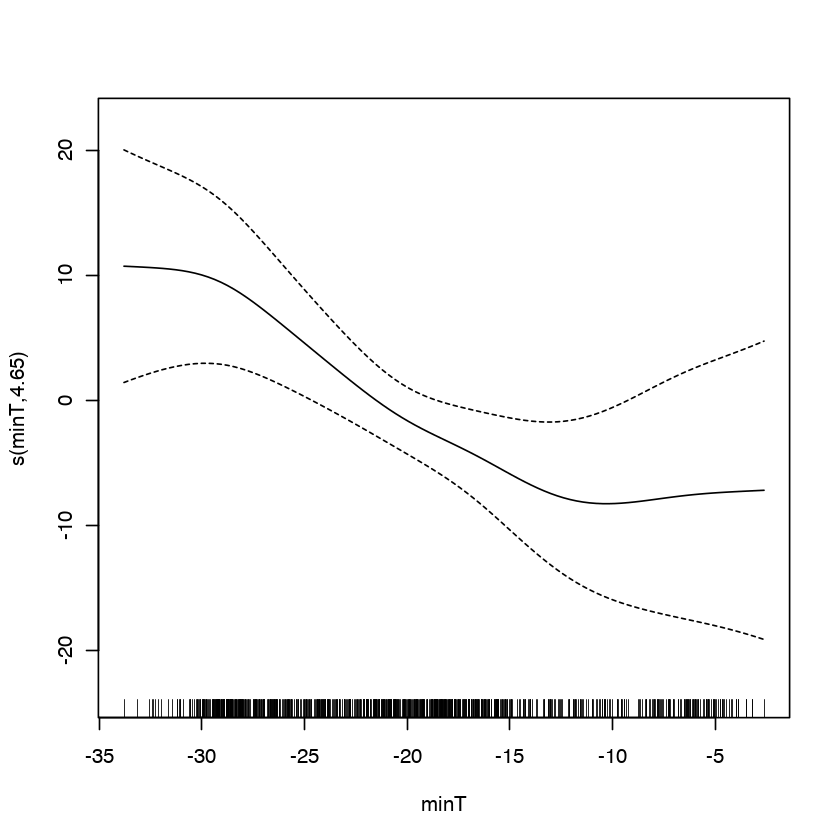

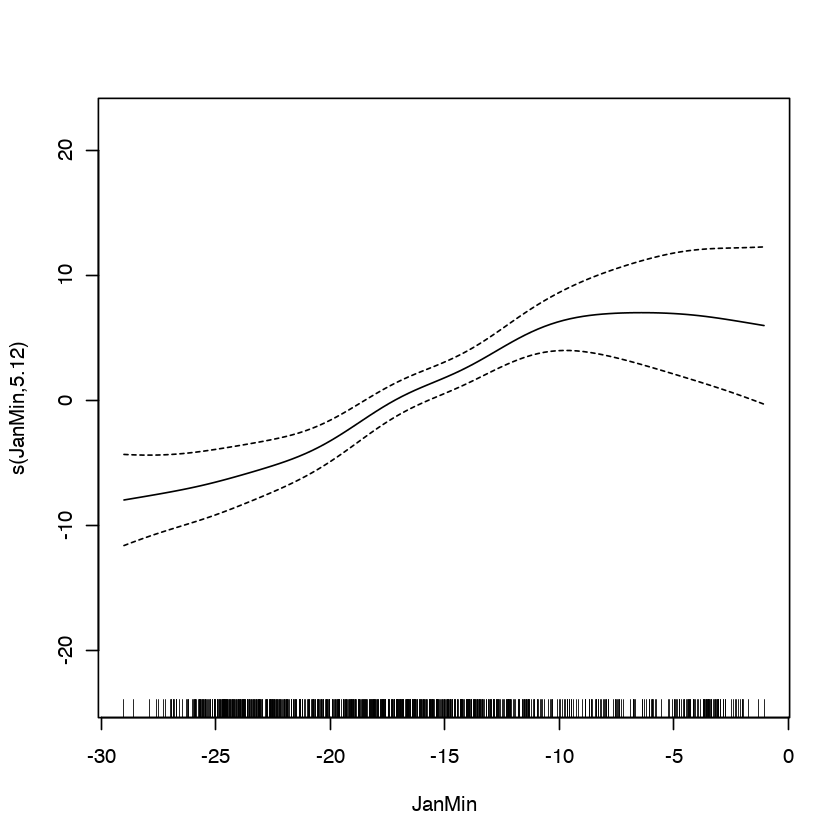

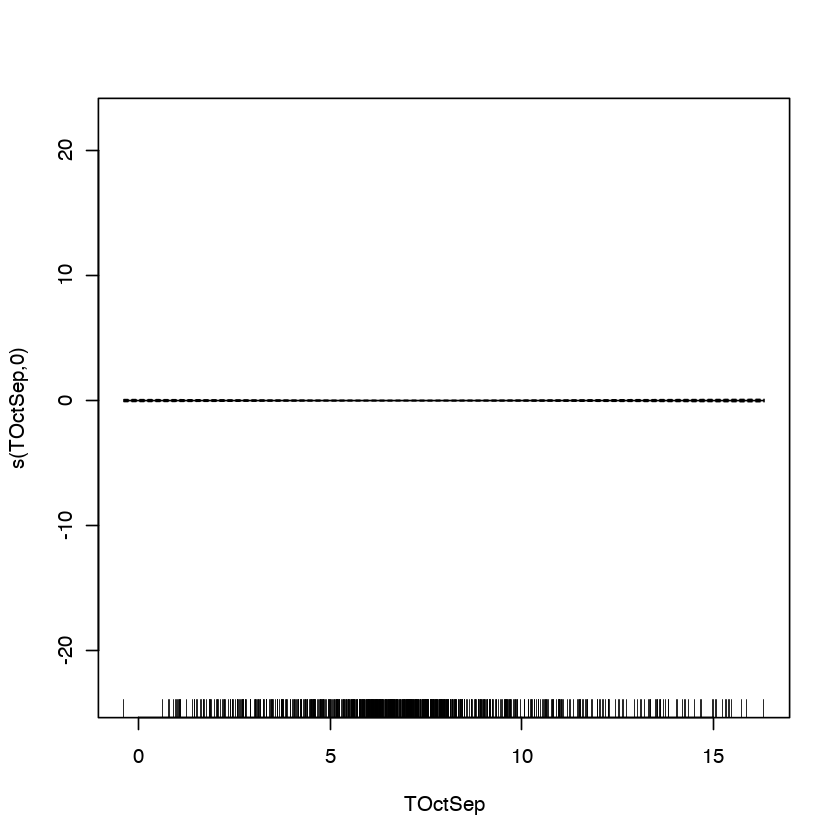

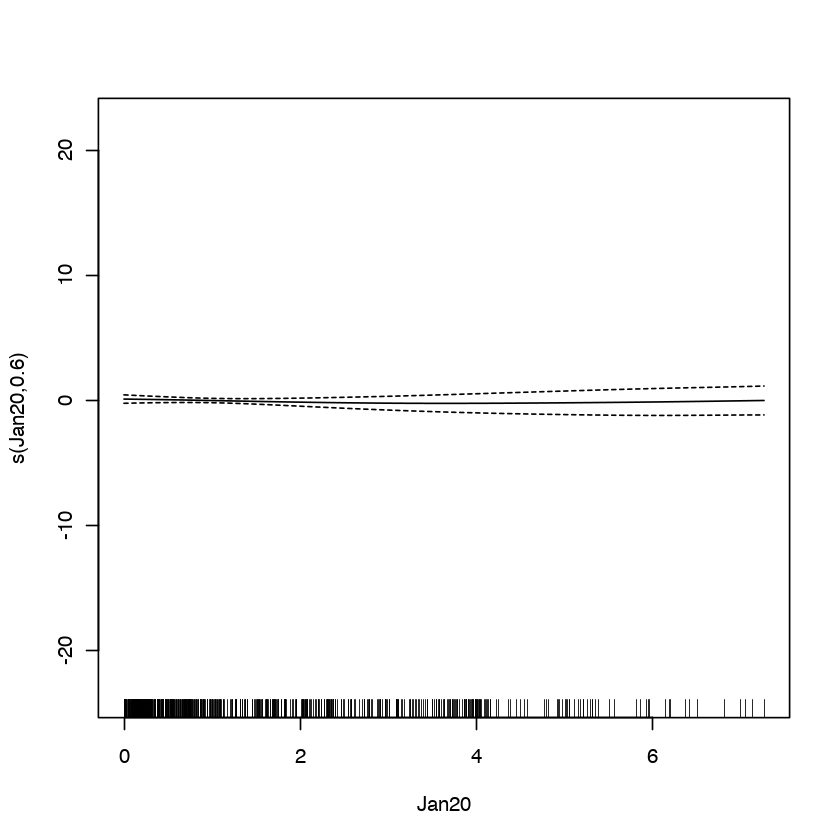

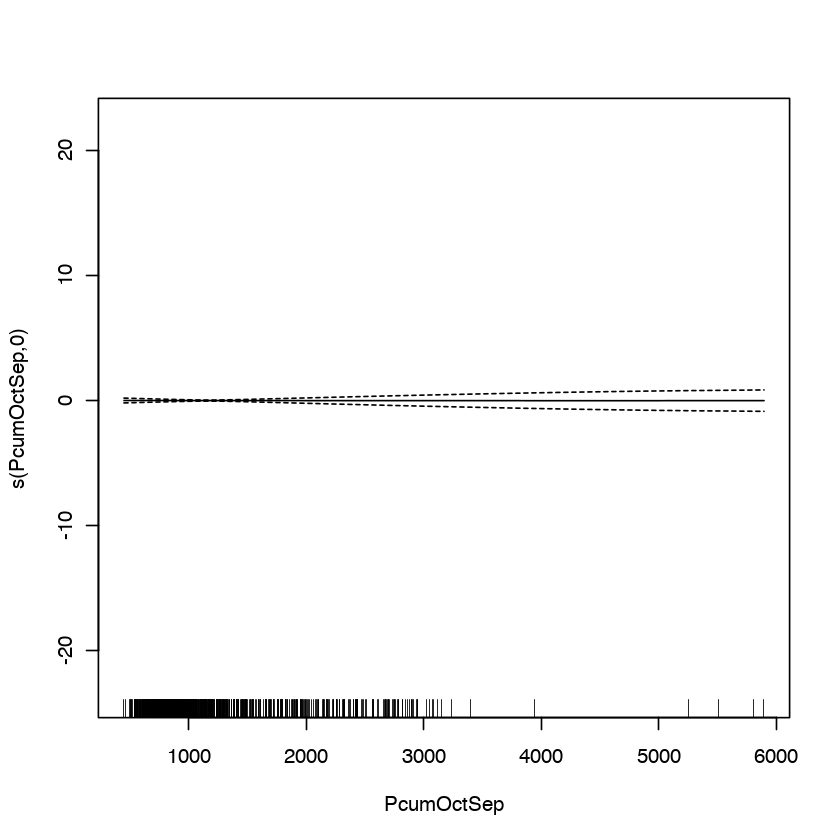

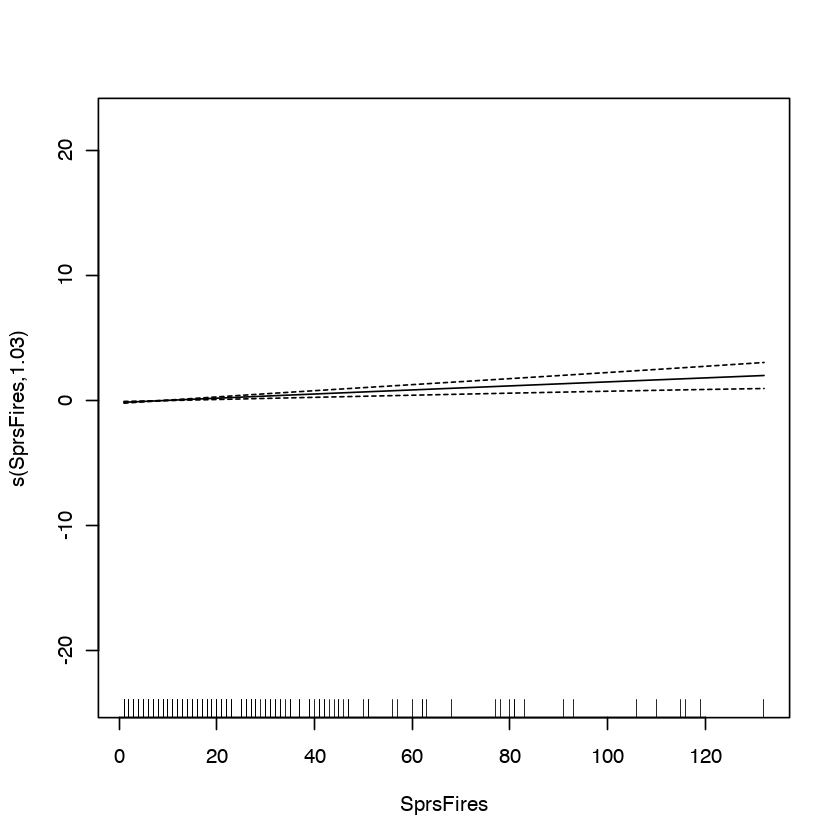

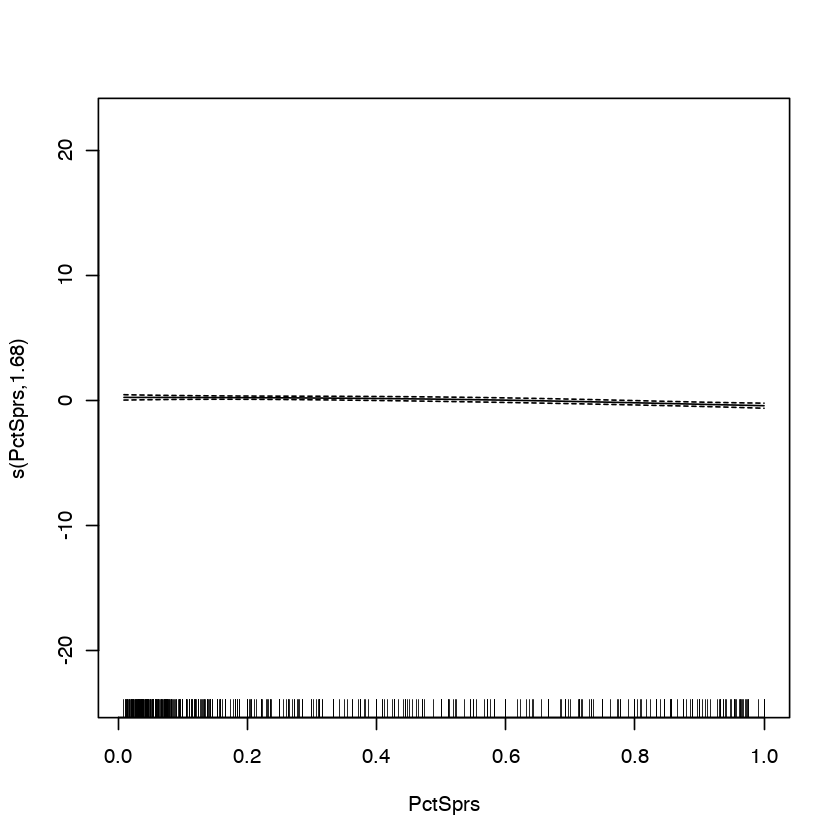

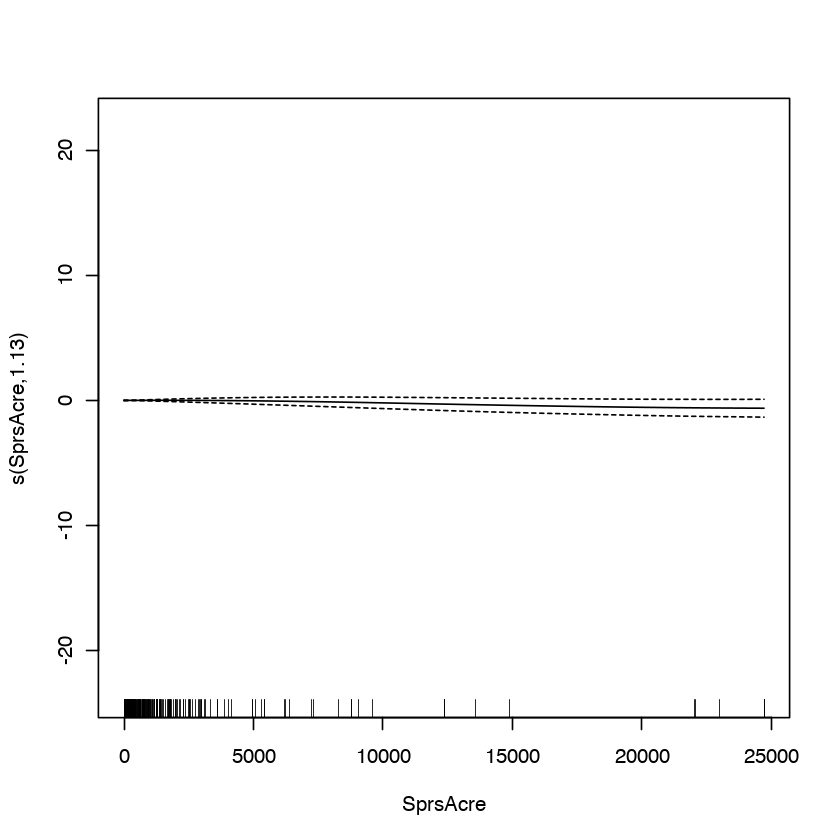

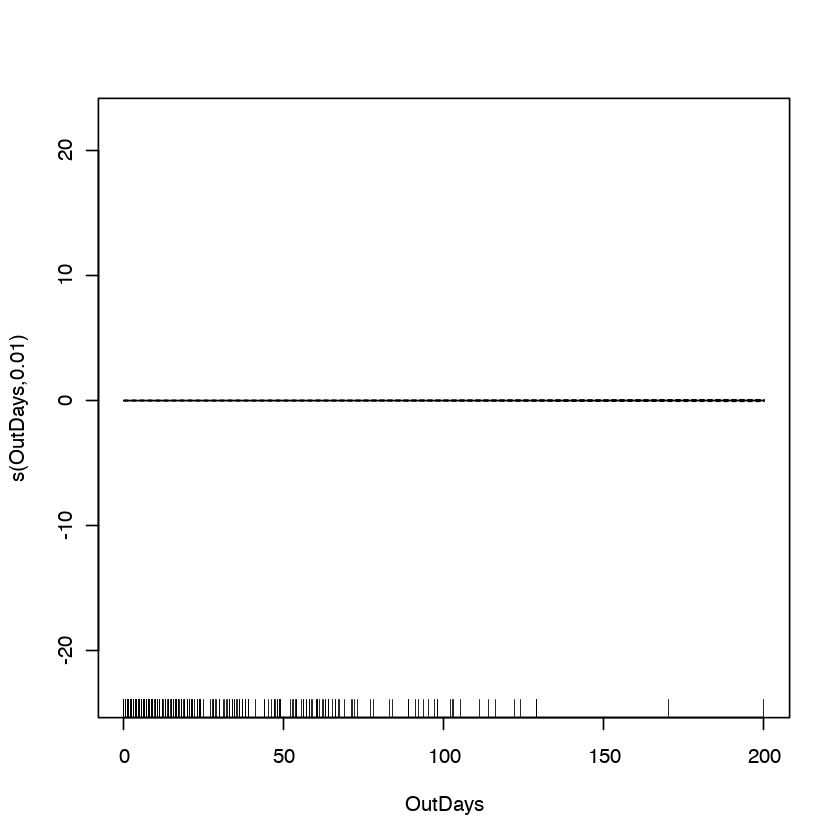

In [24]:
plot(mod2)

In [25]:
concurvity(mod2)

,para,s(lon),s(lat),s(etopo1),s(mStdAge),s(density),s(PctLarge),s(PctOld),s(mfri),s(prs),⋯,s(summerP1),s(minT),s(JanMin),s(TOctSep),s(Jan20),s(PcumOctSep),s(SprsFires),s(PctSprs),s(SprsAcre),s(OutDays)
worst,0.999969,0.9987255,0.9991762,0.9889594,0.9976610,0.8124924,0.7317739,0.6693624,0.9067025,0.9354155,⋯,1.0000000,0.9999852,0.9998375,1.0000000,0.9984425,1.0000000,0.8654175,0.8756776,0.6944635,0.7321543
observed,0.999969,0.9980350,0.9791881,0.9873733,0.6997218,0.7316489,0.6490961,0.6628804,0.8591694,0.9118474,⋯,0.9999999,0.9999653,0.9996319,0.9999999,0.9967094,0.9999990,0.8320082,0.8243952,0.6481895,0.6959352
estimate,0.999969,0.9950594,0.9950023,0.9684337,0.7508315,0.7289985,0.6611718,0.6399195,0.8687685,0.9096483,⋯,0.9999961,0.9999364,0.9991271,0.9999999,0.9904210,0.9999964,0.7938748,0.8167992,0.6435405,0.5882327


In [26]:
concurvity(mod2,full=FALSE)

,para,s(lon),s(lat),s(etopo1),s(mStdAge),s(density),s(PctLarge),s(PctOld),s(mfri),s(prs),⋯,s(summerP1),s(minT),s(JanMin),s(TOctSep),s(Jan20),s(PcumOctSep),s(SprsFires),s(PctSprs),s(SprsAcre),s(OutDays)
para,1.000000e+00,3.443756e-25,2.169159e-24,1.145349e-25,2.804906e-23,4.082524e-24,1.763605e-23,5.420777e-21,5.797052e-19,1.024844e-20,⋯,3.693587e-26,2.967809e-26,7.486333e-26,4.882909e-24,1.154851e-23,6.405907e-25,3.716243e-16,2.943771e-21,1.527741e-24,7.251081e-25
s(lon),3.438510e-25,1.000000e+00,4.138856e-01,4.440723e-01,8.278051e-02,2.578510e-01,2.722350e-01,7.952874e-02,2.599238e-01,2.695822e-01,⋯,7.320839e-01,7.208304e-01,7.585195e-01,4.444954e-01,7.218448e-01,6.868468e-01,8.524403e-02,6.438351e-02,4.067421e-02,1.032327e-01
s(lat),2.162969e-24,4.138856e-01,1.000000e+00,3.205650e-01,6.393749e-02,7.616882e-02,4.239541e-02,5.355775e-02,1.758261e-01,1.398622e-01,⋯,4.363884e-01,3.388774e-01,3.030700e-01,2.616069e-01,2.500652e-01,1.997862e-01,6.882971e-02,1.160395e-01,5.046906e-02,4.014499e-02
s(etopo1),1.138352e-25,4.440723e-01,3.205650e-01,1.000000e+00,7.522810e-02,1.393540e-01,8.272271e-02,1.148070e-01,2.459036e-01,1.946701e-01,⋯,2.293282e-01,4.617303e-01,5.326496e-01,4.520497e-01,2.451140e-01,2.520596e-01,7.120664e-02,1.832196e-01,3.599468e-02,4.426539e-02
s(mStdAge),2.805389e-23,8.278051e-02,6.393749e-02,7.522810e-02,1.000000e+00,5.943699e-02,1.049989e-01,1.974644e-01,1.597763e-01,5.377130e-02,⋯,1.583283e-01,9.039377e-02,9.100341e-02,5.780930e-02,7.357609e-02,6.179993e-01,3.286250e-02,6.392208e-02,3.165692e-02,7.835327e-02
s(density),4.080053e-24,2.578510e-01,7.616882e-02,1.393540e-01,5.943699e-02,1.000000e+00,6.058694e-02,5.567545e-02,1.081152e-01,8.755598e-02,⋯,8.092980e-02,1.562084e-01,1.618902e-01,1.515377e-01,9.434238e-02,3.089395e-01,1.247680e-01,8.853824e-02,6.162249e-02,4.678982e-02
s(PctLarge),1.762252e-23,2.722350e-01,4.239541e-02,8.272271e-02,1.049989e-01,6.058694e-02,1.000000e+00,1.025321e-01,4.655975e-02,6.704608e-02,⋯,1.750323e-01,2.121243e-01,2.109203e-01,7.535845e-02,2.024496e-01,1.128952e-01,3.327386e-02,4.350100e-02,3.137213e-02,2.808559e-02
s(PctOld),5.420674e-21,7.952874e-02,5.355775e-02,1.148070e-01,1.974644e-01,5.567545e-02,1.025321e-01,1.000000e+00,7.108884e-02,4.472362e-02,⋯,5.780904e-02,7.623775e-02,7.637784e-02,9.196330e-02,4.532579e-02,5.628646e-02,2.518484e-02,7.256715e-02,2.548411e-02,4.581871e-02
s(mfri),5.797034e-19,2.599238e-01,1.758261e-01,2.459036e-01,1.597763e-01,1.081152e-01,4.655975e-02,7.108884e-02,1.000000e+00,5.771403e-01,⋯,2.332311e-01,2.577177e-01,2.550299e-01,3.223894e-01,2.214306e-01,2.780240e-01,3.464163e-02,9.368688e-02,3.443825e-02,5.039368e-02
s(prs),1.024863e-20,2.695822e-01,1.398622e-01,1.946701e-01,5.377130e-02,8.755598e-02,6.704608e-02,4.472362e-02,5.771403e-01,1.000000e+00,⋯,1.749905e-01,2.447440e-01,2.374695e-01,2.323495e-01,2.263541e-01,1.705346e-01,5.262445e-02,9.010238e-02,4.761277e-02,4.029209e-02


In [ ]:
# use the variables with obvious curviness
